In [1]:
import torch


def maxtp(temp, p, n):
    """
    Description

    [mint,mintp]=mintp(temp,p) returns
    the minimum value of the vertical temperature anomaly and the depth where it is located.

    Input Arguments

    temp - A n-dimensional tensor of temp data (e.g.,temperature anomalies)
    to calculate its vertical minimum and corresponding depth.

    p - Depth range of temperature

    n - Dimension of the temp data, n>=2 and n<=4.
    if n=2, temp(lon/lat/t,p);if n=3, temp(lon,lat,p) or temp(lon/lat,t,p)
    if n=4, temp(lon,lat,t,p)

    Output Arguments

    mint - A (n-1)D tensor containing vertical minimums.

    mintp - A (n-1)D tensor containing corresponding depth.
    """
    # Check the shape of p tensor
    if len(p.size()) == 2 and p.size(1) > p.size(0):
        p = p.transpose(0, 1)

    # Calculate the minimum value along the specified dimension
    m, i = torch.max(temp, dim=n - 1)

    # Remove the specified dimension from the resulting tensors
    if len(m.size()) > 1:
        mt = m.squeeze(dim=n - 2)
    else:
        mt = m

    if len(i.size()) > 1:
        i = i.squeeze(dim=n - 2)

    if len(p.size()) > 1:
        mp = p.gather(dim=n - 1, index=i.unsqueeze(dim=n - 1))
        mp = mp.squeeze(dim=n - 2)
    else:
        mp = p[i]

    return mt, mp

In [2]:
def mintp(temp, p, n):
    """
    Description

    [mint,mintp]=mintp(temp,p) returns
    the minimum value of the vertical temperature anomaly and the depth where it is located.

    Input Arguments

    temp - A n-dimensional tensor of temp data (e.g.,temperature anomalies)
    to calculate its vertical minimum and corresponding depth.

    p - Depth range of temperature

    n - Dimension of the temp data, n>=2 and n<=4.
    if n=2, temp(lon/lat/t,p);if n=3, temp(lon,lat,p) or temp(lon/lat,t,p)
    if n=4, temp(lon,lat,t,p)

    Output Arguments

    mint - A (n-1)D tensor containing vertical minimums.

    mintp - A (n-1)D tensor containing corresponding depth.
    """
    # Check the shape of p tensor
    if len(p.size()) == 2 and p.size(1) > p.size(0):
        p = p.transpose(0, 1)

    # Calculate the minimum value along the specified dimension
    m, i = torch.min(temp, dim=n - 1)

    # Remove the specified dimension from the resulting tensors
    if len(m.size()) > 1:
        mt = m.squeeze(dim=n - 2)
    else:
        mt = m

    if len(i.size()) > 1:
        i = i.squeeze(dim=n - 2)

    if len(p.size()) > 1:
        mp = p.gather(dim=n - 1, index=i.unsqueeze(dim=n - 1))
        mp = mp.squeeze(dim=n - 2)
    else:
        mp = p[i]

    return mt, mp

In [3]:
import numpy as np

In [4]:
data1 = np.load('./south_93_22_point_MHW_last.npz')
data1.files

['n_events']

In [5]:
MHW_events = data1['n_events'][:]
MHW_events.shape

(41, 41)

In [6]:
MHW_events1 = np.where(MHW_events==0, np.nan, MHW_events)

In [7]:
data2 = np.load('./temp_diff_clim_93_20_last.npz')
data2.files

['lat', 'lon', 'depth', 'temp_clim_anom']

In [8]:
temp_clim_anom = data2['temp_clim_anom'][:]
temp_clim_anom.shape

(10227, 55, 41, 41)

In [9]:
data3 = np.load('./south_93_22_data_start_end.npz', allow_pickle=True)
data3.files

['date_start', 'date_end']

In [10]:
date_start_raw = data3['date_start'][:]
date_end_raw = data3['date_end'][:]

In [11]:
import datetime
for i in range(41):
    for z in range(41):
        print(i)
        date_start1 = date_start_raw[i,z]  # date_start
        date_end1 = date_end_raw[i,z]  # date_start
  
        
        def date_to_index(date):
            start_date = datetime.date(1993, 1, 1)
            delta = date - start_date
            index = delta.days 
            return index

        selected_data = []
        for start, end in zip(date_start1, date_end1):
            start_index = date_to_index(start)
            end_index = date_to_index(end)
            
            selected_data.append(temp_clim_anom[start_index:end_index+1, :, i, z])
        print(np.array(selected_data).shape)

0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(111,)
0
(110,)
0
(114,)
0
(129,)
0
(0,)
0
(0,)
0
(145,)
0
(141,)
0
(128,)
0
(127,)
0
(120,)
0
(111,)
0
(102,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(110,)
1
(131,)
1
(134,)
1
(127,)
1
(0,)
1
(0,)
1
(148,)
1
(115,)
1
(134,)
1
(116,)
1
(110,)
1
(102,)
1
(96,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(92,)
2
(118,)
2
(124,)
2
(125,)
2
(0,)
2
(0,)
2
(0,)
2
(146,)
2
(134,)
2
(117,)
2
(114,)
2
(118,)
2
(112,)
2
(108,)
3
(0,)
3
(0,)
3
(0,)
3
(0,)
3
(0,)
3
(0,)
3
(0,)
3
(0,)
3
(0,)
3
(0,)
3
(0,

C:\Users\mymylove\AppData\Local\Temp/ipykernel_21980/728721103.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(selected_data).shape)


16
(129,)
16
(121,)
16
(120,)
16
(121,)
17
(0,)
17
(0,)
17
(0,)
17
(0,)
17
(0,)
17
(0,)
17
(121,)
17
(125,)
17
(133,)
17
(128,)
17
(126,)
17
(114,)
17
(121,)
17
(129,)
17
(129,)
17
(119,)
17
(111,)
17
(115,)
17
(107,)
17
(99,)
17
(96,)
17
(110,)
17
(110,)
17
(109,)
17
(114,)
17
(123,)
17
(125,)
17
(114,)
17
(113,)
17
(114,)
17
(119,)
17
(0,)
17
(0,)
17
(0,)
17
(0,)
17
(133,)
17
(130,)
17
(120,)
17
(119,)
17
(126,)
17
(135,)
18
(0,)
18
(0,)
18
(0,)
18
(0,)
18
(0,)
18
(0,)
18
(0,)
18
(0,)
18
(124,)
18
(125,)
18
(123,)
18
(115,)
18
(113,)
18
(115,)
18
(114,)
18
(115,)
18
(118,)
18
(111,)
18
(108,)
18
(107,)
18
(106,)
18
(108,)
18
(116,)
18
(105,)
18
(125,)
18
(122,)
18
(125,)
18
(117,)
18
(112,)
18
(110,)
18
(0,)
18
(0,)
18
(0,)
18
(0,)
18
(117,)
18
(130,)
18
(129,)
18
(125,)
18
(129,)
18
(123,)
18
(121,)
19
(0,)
19
(0,)
19
(0,)
19
(0,)
19
(0,)
19
(0,)
19
(0,)
19
(0,)
19
(126,)
19
(108,)
19
(117,)
19
(111,)
19
(122,)
19
(115,)
19
(113,)
19
(102,)
19
(115,)
19
(107,)
19
(108,)
19
(106,)
19

In [12]:
import datetime

selected_data_combined = []

for i in range(41):
    for z in range(41):
        date_start1 = date_start_raw[i, z]  # date_start
        date_end1 = date_end_raw[i, z]  # date_start

        def date_to_index(date):
            start_date = datetime.date(1993, 1, 1) 
            delta = date - start_date
            index = delta.days  
            return index

        selected_data = []
        for start, end in zip(date_start1, date_end1):
            start_index = date_to_index(start)
            end_index = date_to_index(end)

            selected_data.append(temp_clim_anom[start_index:end_index+1, :, i, z])
        
        selected_data_combined.append(selected_data)

selected_data_combined_array = np.array(selected_data_combined)

print(selected_data_combined_array.shape)

(1681,)


C:\Users\mymylove\AppData\Local\Temp/ipykernel_21980/331271159.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  selected_data_combined_array = np.array(selected_data_combined)


In [13]:
import datetime
import numpy as np

selected_data_combined = []

for i in range(41):
    temp_data_combined = []  
    for z in range(41):
        date_start1 = date_start_raw[i, z]  # date_start
        date_end1 = date_end_raw[i, z]  # date_start

        def date_to_index(date):
            start_date = datetime.date(1993, 1, 1) 
            delta = date - start_date
            index = delta.days  
            return index

        selected_data = []
        for start, end in zip(date_start1, date_end1):
            start_index = date_to_index(start)
            end_index = date_to_index(end)
        
            selected_data.append(temp_clim_anom[start_index:end_index+1, :, i, z])
        
        temp_data_combined.append(selected_data)

    selected_data_combined.append(temp_data_combined)

selected_data_combined_array = np.array(selected_data_combined)

print(selected_data_combined_array.shape)

(41, 41)


C:\Users\mymylove\AppData\Local\Temp/ipykernel_21980/2367465796.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  selected_data_combined_array = np.array(selected_data_combined)


In [14]:
last_MHW_data = selected_data_combined_array

In [15]:
last_MHW_data.shape

(41, 41)

In [16]:
data_depth = np.load('./temp_diff_clim_93_20_last.npz')
depth = data_depth['depth'][:]
depth.shape

(55, 1)

In [17]:
def cum_ta(ta, p):
    a, b = ta.shape
    if a == 1 and b > a:
        ta = ta.T

    n = len(p)
    dp = np.empty(n)
    dp[0] = p[0] - 0
    dp[1:] = p[1:] - p[:-1]

    cta = np.empty(n)
    if not np.isnan(cta[0]):
        cta[0] = ta[0] * dp[0]
        for ip in range(1, n):
            if not np.isnan(ta[ip]):
                cta[ip] = ta[ip] * dp[ip] + cta[ip-1]
            else:
                cta[ip] = cta[0]  # Set cta[ip] to cta[0] if ta[ip] is nan
    else:
        cta.fill(np.nan)  # Set all elements of cta to nan if cta[0] is nan
    return cta  

In [18]:
last_MHW_data.shape

(41, 41)

In [19]:
results = [] 

for i in range(41):
    row_results = []
    for j in range(41):
        size = np.prod(np.array(last_MHW_data[i][j]).shape)
        temp_results  = []
        for t in range(size):
            ta = np.nanmean(last_MHW_data[i][j][t], axis=0).reshape(-1, 1)
            p = depth.reshape(-1,)
            cta = cum_ta(ta, p)

#             diff_cta = cta / p

            max_index = np.argmax(cta)
#             max_p = p[max_index]
#             print('type:{}'.format(type(cta[max_index])))
#             print('shape:{}'.format(cta[max_index].shape))
#             print('shape:{}'.format(max_p))
            if any(cta[:25] < 0):
                if ta[0] < np.max(ta):
                    temp_results.append((0.95 * cta[max_index], 5))
                    print("MHW{}types : intensified_Reversed".format(i+1))
                else:
                    print("MHW{} types : Reversed".format(i+1))
                    temp_results.append((0.95 * cta[max_index], 2))
            else:
                if ta[0] < np.max(ta):
                    print("MHW{} types : intensified".format(i+1))
                    temp_results.append((0.95 * cta[max_index], 3))
                else:
                    if cta[max_index] * 0.95 > 100:
                        print("MHW{}types : deep".format(i+1))
                        temp_results.append((0.95 * cta[max_index], 4))
                        
                    else:
                        print("MHW{}types : shallow".format(i+1))
                        print("MHW{}".format(0.95 * cta[max_index]))
                        temp_results.append((0.95 * cta[max_index], 1))
        row_results.append(temp_results)
    results.append(row_results) 

print(results)

C:\Users\mymylove\AppData\Local\Temp/ipykernel_21980/1804537505.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  size = np.prod(np.array(last_MHW_data[i][j]).shape)
C:\Users\mymylove\AppData\Local\Temp/ipykernel_21980/1804537505.py:9: RuntimeWarning: Mean of empty slice
  ta = np.nanmean(last_MHW_data[i][j][t], axis=0).reshape(-1, 1)


MHW1类型为shallow
MHW2.7634315341539075
MHW1类型为shallow
MHW12.410503253033985
MHW1类型为shallow
MHW10.401416387599165
MHW1类型为shallow
MHW13.317305654960673
MHW1类型为shallow
MHW9.035147897701753
MHW1类型为shallow
MHW1.8318477598938652
MHW1类型为shallow
MHW21.363441090966454
MHW1类型为Reversed
MHW1类型为shallow
MHW23.069747039226026
MHW1类型为shallow
MHW5.059120583425115
MHW1类型为Reversed
MHW1类型为shallow
MHW8.07835146483614
MHW1类型为shallow
MHW10.310371877778922
MHW1类型为shallow
MHW5.3041417423700095
MHW1类型为shallow
MHW4.078150450440135
MHW1类型为Reversed
MHW1类型为Reversed
MHW1类型为shallow
MHW15.685703440299873
MHW1类型为Reversed
MHW1类型为shallow
MHW11.310495287861126
MHW1类型为shallow
MHW9.536131964146376
MHW1类型为shallow
MHW18.332025327777345
MHW1类型为shallow
MHW9.512055006042205
MHW1类型为shallow
MHW9.63081673393769
MHW1类型为Reversed
MHW1类型为Reversed
MHW1类型为shallow
MHW0.3457069520657585
MHW1类型为shallow
MHW6.428439674830469
MHW1类型为shallow
MHW7.14408094728746
MHW1类型为shallow
MHW20.697477576816635
MHW1类型为shallow
MHW8.266810219765445
MHW1类型为Revers

MHW1类型为deep
MHW1类型为deep
MHW1类型为deep
MHW1类型为deep
MHW1类型为deep
MHW1类型为deep
MHW1类型为Reversed
MHW1类型为Reversed
MHW1类型为Reversed
MHW1类型为deep
MHW1类型为deep
MHW1类型为deep
MHW1类型为deep
MHW1类型为deep
MHW1类型为shallow
MHW67.26612780437965
MHW1类型为Reversed
MHW1类型为Reversed
MHW1类型为shallow
MHW70.58010215725692
MHW1类型为Reversed
MHW1类型为deep
MHW1类型为deep
MHW1类型为deep
MHW1类型为deep
MHW1类型为Reversed
MHW1类型为deep
MHW1类型为deep
MHW1类型为deep
MHW1类型为shallow
MHW94.82207728438468
MHW1类型为Reversed
MHW1类型为Reversed
MHW1类型为Reversed
MHW1类型为deep
MHW1类型为deep
MHW1类型为deep
MHW1类型为deep
MHW1类型为deep
MHW1类型为Reversed
MHW1类型为Reversed
MHW1类型为deep
MHW1类型为deep
MHW1类型为Reversed
MHW1类型为Reversed
MHW1类型为Reversed
MHW1类型为Reversed
MHW1类型为deep
MHW1类型为deep
MHW1类型为shallow
MHW70.15574429041268
MHW1类型为Reversed
MHW1类型为Reversed
MHW1类型为Reversed
MHW1类型为deep
MHW1类型为Reversed
MHW1类型为deep
MHW1类型为deep
MHW1类型为deep
MHW1类型为deep
MHW1类型为deep
MHW1类型为Reversed
MHW1类型为shallow
MHW98.22220114098947
MHW1类型为Reversed
MHW1类型为Reversed
MHW1类型为deep
MHW1类型为deep
MHW1类型为Reversed
MHW1类型为Reversed


MHW1类型为intensified
MHW1类型为intensified
MHW1类型为intensified
MHW1类型为shallow
MHW48.078958910609416
MHW1类型为intensified_Reversed
MHW1类型为deep
MHW1类型为Reversed
MHW1类型为intensified_Reversed
MHW1类型为Reversed
MHW1类型为intensified
MHW1类型为deep
MHW1类型为intensified_Reversed
MHW1类型为Reversed
MHW1类型为intensified_Reversed
MHW1类型为intensified_Reversed
MHW1类型为intensified_Reversed
MHW1类型为intensified_Reversed
MHW1类型为intensified
MHW1类型为deep
MHW1类型为intensified
MHW1类型为Reversed
MHW1类型为Reversed
MHW1类型为Reversed
MHW1类型为intensified
MHW1类型为intensified_Reversed
MHW1类型为intensified_Reversed
MHW1类型为Reversed
MHW1类型为intensified_Reversed
MHW1类型为Reversed
MHW1类型为intensified
MHW1类型为Reversed
MHW1类型为Reversed
MHW1类型为intensified
MHW1类型为deep
MHW1类型为deep
MHW1类型为intensified
MHW1类型为intensified
MHW1类型为Reversed
MHW1类型为intensified
MHW1类型为intensified
MHW1类型为intensified
MHW1类型为Reversed
MHW1类型为deep
MHW1类型为intensified
MHW1类型为Reversed
MHW1类型为Reversed
MHW1类型为Reversed
MHW1类型为intensified
MHW1类型为intensified
MHW1类型为intensified
MHW1类型为intensified_Reversed
M

MHW2类型为deep
MHW2类型为shallow
MHW2.865369490442887
MHW2类型为Reversed
MHW2类型为shallow
MHW30.727267836995164
MHW2类型为shallow
MHW97.78021420674877
MHW2类型为shallow
MHW39.0199636356903
MHW2类型为shallow
MHW19.859278896945906
MHW2类型为shallow
MHW35.333441001059754
MHW2类型为shallow
MHW53.78887204700444
MHW2类型为shallow
MHW90.41152037252468
MHW2类型为shallow
MHW92.10423334429977
MHW2类型为shallow
MHW48.25797768427795
MHW2类型为shallow
MHW25.22765657841499
MHW2类型为shallow
MHW7.270429947193506
MHW2类型为shallow
MHW30.078724478416564
MHW2类型为shallow
MHW54.89690437419701
MHW2类型为shallow
MHW33.06727893975388
MHW2类型为shallow
MHW98.89863728961132
MHW2类型为deep
MHW2类型为deep
MHW2类型为deep
MHW2类型为shallow
MHW63.1193221527331
MHW2类型为shallow
MHW72.39590632061541
MHW2类型为shallow
MHW8.564404537797284
MHW2类型为shallow
MHW71.33639178291854
MHW2类型为deep
MHW2类型为shallow
MHW7.2506904349664145
MHW2类型为shallow
MHW25.120794311551585
MHW2类型为shallow
MHW23.835699069654854
MHW2类型为shallow
MHW60.77380417602975
MHW2类型为deep
MHW2类型为shallow
MHW79.7629772270766
MHW2类型为s

MHW2类型为Reversed
MHW2类型为shallow
MHW66.99544689459353
MHW2类型为deep
MHW2类型为shallow
MHWnan
MHW2类型为shallow
MHWnan
MHW2类型为shallow
MHWnan
MHW2类型为shallow
MHWnan
MHW2类型为shallow
MHWnan
MHW2类型为shallow
MHWnan
MHW2类型为shallow
MHWnan
MHW2类型为shallow
MHWnan
MHW2类型为shallow
MHWnan
MHW2类型为shallow
MHWnan
MHW2类型为Reversed
MHW2类型为Reversed
MHW2类型为Reversed
MHW2类型为deep
MHW2类型为Reversed
MHW2类型为Reversed
MHW2类型为Reversed
MHW2类型为Reversed
MHW2类型为Reversed
MHW2类型为deep
MHW2类型为Reversed
MHW2类型为Reversed
MHW2类型为Reversed
MHW2类型为Reversed
MHW2类型为shallow
MHW28.049916129818207
MHW2类型为Reversed
MHW2类型为deep
MHW2类型为deep
MHW2类型为shallow
MHW82.66115382481095
MHW2类型为Reversed
MHW2类型为Reversed
MHW2类型为Reversed
MHW2类型为deep
MHW2类型为Reversed
MHW2类型为Reversed
MHW2类型为Reversed
MHW2类型为Reversed
MHW2类型为Reversed
MHW2类型为deep
MHW2类型为Reversed
MHW2类型为shallow
MHW97.86989286126745
MHW2类型为deep
MHW2类型为shallow
MHW23.26790575968306
MHW2类型为Reversed
MHW2类型为shallow
MHW97.65226771721814
MHW2类型为Reversed
MHW2类型为shallow
MHW57.102246476900746
MHW2类型为Reversed
MHW2类型为Reverse

MHW3类型为intensified
MHW3类型为intensified
MHW3类型为intensified
MHW3类型为intensified_Reversed
MHW3类型为intensified
MHW3类型为intensified_Reversed
MHW3类型为intensified
MHW3类型为intensified
MHW3类型为intensified
MHW3类型为intensified
MHW3类型为intensified_Reversed
MHW3类型为intensified_Reversed
MHW3类型为intensified_Reversed
MHW3类型为intensified_Reversed
MHW3类型为intensified_Reversed
MHW3类型为Reversed
MHW3类型为intensified
MHW3类型为deep
MHW3类型为intensified_Reversed
MHW3类型为intensified_Reversed
MHW3类型为intensified_Reversed
MHW3类型为intensified
MHW3类型为intensified
MHW3类型为intensified_Reversed
MHW3类型为intensified
MHW3类型为intensified
MHW3类型为intensified
MHW3类型为intensified_Reversed
MHW3类型为intensified
MHW3类型为intensified_Reversed
MHW3类型为intensified
MHW3类型为intensified
MHW3类型为intensified_Reversed
MHW3类型为intensified_Reversed
MHW3类型为intensified
MHW3类型为intensified
MHW3类型为intensified_Reversed
MHW3类型为intensified
MHW3类型为intensified_Reversed
MHW3类型为intensified_Reversed
MHW3类型为intensified_Reversed
MHW3类型为intensified_Reversed
MHW3类型为intensified
MHW3类型为intens

MHW3类型为intensified_Reversed
MHW3类型为intensified
MHW3类型为deep
MHW3类型为intensified
MHW3类型为Reversed
MHW3类型为Reversed
MHW3类型为intensified_Reversed
MHW3类型为intensified
MHW3类型为intensified_Reversed
MHW3类型为intensified_Reversed
MHW3类型为intensified_Reversed
MHW3类型为intensified_Reversed
MHW3类型为deep
MHW3类型为intensified
MHW3类型为intensified_Reversed
MHW3类型为intensified
MHW3类型为intensified_Reversed
MHW3类型为Reversed
MHW3类型为Reversed
MHW3类型为intensified
MHW3类型为Reversed
MHW3类型为intensified
MHW3类型为intensified_Reversed
MHW3类型为intensified
MHW3类型为intensified_Reversed
MHW3类型为intensified
MHW3类型为intensified_Reversed
MHW3类型为Reversed
MHW3类型为intensified_Reversed
MHW3类型为intensified_Reversed
MHW3类型为intensified_Reversed
MHW3类型为Reversed
MHW3类型为intensified
MHW3类型为Reversed
MHW3类型为intensified
MHW3类型为Reversed
MHW3类型为intensified
MHW3类型为intensified
MHW3类型为deep
MHW3类型为intensified
MHW3类型为intensified
MHW3类型为intensified_Reversed
MHW3类型为intensified_Reversed
MHW3类型为intensified_Reversed
MHW3类型为intensified_Reversed
MHW3类型为Reversed
MHW3类型为deep
MHW

MHW4类型为deep
MHW4类型为shallow
MHW86.96614989136012
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为shallow
MHW57.61766192169412
MHW4类型为deep
MHW4类型为shallow
MHW46.50166322691489
MHW4类型为shallow
MHW73.36934411672823
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为shallow
MHW36.44401598215403
MHW4类型为Reversed
MHW4类型为deep
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为shallow
MHW91.80236726648332
MHW4类型为Reversed
MHW4类型为deep
MHW4类型为deep
MHW4类型为deep
MHW4类型为Reversed
MHW4类型为deep
MHW4类型为shallow
MHW54.36533398408429
MHW4类型为deep
MHW4类型为shallow
MHW57.5839349368603
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为shallow
MHW11.466608238886622
MHW4类型为shallow
MHW53.298500971516354
MHW4类型为shallow
MHW69.95960451630198
MHW4类型为deep
MHW4类型为shallow
MHW77.14872311994071
MHW4类型为shallow
MHW72.21175349044766
MHW4类型为shallow
MHW62.90832349034273
MHW4类型为deep
MHW4类型为shallow
MHW78.05734835567289
MHW4类型为shallow
MHW39.68882087641972
MHW4类型为Reversed
MHW4类型为shallow


MHW4类型为deep
MHW4类型为intensified_Reversed
MHW4类型为intensified_Reversed
MHW4类型为deep
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为intensified_Reversed
MHW4类型为intensified_Reversed
MHW4类型为intensified_Reversed
MHW4类型为intensified_Reversed
MHW4类型为Reversed
MHW4类型为intensified_Reversed
MHW4类型为Reversed
MHW4类型为intensified_Reversed
MHW4类型为intensified
MHW4类型为shallow
MHW71.2114448850646
MHW4类型为Reversed
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为shallow
MHW77.06756098266678
MHW4类型为shallow
MHW82.01129832394555
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为shallow
MHW71.77673778831617
MHW4类型为intensified
MHW4类型为Reversed
MHW4类型为shallow
MHW97.41541616414425
MHW4类型为intensified
MHW4类型为shallow
MHW29.108299983414597
MHW4类型为intensified
MHW4类型为Reversed
MHW4类型为intensified_Reversed
MHW4类型为deep
MHW4类型为Reversed
MHW4类型为intensified
MHW4类型为Reversed
MHW4类型为deep
MHW4类型为Reversed
MHW4类型为deep
MHW4类型为Reversed
MHW4类型为intensified
MHW4类型为intensifi

MHW4类型为intensified
MHW4类型为intensified
MHW4类型为deep
MHW4类型为deep
MHW4类型为intensified_Reversed
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为intensified_Reversed
MHW4类型为intensified_Reversed
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为deep
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为intensified_Reversed
MHW4类型为intensified_Reversed
MHW4类型为intensified_Reversed
MHW4类型为deep
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为intensified_Reversed
MHW4类型为Reversed
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为intensified_Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为intensified_Reversed
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为deep
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为shallow
MHWnan
MHW4类型为shallow
MHWnan
MHW4类型为shallow
MHWnan
MHW4类型为shallow
MHWnan
MHW4类型为shallow
MHWnan
MHW4类型为shallow
MHWnan
MHW4类型为shallow

MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为shallow
MHW18.045576343359368
MHW5类型为shallow
MHW37.29392481625855
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为shallow
MHW21.924350991127334
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为shallow
MHW39.06466303514565
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为shallow
MHW15.995029309505322
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为shallow
MHW16.88810400145958
MHW5类型为shallow
MHW15.919157991248854
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为shallow
MHW16.33409270584907
MHW5类型为shallow
MHW22.758494644396396
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为shallow
MHW18.85072499657485
MHW5类型为shallow
MHW45.181891

MHW5类型为Reversed
MHW5类型为shallow
MHW16.353480566866196
MHW5类型为shallow
MHW8.244082487510077
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为shallow
MHW27.22551608574066
MHW5类型为shallow
MHW17.60867163778122
MHW5类型为shallow
MHW8.124680799963786
MHW5类型为shallow
MHW3.9360318848147995
MHW5类型为Reversed
MHW5类型为shallow
MHW23.699682495986384
MHW5类型为shallow
MHW8.066152401227798
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为shallow
MHW22.52058950549482
MHW5类型为shallow
MHW17.35747305177676
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为shallow
MHW15.106201715377459
MHW5类型为shallow
MHW27.113406674879027
MHW5类型为shallow
MHW31.730925170878187
MHW5类型为shallow
MHW23.753410588748558
MHW5类型为shallow
MHW0.9851559460594487
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为shallow
MHW10.831082892473596
MHW5类型为shallow
MHW16.57947947358151
MHW5类型为shallow
MHW27.951979845797315
MHW5类型为shallow
MHW20.806510117811783
MHW5类型为Reversed
M

MHW5类型为intensified
MHW5类型为intensified
MHW5类型为intensified_Reversed
MHW5类型为intensified_Reversed
MHW5类型为intensified
MHW5类型为intensified
MHW5类型为Reversed
MHW5类型为intensified_Reversed
MHW5类型为intensified_Reversed
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为intensified
MHW5类型为intensified
MHW5类型为intensified
MHW5类型为Reversed
MHW5类型为intensified
MHW5类型为deep
MHW5类型为intensified
MHW5类型为Reversed
MHW5类型为shallow
MHW91.76096820883073
MHW5类型为Reversed
MHW5类型为intensified_Reversed
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为intensified
MHW5类型为intensified_Reversed
MHW5类型为Reversed
MHW5类型为intensified
MHW5类型为intensified_Reversed
MHW5类型为deep
MHW5类型为shallow
MHW63.466923147205975
MHW5类型为shallow
MHW66.31960405119847
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为shallow
MHW72.32849057588106
MHW5类型为deep
MHW5类型为deep
MHW5类型为intensified
MHW5类型为intensified
MHW5类型为intensified
MHW5类型为deep
MHW5类型为deep
MHW5类型为deep
MHW5类型为Reversed
MHW5类型为intensified
MHW5类型为shallow
MHW98.99899951536584
MHW5类型为intensified
MHW5类型为intensified_Reversed
MHW5类型为intensif

MHW6类型为shallow
MHW22.55387551340349
MHW6类型为shallow
MHW28.20360170642742
MHW6类型为shallow
MHW49.00736854368969
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为shallow
MHW26.278409065303585
MHW6类型为shallow
MHW17.270916904642533
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为shallow
MHW17.953351926477538
MHW6类型为shallow
MHW7.647461268397922
MHW6类型为shallow
MHW19.012673718749163
MHW6类型为Reversed
MHW6类型为shallow
MHW40.234785790482135
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为shallow
MHW48.07659268717158
MHW6类型为Reversed
MHW6类型为shallow
MHW15.535202297388002
MHW6类型为shallow
MHW9.12269492816542
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为shallow
MHW47.36615918395559
MHW6类型为shallow
MHW30.075437424396227
MHW6类型为Reversed
MHW6类型为shallow
MHW15.77452385487379
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为shallow
MHW55.94243878385286
MHW6类型为shallow
MHW7.553267873468842
MHW6类型为shallow
MHW38.16306044645791
MHW6类型为Reversed
MHW6类型为shallow
MHW14.931453445943278
MHW6类

MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为shallow
MHW75.49513828565856
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为deep
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为shallow
MHW40.89992091156473
MHW6类型为Reversed
MHW6类型为shallow
MHW49.20488325966283
MHW6类型为deep
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为shallow
MHW28.565357345107206
MHW6类型为shallow
MHW62.78025857184856
MHW6类型为shallow
MHW21.41348764130517
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为shallow
MHW45.51652175716708
MHW6类型为shallow
MHW94.34274263465188
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为deep
MHW6类型为Reversed
MHW6类型为shallow
MHW80.05636184825707
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为shallow
MHW37.975488707890754
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为shallow
MHW60.08851545216671
MHW6类型为shallow
MHW59.42319378273035
MHW6类型为shallow
MHW83.17385344003279
MHW6类型为shallow
MHW85.52606964768422
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为sha

MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified_Reversed
MHW6类型为Reversed
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为deep
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为shallow
MHW30.658147789077944
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为deep
MHW6类型为intensified
MHW6类型为intensified_Reversed
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为Reversed
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified_Reversed
MHW6类型为intensified
MHW6类型

MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified_Reversed
MHW6类型为shallow
MHW87.25005231763896
MHW6类型为deep
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为Reversed
MHW6类型为intensified_Reversed
MHW6类型为deep
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为deep
MHW6类型为intensified
MHW6类型为intensified_Reversed
MHW6类型为intensified
MHW6类型为intensified_Reversed
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为Reversed
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为deep
MHW6类型为deep
MHW6类型为intensified
MHW6类型为Reversed
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为Reversed
MHW6类型为intensified_Reversed
MHW6类型为intensified
MHW6类型为Reversed
MHW6类型为intensified
MHW6类型为deep
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为deep
MHW6类型为

MHW97.19326739548241
MHW7类型为deep
MHW7类型为shallow
MHW43.313530906174314
MHW7类型为shallow
MHW33.33192703088182
MHW7类型为shallow
MHW60.64907257794619
MHW7类型为shallow
MHW39.265557137221606
MHW7类型为shallow
MHW48.83182564884563
MHW7类型为shallow
MHW29.831739483927507
MHW7类型为shallow
MHW83.50808690502306
MHW7类型为Reversed
MHW7类型为shallow
MHW38.08485506152203
MHW7类型为Reversed
MHW7类型为shallow
MHW55.19688166619257
MHW7类型为deep
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为shallow
MHW30.948540653460483
MHW7类型为Reversed
MHW7类型为shallow
MHW29.074779822380897
MHW7类型为deep
MHW7类型为shallow
MHW87.17500172833171
MHW7类型为shallow
MHW50.38338716441045
MHW7类型为deep
MHW7类型为shallow
MHW18.01803423473973
MHW7类型为shallow
MHW53.738612484589765
MHW7类型为shallow
MHW89.03365417043128
MHW7类型为Reversed
MHW7类型为shallow
MHW40.56238361399358
MHW7类型为shallow
MHW80.96734025168631
MHW7类型为shallow
MHW88.24637207736264
MHW7类型为shallow
MHW72.64991934942418
MHW7类型为shallow
MHW59.93079303182958
MHW7类型为deep
MHW7类型为shallow
MHW43.90109940988327
MHW7类型为shallow
MHW50.5860

MHW7类型为shallow
MHW51.03554721966254
MHW7类型为shallow
MHW91.28555436051795
MHW7类型为deep
MHW7类型为shallow
MHW99.49993808765784
MHW7类型为deep
MHW7类型为shallow
MHW95.44420048095847
MHW7类型为shallow
MHW77.09158923189456
MHW7类型为shallow
MHW81.05957142909314
MHW7类型为shallow
MHW97.11438510467285
MHW7类型为shallow
MHW75.29353603044068
MHW7类型为Reversed
MHW7类型为shallow
MHW25.292700010108877
MHW7类型为shallow
MHW35.395452299736135
MHW7类型为shallow
MHW51.04684716230905
MHW7类型为shallow
MHW68.23421021646156
MHW7类型为shallow
MHW64.95771076778875
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为shallow
MHW33.02123327854982
MHW7类型为shallow
MHW78.11630079391429
MHW7类型为shallow
MHW71.28808862158613
MHW7类型为shallow
MHW79.74941935731466
MHW7类型为shallow
MHW78.60589298637821
MHW7类型为shallow
MHW90.38669930176123
MHW7类型为shallow
MHW60.86085845119161
MHW7类型为deep
MHW7类型为shallow
MHW36.21519307673239
MHW7类型为Reversed
MHW7类型为shallow
MHW43.96747066593504
MHW7类型为shallow
MHW96.77917697855716
MHW7类型为shallow
MHW78.0598251866355
MHW7类型为shallow
MHWnan
MHW7类型为shallo

MHW7类型为intensified
MHW7类型为intensified_Reversed
MHW7类型为intensified_Reversed
MHW7类型为shallow
MHW38.42811412859249
MHW7类型为intensified_Reversed
MHW7类型为intensified_Reversed
MHW7类型为intensified
MHW7类型为intensified_Reversed
MHW7类型为intensified_Reversed
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified_Reversed
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified_Reversed
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为shallow
MHW72.09410651934067
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified_Reversed
MHW7类型为shallow
MHW86.95122100513689
MHW7类型为deep
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified_Reversed
MHW7类型为intensified_Reversed
MHW7类型为shallow
MHW44.406098587591686
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为shallow
MHW66.92823570966686
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified
MHW7类

MHW7类型为intensified_Reversed
MHW7类型为intensified_Reversed
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为intensified_Reversed
MHW7类型为intensified_Reversed
MHW7类型为intensified
MHW7类型为deep
MHW7类型为intensified_Reversed
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified_Reversed
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified_Reversed
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为intensified_Reversed
MHW7类型为Reversed
MHW7类型为intensified
MHW7类型为Reversed
MHW7类型为deep
MHW7类型为intensified
MHW7类型为shallow
MHW50.1540101966852
MHW7类型为intensified
MHW7类型为intensified_Reversed
MHW7类型为deep
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified_Reversed
MHW7类型为shallow
MHW56.223910123598614
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为intensified_Reversed
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为intensified_Reversed
MHW7类型为intensified
MHW7类型为Reversed
MHW7类型为intensified_Reversed
MHW7类型为intensified_Reversed


MHW7类型为intensified_Reversed
MHW7类型为Reversed
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为deep
MHW7类型为intensified_Reversed
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为deep
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified_Reversed
MHW7类型为intensified_Reversed
MHW7类型为intensified
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified_Reversed
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为shallow
MHW88.138521721165
MHW7类型为intensified
MHW7类型为intensified_Reversed
MHW7类型为intensified
MHW7类型为deep
MHW7类型为intensified
MHW7类型为shallow
MHW80.90103734605029
MHW7类型为Reversed
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为deep
MHW7类型为deep
MHW7类型为intensified_Reversed
MHW7类型为deep
MHW7类型为deep
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为deep
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为deep
MHW7类型为Reversed
MHW7类型为intensified
MHW7类型为Reversed
MHW7类型为deep
MHW7类

MHW7类型为Reversed
MHW7类型为intensified_Reversed
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified_Reversed
MHW7类型为intensified
MHW7类型为Reversed
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified_Reversed
MHW7类型为intensified_Reversed
MHW7类型为intensified_Reversed
MHW7类型为intensified
MHW7类型为shallow
MHW51.73212366375181
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为Reversed
MHW7类型为intensified_Reversed
MHW7类型为intensified
MHW7类型为Reversed
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified_Reversed
MHW7类型为Reversed
MHW7类型为shallow
MHW52.95894820301189
MHW7类型为Reversed
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为intensified
MHW7类型为intensified_Reversed
MHW7类型为Reversed
MHW7类型为intensified
MHW7类型为intensified_Reversed
MHW7类型

MHW8类型为Reversed
MHW8类型为shallow
MHW73.89369880621986
MHW8类型为shallow
MHW43.581123612541944
MHW8类型为Reversed
MHW8类型为shallow
MHW42.638718687745936
MHW8类型为shallow
MHW32.306614258403826
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为shallow
MHW54.10981627547598
MHW8类型为shallow
MHW58.877652926285265
MHW8类型为shallow
MHW43.514134479886806
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为shallow
MHW23.920563692003473
MHW8类型为shallow
MHW60.20415293483226
MHW8类型为shallow
MHW23.089590759892992
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为shallow
MHW32.20917771339445
MHW8类型为shallow
MHW76.2710718006853
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为shallow
MHW77.03219923128677
MHW8类型为shallow
MHW81.09387196649425
MHW8类型为shallow
MHW15.866862468982852
MHW8类型为shallow
MHW18.108989102300384
MHW8类型为shallow
MHW19.50957311033

MHW8类型为shallow
MHW99.11288654601452
MHW8类型为shallow
MHW71.13677459283738
MHW8类型为deep
MHW8类型为deep
MHW8类型为deep
MHW8类型为deep
MHW8类型为Reversed
MHW8类型为shallow
MHW34.463471576745
MHW8类型为deep
MHW8类型为deep
MHW8类型为deep
MHW8类型为shallow
MHW65.52733527748217
MHW8类型为shallow
MHW52.07885835654076
MHW8类型为shallow
MHW77.61368284097033
MHW8类型为shallow
MHW72.43101911753256
MHW8类型为deep
MHW8类型为shallow
MHW75.68542665710837
MHW8类型为Reversed
MHW8类型为shallow
MHW98.4373366197747
MHW8类型为shallow
MHW72.33490261152728
MHW8类型为shallow
MHW41.495741396141135
MHW8类型为deep
MHW8类型为Reversed
MHW8类型为shallow
MHW50.53679679063391
MHW8类型为deep
MHW8类型为Reversed
MHW8类型为deep
MHW8类型为deep
MHW8类型为shallow
MHW83.86618122940146
MHW8类型为Reversed
MHW8类型为deep
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为shallow
MHW25.31674043791989
MHW8类型为shallow
MHW80.85070113893617
MHW8类型为deep
MHW8类型为Reversed
MHW8类型为shallow
MHW20.581939529410757
MHW8类型为shallow
MHW61.17719195776664
MHW8类型为shallow
MHW56.27148608170768
MHW8类型为shallow
MHW55.97813186453295
MHW8类

MHW8类型为deep
MHW8类型为deep
MHW8类型为Reversed
MHW8类型为deep
MHW8类型为shallow
MHW90.93624776071606
MHW8类型为deep
MHW8类型为Reversed
MHW8类型为deep
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为shallow
MHW83.61246243221588
MHW8类型为shallow
MHW65.28780399985932
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为deep
MHW8类型为deep
MHW8类型为shallow
MHW69.51552831960787
MHW8类型为deep
MHW8类型为shallow
MHW87.90524366109483
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为shallow
MHW75.46394189551206
MHW8类型为Reversed
MHW8类型为deep
MHW8类型为Reversed
MHW8类型为deep
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为deep
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为deep
MHW8类型为deep
MHW8类型为deep
MHW8类型为deep
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为shallow
MHW84.61837764877751
MHW8类型为Reversed
MHW8类型为deep
MHW8类型为deep
MHW8类型为deep
MHW8类型为deep
MHW8类型为shallow
MHW50.133680169309585
MHW8类型为shallow
MHW80.54201198035592
MHW8类型为deep
MHW8类型为shallow
MHW7

MHW8类型为intensified
MHW8类型为intensified_Reversed
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified_Reversed
MHW8类型为intensified
MHW8类型为intensified_Reversed
MHW8类型为Reversed
MHW8类型为intensified
MHW8类型为intensified_Reversed
MHW8类型为intensified
MHW8类型为intensified_Reversed
MHW8类型为intensified_Reversed
MHW8类型为intensified_Reversed
MHW8类型为intensified_Reversed
MHW8类型为intensified
MHW8类型为intensified_Reversed
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified_Reversed
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified_Reversed
MHW8类型为intensified
MHW8类型为intensified_Reversed
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified_Reversed
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified_Reversed
MHW8类型为intensified_Reversed
MHW8类型为intensified_Reversed
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified
MHW8

MHW8类型为intensified_Reversed
MHW8类型为Reversed
MHW8类型为intensified
MHW8类型为deep
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified_Reversed
MHW8类型为intensified_Reversed
MHW8类型为intensified_Reversed
MHW8类型为intensified
MHW8类型为intensified_Reversed
MHW8类型为intensified
MHW8类型为intensified_Reversed
MHW8类型为shallow
MHW33.077398756395596
MHW8类型为intensified
MHW8类型为deep
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为intensified_Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为deep
MHW8类型为intensified_Reversed
MHW8类型为intensified_Reversed
MHW8类型为intensified_Reversed
MHW8类型为intensified_Reversed
MHW8类型为Reversed
MHW8类型为intensified_Reversed
MHW8类型为intensified_Reversed
MHW8类型为intensified_Reversed
MHW8类型为intensified_Reversed
MHW8类型为intensified_Reversed
MHW8类型为deep
MHW8类型为intensified_Reversed
MHW8类型为intensified_Reversed
MHW8类型为intensified_Reversed
MHW8类型为intensified_Reversed
MHW8类型为intensified_Reversed
MHW8类型为Reversed
MHW8类型为intensified
MHW8类型为in

MHW8类型为Reversed
MHW8类型为intensified_Reversed
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为shallow
MHW88.18961543531422
MHW8类型为intensified
MHW8类型为Reversed
MHW8类型为intensified
MHW8类型为shallow
MHW51.66698616942165
MHW8类型为intensified_Reversed
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified_Reversed
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified_Reversed
MHW8类型为intensified
MHW8类型为intensified_Reversed
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified_Reversed
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为Reversed
MHW8类型为intensified_Reversed
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为deep
MHW8类型为intensified_Reversed
MHW8类型为deep
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为Reversed
MHW8类型为deep
MHW8类型为intensified
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为intensified
MHW8类型为Reversed
MHW8类型为intensified_Reversed
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为deep
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为in

MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHW9.520747478569183
MHW9类型为shallow
MHW5.819680316225502
MHW9类型为shallow
MHW5.502142782627305
MHW9类型为Reversed
MHW9类型为shallow
MHW9.884992722036207
MHW9类型为Reversed
MHW9类型为shallow
MHW14.914561063383854
MHW9类型为shallow
MHW14.153779116718013
MHW9类型为shallow
MHW11.218437697454549
MHW9类型为shallow
MHW0.06026811628436004
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为shallow
MHW9.937095041418246
MHW9类型为shallow
MHW4.676294852178364
MHW9类型为shallow
MHW22.160374611018458
MHW9类型为shallow
MHW16.01767641132278
MHW9类型为shallow
MHW7.51697591188519
MHW9类型为shallow
MHW13.806015686807013
MHW9类型为shallow
MHW18.82547107609799
MHW9类型为shallow
MHW10.415726425481509
MHW9类型为shallow
MHW9.802283472270135
MHW9类型为shallow
MHW11.167535565124707
MHW9类型为shallow
MHW6.284319816767953
MHW9类型为shallow
MHW9.2810

MHW9类型为shallow
MHW35.19908107756617
MHW9类型为shallow
MHW17.501635426301572
MHW9类型为Reversed
MHW9类型为shallow
MHW32.762858098654625
MHW9类型为Reversed
MHW9类型为shallow
MHW38.40016129698484
MHW9类型为shallow
MHW39.0683924231597
MHW9类型为Reversed
MHW9类型为shallow
MHW8.223481139695194
MHW9类型为shallow
MHW14.992771404658338
MHW9类型为shallow
MHW37.20442445933425
MHW9类型为Reversed
MHW9类型为shallow
MHW15.486047343904568
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为shallow
MHW16.392528235673137
MHW9类型为Reversed
MHW9类型为shallow
MHW11.999002469573183
MHW9类型为shallow
MHW18.66983748184169
MHW9类型为shallow
MHW25.142360196443132
MHW9类型为Reversed
MHW9类型为shallow
MHW7.1110662954836314
MHW9类型为Reversed
MHW9类型为shallow
MHW18.782709833910687
MHW9类型为Reversed
MHW9类型为shallow
MHW22.855828101798018
MHW9类型为Reversed
MHW9类型为shallow
MHW10.709521688787742
MHW9类型为shallow
MHW17.246295910779562
MHW9类型为Reversed
MHW9类型为shallow
MHW41.3234417926831
MHW9类型为shallow
MHW31.004774215714605
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为shallow
MHW22.969117595089983
MHW9类型为s

MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为deep
MHW9类型为shallow
MHW40.15034803190649
MHW9类型为shallow
MHW31.35031576508626
MHW9类型为Reversed
MHW9类型为shallow
MHW19.921002254923174
MHW9类型为Reversed
MHW9类型为shallow
MHW45.66686079430862
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHW63.62513685268559
MHW9类型为Reversed
MHW9类型为shallow
MHW29.852793557534586
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为shallow
MHW99.11414516547943
MHW9类型为deep
MHW9类型为shallow
MHW64.30872861364664
MHW9类型为shallow
MHW85.91768466231923
MHW9类型为Reversed
MHW9类型为shallow
MHW66.515921639119
MHW9类型为Reversed
MHW9类型为shallow
MHW71.93924848082123
MHW9类型为shallow
MHW91.58895682358646
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型

MHW9类型为shallow
MHW63.75313982776068
MHW9类型为deep
MHW9类型为deep
MHW9类型为deep
MHW9类型为deep
MHW9类型为shallow
MHW37.50848927341059
MHW9类型为deep
MHW9类型为deep
MHW9类型为shallow
MHW77.03072305699482
MHW9类型为deep
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为deep
MHW9类型为Reversed
MHW9类型为deep
MHW9类型为Reversed
MHW9类型为shallow
MHW66.88215603261487
MHW9类型为deep
MHW9类型为deep
MHW9类型为shallow
MHW46.28843927139479
MHW9类型为shallow
MHW52.37185579008051
MHW9类型为shallow
MHW50.18650217452855
MHW9类型为shallow
MHW78.6780097099478
MHW9类型为deep
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为shallow
MHW94.32608000137391
MHW9类型为shallow
MHW89.98648316101874
MHW9类型为deep
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为deep
MHW9类型为deep
MHW9类型为deep
MHW9类型为Reversed
MHW9类型为deep
MHW9类型为deep
MHW9类型为deep

MHW9类型为intensified
MHW9类型为intensified_Reversed
MHW9类型为intensified
MHW9类型为shallow
MHW88.21928578704863
MHW9类型为intensified_Reversed
MHW9类型为intensified_Reversed
MHW9类型为shallow
MHW54.614122951942505
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified_Reversed
MHW9类型为intensified
MHW9类型为Reversed
MHW9类型为intensified_Reversed
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified_Reversed
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为intensified_Reversed
MHW9类型为Reversed
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为Reversed
MHW9类型为intensified_Reversed
MHW9类型为intensified
MHW9类型为intensified_Reversed
MHW9类型为shallow
MHW87.23117107040225
MHW9类型为intensified
MHW9类型为intensified_Reversed
MHW9类

MHW9类型为intensified_Reversed
MHW9类型为intensified_Reversed
MHW9类型为intensified_Reversed
MHW9类型为intensified_Reversed
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为intensified_Reversed
MHW9类型为intensified
MHW9类型为intensified_Reversed
MHW9类型为intensified_Reversed
MHW9类型为Reversed
MHW9类型为intensified_Reversed
MHW9类型为intensified
MHW9类型为intensified_Reversed
MHW9类型为intensified
MHW9类型为intensified_Reversed
MHW9类型为intensified_Reversed
MHW9类型为Reversed
MHW9类型为intensified
MHW9类型为intensified_Reversed
MHW9类型为intensified_Reversed
MHW9类型为intensified_Reversed
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified_Reversed
MHW9类型为intensified
MHW9类型为intensified
MH

MHW9类型为intensified_Reversed
MHW9类型为intensified_Reversed
MHW9类型为intensified_Reversed
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为deep
MHW9类型为Reversed
MHW9类型为intensified_Reversed
MHW9类型为Reversed
MHW9类型为intensified_Reversed
MHW9类型为intensified_Reversed
MHW9类型为intensified_Reversed
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为intensified
MHW9类型为intensified_Reversed
MHW9类型为intensified
MHW9类型为intensified_Reversed
MHW9类型为Reversed
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为intensified_Reversed
MHW9类型为intensified_Reversed
MHW9类型为intensified_Reversed
MHW9类型为intensified_Reversed
MHW9类型为intensified_Reversed
MHW9类型为Reversed
MHW9类型为intensified_Reversed
MHW9类型为intensified_Reversed
MHW9类型为intensified_Reversed
MHW9类型

MHW9类型为deep
MHW9类型为intensified
MHW9类型为deep
MHW9类型为intensified_Reversed
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为intensified
MHW9类型为Reversed
MHW9类型为intensified
MHW9类型为intensified_Reversed
MHW9类型为Reversed
MHW9类型为intensified
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为Reversed
MHW9类型为intensified
MHW9类型为Reversed
MHW9类型为intensified
MHW9类型为deep
MHW9类型为intensified_Reversed
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为deep
MHW9类型为deep
MHW9类型为intensified
MHW9类型为shallow
MHW58.60313721631232
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为shallow
MHW59.39406630520866
MHW9类型为intensified
MHW9类型为intensified_Reversed
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow
MHWnan
MHW9类型为shallow

MHW10类型为shallow
MHW42.217790729522896
MHW10类型为shallow
MHW22.300818395857696
MHW10类型为shallow
MHW23.551871602386758
MHW10类型为shallow
MHW4.556993374419116
MHW10类型为shallow
MHW24.57499522712
MHW10类型为shallow
MHW32.54174117348843
MHW10类型为shallow
MHW16.911358023811903
MHW10类型为shallow
MHW37.5181722037733
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为shallow
MHW27.65490263324362
MHW10类型为shallow
MHW26.634101723237865
MHW10类型为Reversed
MHW10类型为shallow
MHW37.35785409032833
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为shallow
MHW32.59029452430935
MHW10类型为shallow
MHW31.640325205888903
MHW10类型为shallow
MHW29.067735755308657
MHW10类型为shallow
MHW18.660476444860944
MHW10类型为shallow
MHW4.184816922427693
MHW10类型为shallow
MHW8.679994223386588
MHW10类型为shallow
MHW16.121640005928153
MHW10类型为shallow
MHW5.542055205167608
MHW10类型为shallow
MHW15.611437396812807
MHW10类型为shallow
MHW16.12102421337611
MHW10类型为Reversed
MHW10类型为shallow
MHW14.080580503734694
MHW10类型为Reversed
MHW10类型为shallow
MHW38.30511410952961
MHW10类型为shallow
MHW36.5

MHW10类型为shallow
MHW75.13528199854497
MHW10类型为shallow
MHW75.17743887614927
MHW10类型为shallow
MHW95.78639274433014
MHW10类型为deep
MHW10类型为deep
MHW10类型为shallow
MHW70.2624369976622
MHW10类型为shallow
MHW68.50998746401844
MHW10类型为shallow
MHW30.028069245575356
MHW10类型为Reversed
MHW10类型为shallow
MHW27.00690885075149
MHW10类型为shallow
MHW71.28971446978328
MHW10类型为shallow
MHW37.62932114018359
MHW10类型为shallow
MHW98.6922071530948
MHW10类型为deep
MHW10类型为shallow
MHW56.85520827440561
MHW10类型为shallow
MHW54.05523762217979
MHW10类型为shallow
MHW60.46981637969858
MHW10类型为shallow
MHW80.86460564693334
MHW10类型为shallow
MHW66.31899517971206
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为shallow
MHW21.755965494495776
MHW10类型为

MHW10类型为shallow
MHW22.81904632902395
MHW10类型为Reversed
MHW10类型为shallow
MHW27.911854657456843
MHW10类型为Reversed
MHW10类型为shallow
MHW91.96937238086812
MHW10类型为shallow
MHW32.28498644350849
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为shallow
MHW32.5932400527871
MHW10类型为shallow
MHW62.424452185015596
MHW10类型为shallow
MHW74.13468657551114
MHW10类型为shallow
MHW55.14454430782972
MHW10类型为shallow
MHW45.74535445997391
MHW10类型为Reversed
MHW10类型为shallow
MHW66.20929654133181
MHW10类型为shallow
MHW71.76830352315132
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为shallow
MHW71.25211928438777
MHW10类型为shallow
MHW15.345179981694715
MHW10类型为shallow
MHW48.79685897676056
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为shallow
MHW28.410925627130815
MHW10类型为shallow
MHW60.95183678474895
MHW10类型为deep
MHW10类型为shallow
MHW89.16267167394724
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为shallow

MHW10类型为deep
MHW10类型为deep
MHW10类型为shallow
MHW79.05729084030398
MHW10类型为shallow
MHW58.44278610796439
MHW10类型为shallow
MHW61.662741882966095
MHW10类型为shallow
MHW55.778335350583745
MHW10类型为shallow
MHW89.42021808146423
MHW10类型为deep
MHW10类型为shallow
MHW81.47525596198231
MHW10类型为deep
MHW10类型为deep
MHW10类型为deep
MHW10类型为deep
MHW10类型为deep
MHW10类型为deep
MHW10类型为deep
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为deep
MHW10类型为Reversed
MHW10类型为shallow
MHW57.76193896823375
MHW10类型为deep
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为shallow
MHW89.76263022700401
MHW10类型为shallow
MHW83.73577386956701
MHW10类型为shallow
MHW38.29702681817931
MHW10类型为deep
MHW10类型为shallow
MHW46.01990564046935
MHW10类型为Reverse

MHW10类型为deep
MHW10类型为deep
MHW10类型为deep
MHW10类型为deep
MHW10类型为deep
MHW10类型为Reversed
MHW10类型为deep
MHW10类型为Reversed
MHW10类型为deep
MHW10类型为deep
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为deep
MHW10类型为deep
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为deep
MHW10类型为Reversed
MHW10类型为deep
MHW10类型为deep
MHW10类型为Reversed
MHW10类型为deep
MHW10类型为deep
MHW10类型为deep
MHW10类型为deep
MHW10类型为deep
MHW10类型为deep
MHW10类型为deep
MHW10类型为deep
MHW10类型为Reversed
MHW10类型为deep
MHW10类型为deep
MHW10类型为deep
MHW10类型为deep
MHW10类型为deep
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为shallow
MHW74.80107372164966
MHW10类型为deep
MHW10类型为deep
MHW10类型为deep
MHW10类型为Reversed
MHW10类型为deep
MHW10类型为deep
MHW10类型为deep
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为Re

MHW10类型为intensified
MHW10类型为intensified_Reversed
MHW10类型为intensified
MHW10类型为intensified_Reversed
MHW10类型为intensified
MHW10类型为Reversed
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为Reversed
MHW10类型为intensified
MHW10类型为Reversed
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified_Reversed
MHW10类型为Reversed
MHW10类型为intensified
MHW10类型为intensified_Reversed
MHW10类型为Reversed
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为Reversed
MHW10类型为intensified
MHW10类型为intensified_Reversed
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为Reversed
MHW10类型为intensified_Reversed
MHW10类型为intensified
MHW10类型为Reversed
MHW10类型为intensified_Reversed
MHW10类型为intensified_Reversed
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为Reversed
MHW10类型为intensified
MHW10类型为intensified_Reversed
MHW10类型为intensified
MHW10类型为intensified_Reversed
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为Reversed
MHW10类型为intensified_Reversed
MHW10类型为int

MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified_Reversed
MHW10类型为intensified
MHW10类型为Reversed
MHW10类型为intensified
MHW10类型为intensified_Reversed
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为Reversed
MHW10类型为intensified_Reversed
MHW10类型为intensified_Reversed
MHW10类型为Reversed
MHW10类型为intensified_Reversed
MHW10类型为intensified_Reversed
MHW10类型为intensified
MHW10类型为deep
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为deep
MHW10类型为Reversed
MHW10类型为intensified
MHW10类型为intensified_Reversed
MHW10类型为Reversed
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为Reversed
MHW10类型为intensified
MHW10类型为Reversed
MHW10类型为intensified_Reversed
MHW10类型为intensified
MHW10类型为intensified_Reversed
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为Reversed
MHW10类型为intensified_Reversed
MHW10类型为intensified_Reversed
MHW10

MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为shallow
MHWnan
MHW10类型为sha

MHW10类型为Reversed
MHW10类型为intensified
MHW10类型为intensified_Reversed
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为Reversed
MHW10类型为intensified_Reversed
MHW10类型为intensified
MHW10类型为deep
MHW10类型为shallow
MHW81.32414444382067
MHW10类型为deep
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为Reversed
MHW10类型为shallow
MHW89.8092688462763
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified_Reversed
MHW10类型为intensified_Reversed
MHW10类型为Reversed
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为Reversed
MHW10类型为intensified
MHW10类型为intensified_Reversed
MHW10类型为Reversed
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为Reversed
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为deep
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为Reversed
MHW10类型为deep
MHW10类型为shallow
MHW44.10187952156495
MHW10类型为intensified
MHW

MHW11类型为shallow
MHW15.26141398458674
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为shallow
MHW24.224432017984796
MHW11类型为shallow
MHW21.671382266196275
MHW11类型为shallow
MHW17.050519698375776
MHW11类型为shallow
MHW40.841445148967615
MHW11类型为Reversed
MHW11类型为shallow
MHW11.510272229930418
MHW11类型为shallow
MHW15.164376086151776
MHW11类型为shallow
MHW3.727113080200232
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为shallow
MHW7.723977190932489
MHW11类型为shallow
MHW33.19405167913005
MHW11类型为shallow
MHW49.27083354619269
MHW11类型为shallow
MHW34.238233254961465
MHW11类型为shallow
MHW16.147215070347276
MHW11类型为shallow
MHW25.3506939976814
MHW11类型为shallow
MHW19.099501483664163
MHW11类型为shallow
MHW35.447697890186724
MHW11类型为shallow
MHW39.349828351311686
MHW11类型为shallow
MHW29.569960285525
MHW11类型为shallow
MHW6.817191195841841
MHW11类型为shallow
MHW21.139142711873454
MHW11类型为shallow
MHW22.90079803937797
MHW11类型为shallow
MHW8.976665815033599
MHW11类型为shallow
MHW46.53345682856989
MHW11类型为shallow
MHWnan
MHW11类型为shallow

MHW11类型为shallow
MHW28.271087157283993
MHW11类型为shallow
MHW57.16489970214285
MHW11类型为shallow
MHW98.18430530977321
MHW11类型为deep
MHW11类型为deep
MHW11类型为deep
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为shallow
MHW24.737773765539803
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为shallow
MHW52.890552067440964
MHW11类型为Reversed
MHW11类型为shallow
MHW46.24536927087886
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为shallow
MHW25.576165066710534
MHW11类型为shallow
MHW15.542127316204098
MHW11类型为shallow
MHW23.779066404811765
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为shallow
MHW36.555712963474406
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为shallow
MHW42.60790545792208
MHW11类型为shallow
MHW61.042603202789834
MHW11类型为shallow
MHW34.23482877527496
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为Rever

MHW11类型为shallow
MHWnan
MHW11类型为shallow
MHWnan
MHW11类型为shallow
MHWnan
MHW11类型为shallow
MHWnan
MHW11类型为shallow
MHWnan
MHW11类型为shallow
MHW46.47640125557308
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为shallow
MHW78.80645901485174
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为shallow
MHW83.10262532469599
MHW11类型为shallow
MHW60.92939745011502
MHW11类型为deep
MHW11类型为shallow
MHW32.46803084531798
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为shallow
MHW23.769590393242986
MHW11类型为shallow
MHW38.66877600027798
MHW11类型为shallow
MHW38.30892467486122
MHW11类型为shallow
MHW59.27653014246582
MHW11类型为shallow
MHW94.54761569054422
MHW11类型为shallow
MHW70.58377188111538
MHW11类型为shallow
MHW74.03627471367587
MHW11类型为shallow
MHW27.74959283507603
MHW11类型为shallow
MHW95.74165125933415
MHW11类型为shallow
MHW97.94027211698481
MHW11类型为deep
MHW11类型为deep
MHW11类型为shallow
MHW92.96576485467362
MHW11类型为shallow
MHW84.90311211136789
MHW11类型为shallow
MHW54.72976705156834
MHW11类型为deep
MHW11类型为shallow
MHW66.18597535830682
MHW11类型为shallow
MHW81.31273

MHW11类型为deep
MHW11类型为shallow
MHW98.2813746627872
MHW11类型为Reversed
MHW11类型为deep
MHW11类型为deep
MHW11类型为deep
MHW11类型为deep
MHW11类型为shallow
MHW76.50069133270381
MHW11类型为deep
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为deep
MHW11类型为shallow
MHW44.41237931084195
MHW11类型为deep
MHW11类型为deep
MHW11类型为deep
MHW11类型为shallow
MHW74.58348885972805
MHW11类型为shallow
MHW99.63771130354709
MHW11类型为shallow
MHW95.1060817000147
MHW11类型为Reversed
MHW11类型为deep
MHW11类型为shallow
MHW90.39944548294189
MHW11类型为shallow
MHW33.502390039979865
MHW11类型为deep
MHW11类型为deep
MHW11类型为shallow
MHW66.25071225351213
MHW11类型为shallow
MHW47.674726450910015
MHW11类型为deep
MHW11类型为shallow
MHW75.67407086108872
MHW11类型为Reversed
MHW11类型为deep
MHW11类型为deep
MHW11类型为deep
MHW11类型为Reversed
MHW11类型为deep
MHW11类型为Reversed
MHW11类型为deep
MHW11类型为deep
MHW11类型为deep
MHW11类型为shallow
MHW69.33660299590196
MHW11类型为deep
MHW11类型为deep
MHW11类型为shallow
MHW84.19061830368787
MHW11类型为deep
MHW11类型为Reversed
MHW11类型为shallow
MHW19.7240620010902
MHW11类型为deep
MHW11类型为Reversed
MHW11

MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified
MHW11类型为intensified_Reversed
MHW11类型为intensified
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为intensified
MHW11类型为intensified_Reversed
MHW11类型为intensified
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified
MHW11类型为intensified_Reversed
MHW11类型为intensified
MHW11类型为intensified_Reversed
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为deep
MHW11类型为Reversed
MHW11类型为intensified
MHW11类型为intensified_Reversed
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified_Reversed
MHW11类型为Reversed
MHW11类型为intensified_Reversed
MHW11类型为Reve

MHW11类型为shallow
MHWnan
MHW11类型为intensified_Reversed
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified
MHW11类型为intensified_Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified
MHW11类型为Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified
MHW11类型为Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified
MHW11类型为Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为Reversed
MHW11类型为intensified
MHW11类型为intensified_Reversed
MHW11类型为intensified
MHW11类型为intensified
MHW

MHW11类型为intensified
MHW11类型为intensified_Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为intensified
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为deep
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为shallow
MHW48.21144851592616
MHW11类型为Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified_Reversed
MHW11类型为intensified
MHW11类型为Reversed
MHW11类型为shallow
MHW96.66169471094499
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified_Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为deep
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为deep
MHW11类型为intensified

MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为intensified
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified
MHW11类型为Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified
MHW

MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified
MHW11类型为deep
MHW11类型为Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为intensified_Reversed
MHW11类型为Reversed
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified_Reversed
MHW11类型为intensified
MHW11类型为Reversed
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为Reversed
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified_Reversed
MHW11类型为shallow
MHW40.711320608277326
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified_Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为intensified
MHW11类型为Reversed
MHW11类型为intensified_Reversed
MHW11类型为Reversed
MHW11类型为intensified
MHW11类型为intensified_Reversed
MHW1

MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为shallow
MHW51.00505437329075
MHW12类型为shallow
MHW49.92106582212757
MHW12类型为shallow
MHW46.157627896381385
MHW12类型为shallow
MHW42.14928045313522
MHW12类型为shallow
MHW67.54771973221558
MHW12类型为shallow
MHW42.40116552362824
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为shallow
MHW26.546137303146466
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为shallow
MHW79.80028857809653
MHW12类型为shallow
MHW80.8385052285221
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为shallow
MHW18.55217227314829
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为shallow
MHW36.002214927180106
MHW12类型为shallow
MHW52.08661555220706
MHW12类型为shallow
MHW72.29879417134902
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为shallow
MHW37.19788446554411
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为shallow
MHW25.70011846660566
MHW12类型为shallow
MHW62.173379379864144
MHW12类型为shallo

MHW12类型为shallow
MHW29.943803865137546
MHW12类型为shallow
MHW56.659001391984916
MHW12类型为shallow
MHW65.8960410002485
MHW12类型为shallow
MHW60.19104400213012
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为shallow
MHW99.08066472947861
MHW12类型为shallow
MHW15.006821275033804
MHW12类型为shallow
MHW71.58803317658698
MHW12类型为shallow
MHW72.56676878589039
MHW12类型为deep
MHW12类型为shallow
MHW55.89744019185738
MHW12类型为deep
MHW12类型为shallow
MHW92.61773063167782
MHW12类型为shallow
MHW77.16685474644028
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为deep
MHW12类型为shallow
MHW85.17607300547856
MHW12类型为shallow
MHW82.41879308038413
MHW12类型为deep
MHW12类型为deep
MHW12类型为shallow
MHW53.51227044031278
MHW12类型为shallow
MHW73.84431370397321
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为shallow
MHW20.669908271897974
MHW12类型为shallow
MHW14.41676492043848
MHW12类型为shallow
MHW44.31126330363436
MHW12类型为deep
MHW12类型为shallow
MHW98.4065486528094
MHW12类型为deep
MHW12类型为shallow
MHW44.11906414905563
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为R

MHW12类型为deep
MHW12类型为shallow
MHW36.84899579945567
MHW12类型为deep
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为deep
MHW12类型为deep
MHW12类型为Reversed
MHW12类型为deep
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为deep
MHW12类型为Reversed
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为Reversed
MHW12类型为deep
MHW12类型为Reversed
MHW12类型为deep
MHW12类型为deep
MHW12类型为shallow
MHW44.96635836090166
MHW12类型为deep
MHW12类型为deep
MHW12类型为Reversed
MHW12类型为shallow
MHW51.275228412728914
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为Reversed
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为shallow
MHW61.357165680657026
MHW12类型为shallow
MHW76.08529617794804
MHW12类型为shallow
MHW55.82924090270579
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为shallow
MHWnan
MHW

MHW12类型为intensified
MHW12类型为intensified_Reversed
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified_Reversed
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified_Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为intensified
MHW12类型为Reversed
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified_Reversed
MHW12类型为Reversed
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified_Reversed
MHW12类型为intensified
MHW12类型为Reversed
MHW12类型为intensified
MHW12类型为intensified_Reversed
MHW12类型为Reversed
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified_Reversed
MHW12类型为deep
MHW12类型为intensified
MHW12类型为deep
MHW12类型为Reversed
MHW12类型为intensified
MHW12类型为shallow
MHW64.98037028363129
MHW12类型为Reversed
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified_Reversed


MHW12类型为intensified_Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified_Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified_Reversed
MHW12类型为shallow
MHW59.288666765709564
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified_Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified_Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified_Reversed
MHW12类型为Reversed
MHW1

MHW12类型为deep
MHW12类型为intensified_Reversed
MHW12类型为intensified_Reversed
MHW12类型为Reversed
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified_Reversed
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified
MHW12类型为intensified_Reversed
MHW12类型为intensified
MHW12类型为intensified_Reversed
MHW12类型为intensified_Reversed
MHW12类型为shallow
MHWnan
MHW12类型为shallow
MHWnan
MHW12类型为shallow
MHWnan
MHW12类型为shallow
MHWnan
MHW12类型为shallow
MHWnan
MHW12类型为shallow
MHWnan
MHW12类型为shallow
MHWnan
MHW12类型为shallow
MHWnan
MHW12类型为shallow
MHWnan
MHW12类型为shallow
MHWnan
MHW12类型为shallow
MHWnan
MHW12类型为shallow
MHWnan
MHW12类型为shallow
MHWnan
MHW12类型为shallow
MHWnan
MHW12类型为shallow
MHWnan
MHW12类型为shallow
MHWnan
MHW12类型为intensified_Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified_Reversed
MHW12类型为intensified
MHW12类型为intensified_Reversed
MHW12类型为intensified_Reversed


MHW12类型为shallow
MHWnan
MHW12类型为shallow
MHWnan
MHW12类型为shallow
MHWnan
MHW12类型为shallow
MHWnan
MHW12类型为shallow
MHWnan
MHW12类型为shallow
MHWnan
MHW12类型为shallow
MHWnan
MHW12类型为shallow
MHWnan
MHW12类型为shallow
MHWnan
MHW12类型为shallow
MHWnan
MHW12类型为shallow
MHWnan
MHW12类型为shallow
MHWnan
MHW12类型为shallow
MHWnan
MHW12类型为intensified_Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified
MHW12类型为intensified_Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified
MHW12类型为intensified_Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified_Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified
MHW12类型为intensified_Reversed
MHW12类型为intensified
MHW12类型为intensified_Reversed
MHW12类型为deep
MHW12类型为intensified_Reversed
MHW12类型为intensified
MHW12类型为Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12

MHW12类型为intensified
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为intensified
MHW12类型为intensified_Reversed
MHW12类型为Reversed
MHW12类型为intensified
MHW12类型为intensified_Reversed
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为deep
MHW12类型为intensified
MHW12类型为intensified_Reversed
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为Reversed
MHW12类型为shallow
MHW82.24821392615938
MHW12类型为intensified
MHW12类型为deep
MHW12类型为deep
MHW12类型为Reversed
MHW12类型为intensified
MHW12类型为intensified_Reversed
MHW12类型为deep
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为deep
MHW12类型为shallow
MHWnan
MHW12类型为shallow
MHWnan
MHW12类型为shallow
MHWnan
MHW12类型为shallow
MHWnan
MHW12类型为shallow
MHWnan
MHW12类型为shallow
MHWnan
MHW12类型为shallow
MHWnan
MHW12类型为shallow
MHWnan
MHW12类型为shallow
MHWnan
MHW12类型为shallow
MHWnan

MHW13类型为shallow
MHW62.283874894245265
MHW13类型为shallow
MHW30.221390081607364
MHW13类型为shallow
MHW18.296781812429025
MHW13类型为shallow
MHW35.11446217410674
MHW13类型为shallow
MHW31.94173171817675
MHW13类型为Reversed
MHW13类型为shallow
MHW54.48502735180282
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为shallow
MHW75.43869010392352
MHW13类型为shallow
MHW91.64893182394863
MHW13类型为shallow
MHW57.01645676685067
MHW13类型为shallow
MHW44.3858450154091
MHW13类型为shallow
MHW60.65577808981428
MHW13类型为shallow
MHW58.81117474338833
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为shallow
MHW50.39089314429484
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为shallow
MHW57.324533349065234
MHW13类型为shallow
MHW69.65685659972641
MHW13类型为shallow
MHW22.27956801222729
MHW13类型为shallow
MHW46.8495441146426
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为shallow
MHW59.10315484999236
MHW13类型为shallow
MHW51.44602390851825
MHW13类型为shallow
MHW66.7466627673142
MHW13类型为shallow
MHW63.408619905127715
MHW13类型为shallow
MHW25.693280375898

MHW13类型为shallow
MHW3.97523025217819
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为shallow
MHW17.960213688040884
MHW13类型为shallow
MHW19.52712847898235
MHW13类型为shallow
MHW15.918960113484069
MHW13类型为shallow
MHW11.099164141041026
MHW13类型为shallow
MHW15.166770254185762
MHW13类型为shallow
MHW16.98742711953589
MHW13类型为shallow
MHW12.2216542235249
MHW13类型为shallow
MHW16.51442649168063
MHW13类型为shallow
MHW0.6201003227086087
MHW13类型为shallow
MHW33.218660276327626
MHW13类型为shallow
MHW26.224386386731457
MHW13类型为Reversed
MHW13类型为shallow
MHW17.258310545595073
MHW13类型为shallow
MHW15.52263973466482
MHW13类型为shallow
MHW5.406845463882049
MHW13类型为shallow
MHW14.623533323744557
MHW13类型为shallow
MHW27.36228557977581
MHW13类型为shallow
MHW21.333373485344552
MHW13类型为shallow
MHW14.01315797148072
MHW13类型为shallow
MHW20.261449330470082
MHW13类型为shallow
MHWnan
MHW13类型为shallow
MHWnan
MHW13类型为shallow
MHWnan
MHW13类型为shallow
MHWnan
MHW13类型为shallow
MHWnan
MHW13类型为shallow
MHWnan
MHW13类型为shallow
MHWnan
MHW13类型为shallow
MHWnan
MHW13类型为shallow


MHW13类型为shallow
MHW65.99063351285761
MHW13类型为deep
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为deep
MHW13类型为deep
MHW13类型为deep
MHW13类型为deep
MHW13类型为deep
MHW13类型为deep
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为deep
MHW13类型为deep
MHW13类型为deep
MHW13类型为deep
MHW13类型为deep
MHW13类型为shallow
MHW96.76354057407065
MHW13类型为Reversed
MHW13类型为deep
MHW13类型为deep
MHW13类型为deep
MHW13类型为deep
MHW13类型为Reversed
MHW13类型为deep
MHW13类型为deep
MHW13类型为deep
MHW13类型为deep
MHW13类型为Reversed
MHW13类型为shallow
MHW66.1849723187691
MHW13类型为Reversed
MHW13类型为deep
MHW13类型为deep
MHW13类型为deep
MHW13类型为deep
MHW13类型为deep
MHW13类型为shallow
MHW93.25698754613953
MHW13类型为deep
MHW13类型为deep
MHW13类型为shallow
MHW87.54778565613992
MHW13类型为shallow
MHW79.39582547695638
MHW13类型为Reversed
MHW13类型为shallow
MHW47.63111401965277
MHW13类型为deep
MHW13类型为Reversed
MHW13类型为deep
MHW13类型为deep
MHW13类型为deep
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为shallow
MHW27.442896059626573
MHW13类型为deep
MHW13类型为deep
MHW13类型为shallow
MHW69.61194761888046
MHW13类型为deep
MHW1

MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为Reversed
MHW13类型为intensified
MHW13类型为intensified_Reversed
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified_Reversed
MHW13类型为intensified_Reversed
MHW13类型为intensified_Reversed
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified_Reversed
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为deep
MHW13类型为intensified_Reversed
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified_Reversed
MHW13类型为shallow
MHW48.68932256931939
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为shallow
MHWnan
MHW13类型为shallow
MHWnan
MHW13类型为shallow
MHWnan
MHW13类型为shallow
MHWnan
MHW1

MHW13类型为shallow
MHWnan
MHW13类型为shallow
MHWnan
MHW13类型为shallow
MHWnan
MHW13类型为intensified
MHW13类型为intensified_Reversed
MHW13类型为intensified
MHW13类型为intensified_Reversed
MHW13类型为intensified_Reversed
MHW13类型为intensified
MHW13类型为intensified_Reversed
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified_Reversed
MHW13类型为intensified
MHW13类型为intensified_Reversed
MHW13类型为intensified_Reversed
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为Reversed
MHW13类型为intensified_Reversed
MHW13类型为intensified_Reversed
MHW13类型为Reversed
MHW13类型为intensified_Reversed
MHW13类型为intensified_Reversed
MHW13类型为intensified_Reversed
MHW13类型为Reversed
MHW13类型为intensified_Reversed
MHW13类型为intensified_Reversed
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified_Reversed
MHW13类型为intensified_Reversed
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified_Reversed
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified_Reversed
MHW13类型为intensifie

MHW13类型为intensified
MHW13类型为intensified_Reversed
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为intensified_Reversed
MHW13类型为intensified_Reversed
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified_Reversed
MHW13类型为intensified_Reversed
MHW13类型为intensified_Reversed
MHW13类型为intensified_Reversed
MHW13类型为intensified
MHW13类型为intensified_Reversed
MHW13类型为intensified_Reversed
MHW13类型为Reversed
MHW13类型为intensified
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为intensified
MHW13类型为intensified_Reversed
MHW13类型为intensified
MHW13类型为intensified_Reversed
MHW13类型为Reversed
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified_Reversed
MHW13类型为intensified_Reversed
MHW13类型为intensified_Reversed
MHW13类型为intensified_Reversed
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为Reversed
MHW13类型为intensified_Reversed
MHW13类型为intensified
MHW13类型为intensified_Reversed
MHW13类型为intensified_Reversed
MHW13类型为intensified
MHW13类型为intensified_Re

MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为Reversed
MHW13类型为deep
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified_Reversed
MHW13类型为Reversed
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为deep
MHW13类型为intensified_Reversed
MHW13类型为intensified_Reversed
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为deep
MHW13类型为intensified
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified_Reversed
MHW13类型为deep
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为Reversed
MHW13类型为intensified_Reversed
MHW13类型为Reversed
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified_Reversed
MHW13类型为intensified_Reversed
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为intensified
MHW13类型

MHW13类型为deep
MHW13类型为deep
MHW13类型为deep
MHW13类型为deep
MHW13类型为deep
MHW13类型为shallow
MHW47.60514562921635
MHW13类型为Reversed
MHW13类型为shallow
MHW77.74575471969167
MHW13类型为deep
MHW13类型为deep
MHW13类型为deep
MHW13类型为deep
MHW13类型为deep
MHW13类型为shallow
MHW98.04883429968697
MHW13类型为Reversed
MHW13类型为deep
MHW13类型为Reversed
MHW13类型为shallow
MHW77.18948383421059
MHW13类型为shallow
MHW58.62481856917742
MHW13类型为shallow
MHW78.065905080748
MHW13类型为deep
MHW13类型为shallow
MHW54.43582148956956
MHW13类型为shallow
MHW91.43863115267611
MHW13类型为Reversed
MHW13类型为shallow
MHW77.08931465678734
MHW13类型为deep
MHW13类型为shallow
MHW50.201399132529225
MHW13类型为shallow
MHW77.81679083082994
MHW13类型为deep
MHW13类型为shallow
MHW77.78965926526661
MHW13类型为Reversed
MHW13类型为shallow
MHW47.695895920902544
MHW13类型为deep
MHW13类型为deep
MHW13类型为deep
MHW13类型为deep
MHW13类型为deep
MHW13类型为shallow
MHW65.57930335009353
MHW13类型为shallow
MHW65.71681325548333
MHW13类型为deep
MHW13类型为Reversed
MHW13类型为shallow
MHW70.83821747778539
MHW13类型为Reversed
MHW13类型为shallow
MHW73.3753343

MHW13类型为shallow
MHW56.60451160016512
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为Reversed
MHW13类型为intensified
MHW13类型为intensified_Reversed
MHW13类型为intensified_Reversed
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为Reversed
MHW13类型为intensified
MHW13类型为shallow
MHW72.23017470025326
MHW13类型为intensified
MHW13类型为Reversed
MHW13类型为intensified_Reversed
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为Reversed
MHW13类型为intensified
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified_Reversed
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为Reversed
MHW13类型为shallow
MHWnan
MHW13类型为shallow
MHWnan
MHW13类型为shallow
MHWnan
MHW13类型为shallow
MHWnan
MHW13类型为shallow
MHWnan
MHW13类型为shallow
MHWnan
MHW13类型为shallow
MHWnan
MHW13类型为shallow
MHWnan
MHW13类型为shallow
MHWnan
MHW13类型为shallow
MHWnan
MHW13类型为shallow
MHWnan
MHW13类型为shallow
MHWnan
MHW13类型为shallow
MHWnan
MHW13类型为shallow
MHWnan
MHW13类型为shallow
MHWnan
MHW13类型为intensified_Reversed
MHW13类型为intensifi

MHW14类型为shallow
MHW20.705377701972242
MHW14类型为shallow
MHW14.98098257449071
MHW14类型为shallow
MHW21.505436010438096
MHW14类型为shallow
MHW20.010792573949495
MHW14类型为shallow
MHW21.681530741797587
MHW14类型为shallow
MHW66.5297379910943
MHW14类型为shallow
MHW1.2276590351553887
MHW14类型为shallow
MHW24.949719398635104
MHW14类型为shallow
MHW25.66214323146554
MHW14类型为Reversed
MHW14类型为shallow
MHW29.562568981034484
MHW14类型为shallow
MHW40.88546753876421
MHW14类型为shallow
MHW35.69866468655306
MHW14类型为shallow
MHW27.90699991828596
MHW14类型为Reversed
MHW14类型为Reversed
MHW14类型为Reversed
MHW14类型为Reversed
MHW14类型为shallow
MHW33.40362596546637
MHW14类型为shallow
MHW51.00343135537133
MHW14类型为shallow
MHW22.666652796596615
MHW14类型为shallow
MHW14.362811660740748
MHW14类型为shallow
MHW34.78906778341855
MHW14类型为shallow
MHW31.34773469982956
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWn

MHW14类型为shallow
MHW2.087403285375474
MHW14类型为Reversed
MHW14类型为shallow
MHW10.28811136069261
MHW14类型为shallow
MHW10.473644872069887
MHW14类型为shallow
MHW15.884205346196856
MHW14类型为Reversed
MHW14类型为Reversed
MHW14类型为shallow
MHW5.338071076338663
MHW14类型为shallow
MHW2.044657646072592
MHW14类型为Reversed
MHW14类型为Reversed
MHW14类型为shallow
MHW7.037096047334991
MHW14类型为shallow
MHW14.343583058069502
MHW14类型为shallow
MHW9.850996317176596
MHW14类型为Reversed
MHW14类型为shallow
MHW10.789052546978828
MHW14类型为shallow
MHW6.893032536186279
MHW14类型为Reversed
MHW14类型为shallow
MHW15.842739249484943
MHW14类型为shallow
MHW10.078958845749295
MHW14类型为shallow
MHW18.31172787842667
MHW14类型为shallow
MHW8.47030645287931
MHW14类型为shallow
MHW11.352631756280793
MHW14类型为shallow
MHW14.047882116024804
MHW14类型为shallow
MHW8.389938110362387
MHW14类型为shallow
MHW8.079929133408587
MHW14类型为shallow
MHW3.627333405309764
MHW14类型为shallow
MHW8.315931461869425
MHW14类型为shallow
MHW10.099683407725758
MHW14类型为Reversed
MHW14类型为shallow
MHW3.3967606667653625
MHW1

MHW14类型为Reversed
MHW14类型为Reversed
MHW14类型为deep
MHW14类型为Reversed
MHW14类型为Reversed
MHW14类型为deep
MHW14类型为Reversed
MHW14类型为deep
MHW14类型为deep
MHW14类型为shallow
MHW83.44786805813172
MHW14类型为Reversed
MHW14类型为shallow
MHW93.60146966012914
MHW14类型为deep
MHW14类型为deep
MHW14类型为deep
MHW14类型为deep
MHW14类型为deep
MHW14类型为Reversed
MHW14类型为Reversed
MHW14类型为deep
MHW14类型为deep
MHW14类型为shallow
MHW87.78838665003619
MHW14类型为deep
MHW14类型为deep
MHW14类型为deep
MHW14类型为deep
MHW14类型为deep
MHW14类型为shallow
MHW77.4774240039733
MHW14类型为Reversed
MHW14类型为deep
MHW14类型为deep
MHW14类型为deep
MHW14类型为deep
MHW14类型为Reversed
MHW14类型为deep
MHW14类型为deep
MHW14类型为deep
MHW14类型为Reversed
MHW14类型为Reversed
MHW14类型为deep
MHW14类型为Reversed
MHW14类型为Reversed
MHW14类型为Reversed
MHW14类型为shallow
MHW71.02193412498225
MHW14类型为deep
MHW14类型为Reversed
MHW14类型为deep
MHW14类型为deep
MHW14类型为Reversed
MHW14类型为deep
MHW14类型为shallow
MHW50.51534490645856
MHW14类型为deep
MHW14类型为deep
MHW14类型为Reversed
MHW14类型为shallow
MHW70.04985769132149
MHW14类型为Reversed
MHW14类型为deep
MHW14类型为deep
MHW

MHW14类型为intensified_Reversed
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified_Reversed
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为shallow
MHW57.72818404733095
MHW14类型为intensified_Reversed
MHW14类型为Reversed
MHW14类型为Reversed
MHW14类型为Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified
MHW14类型为intensified_Reversed
MHW14类型为Reversed
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为intensified
MHW14类型为Reversed
M

MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified
MHW14类型为intensified_Reversed
MHW14类型为Reversed
MHW14类型为intensified
MHW14类型为intensified_Reversed
MHW14类型为intensified
MHW14类型为intensified_Reversed
MHW14类型为intensified
MHW14类型为intensified_Reversed
MHW14类型为intensified
MHW14类型为shallow
MHW32.93008608597832
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为Reversed
MHW14类型为Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为Reversed
MHW14类型为inten

MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified_Reversed
MHW14类型为Reversed
MHW14类型为intensified
MHW14类型为intensified_Reversed
MHW14类型为intensified
MHW14类型为intensified_Reversed
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为Reversed
MH

MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified_Reversed
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为shallow
MHW22.113440939910642
MHW14类型为Reversed
MHW14类型为Reversed
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified_Reversed
MHW14类型为intensified
MHW14类型为shallow
MHW70.28121791577759
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified_Reversed
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified_Reversed
MHW14类型为Reversed
MHW14类型为intensified
MHW14类型为Reversed
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified_Reversed
MHW14类型为Reversed
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为Reversed
MHW14类型为Reversed
MHW

MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified_Reversed
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为shallow
MHWnan
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified
MHW14类型为Reversed
MHW14类型为intensified
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为deep
MHW14类型为intensified_Reversed
MHW14类型

MHW15类型为shallow
MHW10.208053876818877
MHW15类型为shallow
MHW54.59535583410216
MHW15类型为shallow
MHW23.31101318003766
MHW15类型为shallow
MHW48.19009769525502
MHW15类型为Reversed
MHW15类型为shallow
MHW27.155362434975437
MHW15类型为shallow
MHW48.55189597774969
MHW15类型为shallow
MHW8.749108465053057
MHW15类型为Reversed
MHW15类型为shallow
MHW36.36628569413718
MHW15类型为shallow
MHW14.408638637213839
MHW15类型为shallow
MHW29.252865862939522
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为shallow
MHW35.668778382812874
MHW15类型为Reversed
MHW15类型为shallow
MHW32.29195567198258
MHW15类型为shallow
MHW15.452116783546352
MHW15类型为shallow
MHW44.88416636720554
MHW15类型为shallow
MHW50.28465840303345
MHW15类型为shallow
MHW9.12713448004022
MHW15类型为shallow
MHW21.118373267905927
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为shallow
MHW67.3134893273621
MHW15类型为shallow
MHW45.82206684653048
MHW15类型为shallow
MHW3.0147272980108046
MHW15类型为shallow
MHW26.775744726561843
MHW15类型为shallow
MHW38.53519638686183
MHW15类型为shallow
MHW33.147257287553394
MHW15类型为shallow
MHW46.

MHW15类型为shallow
MHW98.97155814243575
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为shallow
MHW40.08755286550805
MHW15类型为shallow
MHW55.67655594843065
MHW15类型为shallow
MHW71.64194986680067
MHW15类型为shallow
MHW19.806456752287737
MHW15类型为shallow
MHW61.02245553417119
MHW15类型为shallow
MHW50.887220654668276
MHW15类型为shallow
MHW61.76289643444862
MHW15类型为shallow
MHW83.71794791531646
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为shallow
MHW25.969721468397307
MHW15类型为Reversed
MHW15类型为shallow
MHW55.328203178492004
MHW15类型为deep
MHW15类型为deep
MHW15类型为shallow
MHW61.46586686484547
MHW15类型为shallow
MHW55.97497135301211
MHW15类型为shallow
MHW82.35711228725806
MHW15类型为shallow
MHW77.06681436354089
MHW15类型为shallow
MHW43.411947501526136
MHW15类型为shallow
MHW28.258290592808233
MHW15类型为shallow
MHW24.26168593206102
MHW15类型为shallow
MHW69.31124368635327
MHW15类型为deep
MHW15类型为Reversed
MHW15类型为shallow
MHW50.85159036367207
MHW15类型为shallow
MHW50.77014479793014
MHW15类型为deep
MHW15类型为deep

MHW15类型为Reversed
MHW15类型为shallow
MHW64.60398773751946
MHW15类型为shallow
MHW91.20849433985634
MHW15类型为shallow
MHW76.50583211465937
MHW15类型为shallow
MHW76.05384378256754
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为shallow
MHW68.25999880043227
MHW15类型为shallow
MHW73.72258431419081
MHW15类型为deep
MHW15类型为deep
MHW15类型为deep
MHW15类型为deep
MHW15类型为deep
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为shallow
MHW84.94458761559113
MHW15类型为shallow
MHW20.029343087822316
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为shallow
MHW84.97369169742738
MHW15类型为shallow
MHW65.03226251785
MHW15类型为shallow
MHW97.09966509169865
MHW15类型为deep
MHW15类型为deep
MHW15类型为shallow
MHW97.82703060617091
MHW15类型为Reversed
MHW15类型为shallow
MHW84.63908589801223
MHW15类型为deep
MHW15类型为shallow
MHW68.38705089113243
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为shallow
MHW82.53895500103815
MHW15类型为Reversed
MHW15类型为shallow
MHW74.65657846769108
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为deep
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为shallow
MHW26.540493108926288


MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为shallow
MHWnan
MHW15类型为shallow
MHWnan
MHW15类型为shallow
MHWnan
MHW15类型为shallow
MHWnan
MHW15类型为shallow
MHWnan
MHW15类型为shallow
MHWnan
MHW15类型为shallow
MHWnan
MHW15类型为shallow
MHWnan
MHW15类型为shallow
MHWnan
MH

MHW15类型为Reversed
MHW15类型为intensified
MHW15类型为Reversed
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为intensified_Reversed
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为Reversed
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为shallow
MHWnan
MHW15类型为shallow
MHWnan
MHW15类型为shallow
MHWnan
MHW15类型为shallow
MHWnan
MHW15类型为shallow
MHWnan
MHW15类型为shallow
MHWnan
MHW15类型为shallow
MHWnan
MHW15类型为shallow
MHWnan
MHW15类型为shallow
MHWnan
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为Reversed
MHW15类型为deep
MHW15类型为intensified
MHW15类型为Reversed
MHW15类型为intensified_R

MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为deep
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified
MHW15类型为Reversed
MHW15类型为intensified
MHW15类型为Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为shallow
MHW79.74221833970019
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为Reversed
MHW15类型为intensified_Reversed
MHW15类型为deep
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为intensified_Reversed
MHW15类型为Reversed
MHW15类型为intensified
MHW15类型为inten

MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为Reversed
MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为Reversed
MHW15类型为intensified_Reversed
MHW15类型为Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为intensified_Reversed
MHW15类型为Reversed
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为deep
MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为in

MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为intensified
MHW15类型为Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为shallow
MHW36.57222183620429
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为deep
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为Reversed
MHW15类型为shallow
MHW42.8756069704667
MHW15类型为deep
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensi

MHW15类型为shallow
MHWnan
MHW15类型为shallow
MHWnan
MHW15类型为shallow
MHWnan
MHW15类型为shallow
MHWnan
MHW16类型为Reversed
MHW16类型为shallow
MHW10.457745785276767
MHW16类型为shallow
MHW41.03381658201663
MHW16类型为Reversed
MHW16类型为Reversed
MHW16类型为Reversed
MHW16类型为Reversed
MHW16类型为Reversed
MHW16类型为shallow
MHW21.881738542199916
MHW16类型为Reversed
MHW16类型为shallow
MHW33.902062730401205
MHW16类型为shallow
MHW13.489522989913773
MHW16类型为Reversed
MHW16类型为shallow
MHW91.83602135476099
MHW16类型为shallow
MHW80.45187863241294
MHW16类型为shallow
MHW32.479429522935966
MHW16类型为Reversed
MHW16类型为shallow
MHW90.58909588463993
MHW16类型为shallow
MHW93.82934769902374
MHW16类型为shallow
MHW26.869749927404143
MHW16类型为Reversed
MHW16类型为shallow
MHW56.283985193813386
MHW16类型为shallow
MHW39.397414366914205
MHW16类型为shallow
MHW77.07122022339408
MHW16类型为shallow
MHW32.637755173581574
MHW16类型为shallow
MHW38.3320628318031
MHW16类型为shallow
MHW53.86700306629421
MHW16类型为shallow
MHW58.54465303339624
MHW16类型为shallow
MHW75.51672303947178
MHW16类型为shallow
MHW54.12207

MHW16类型为Reversed
MHW16类型为shallow
MHW74.32551085710082
MHW16类型为Reversed
MHW16类型为shallow
MHW74.47061904379221
MHW16类型为shallow
MHW63.635930233393125
MHW16类型为shallow
MHW58.90262905015033
MHW16类型为shallow
MHW68.5000679777653
MHW16类型为deep
MHW16类型为deep
MHW16类型为deep
MHW16类型为shallow
MHW63.96502775745885
MHW16类型为Reversed
MHW16类型为deep
MHW16类型为shallow
MHW79.62041826528335
MHW16类型为shallow
MHW88.38153339893869
MHW16类型为deep
MHW16类型为shallow
MHW82.12168912142775
MHW16类型为Reversed
MHW16类型为Reversed
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为Reversed
MHW16类型为deep
MHW16类型为shallow
MHW43.60753482649702
MHW16类型为Reversed
MHW16类型为shallow
MHW63.38643494230745
MHW16类型为shallow
MHW84.65142998374773
MHW16类型为Reversed
MHW16类型为Reversed
MHW16类型为shallow
MHW58.6157

MHW16类型为shallow
MHW95.05186785832173
MHW16类型为Reversed
MHW16类型为shallow
MHW41.47577478448689
MHW16类型为Reversed
MHW16类型为shallow
MHW72.1007360802145
MHW16类型为shallow
MHW93.62754472741554
MHW16类型为Reversed
MHW16类型为shallow
MHW45.54852371129316
MHW16类型为shallow
MHW72.84703945665346
MHW16类型为shallow
MHW68.52401457280133
MHW16类型为Reversed
MHW16类型为shallow
MHW36.96664904330984
MHW16类型为shallow
MHW12.123686642355686
MHW16类型为shallow
MHW52.19770794250068
MHW16类型为shallow
MHW38.55546637711908
MHW16类型为shallow
MHW94.56238477427158
MHW16类型为Reversed
MHW16类型为shallow
MHW54.23598681302754
MHW16类型为Reversed
MHW16类型为Reversed
MHW16类型为shallow
MHW28.049250468090523
MHW16类型为deep
MHW16类型为Reversed
MHW16类型为shallow
MHW71.51395256468395
MHW16类型为shallow
MHW69.83023502431159
MHW16类型为shallow
MHW70.45134750863178
MHW16类型为Reversed
MHW16类型为deep
MHW16类型为Reversed
MHW16类型为deep
MHW16类型为shallow
MHW50.728835485781886
MHW16类型为shallow
MHW62.061697144628326
MHW16类型为shallow
MHW21.83134323407422
MHW16类型为deep
MHW16类型为shallow
MHW77.7622105167557

MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified_Reversed
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified_Reversed
MHW16类型为Reversed
MHW16类型为intensified_Reversed
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified_Reversed
MHW16类型

MHW16类型为intensified
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为intensified
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为Reversed
MHW16类型为intensified
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为Reversed
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为Reversed
MHW16类型为Reversed
MHW16类型为shallow
MH

MHW16类型为Reversed
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified_Reversed
MHW16类型为Reversed
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为deep
MHW16类型为intensified_Reversed
MHW16类型为Reversed
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为intensified
MHW16类型为intensified_Reversed
MHW16类型为intensified
MHW16类型为intensified_Reversed
MHW16类型为intensified
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified_Reversed
MHW16类型为deep
MHW16类型为intensified
MHW16类型为Reversed
MHW16类型为intensified_Re

MHW16类型为intensified
MHW16类型为Reversed
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为Reversed
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为Reversed
MHW16类型为Reversed
MHW16类型为shallow
MHW42.94987246862722
MHW16类型为intensified
MHW16类型为Reversed
MHW16类型为deep
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为Reversed
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified_Reversed
MHW16类型为intensified
MHW16类型为Reversed
MHW16类型为Reversed
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为Reversed
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为Reversed
MHW16类型为shallow
MHW97.08693045759038
MHW16类型为intensified
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为shallow
MHWnan
MHW16类型为sha

MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified_Reversed
MHW16类型为Reversed
MHW16类型为Reversed
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified_Reversed
MHW16类型为Reversed
MHW16类型为shallow
MHW65.32900541391008
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为shallow
MHW99.66226704844952
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为Reversed
MHW16类型为intensified
MHW16类型为deep
MHW16类型为intensified
MHW16类型为Reversed
MHW16类型为Reversed
MHW16类型为Reversed
MHW16类型为intensified_Reversed
MHW16类型为intensified
MHW16类型为shallow
MHW45.38121744897978
MHW16类型为Reversed
MHW16类型为intensified
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为deep
MHW16类型为shallow
MHW36.31395108722687
MHW16类型为intensified
MHW16类型为intensified_Reversed
MHW16类型为shallow
MHW68.4046631

MHW17类型为shallow
MHW72.41810270750861
MHW17类型为deep
MHW17类型为deep
MHW17类型为shallow
MHW96.06716977768232
MHW17类型为Reversed
MHW17类型为deep
MHW17类型为shallow
MHW58.970208559102126
MHW17类型为deep
MHW17类型为deep
MHW17类型为Reversed
MHW17类型为shallow
MHW58.1519429579707
MHW17类型为deep
MHW17类型为shallow
MHW56.03868149166528
MHW17类型为shallow
MHWnan
MHW17类型为shallow
MHWnan
MHW17类型为shallow
MHWnan
MHW17类型为shallow
MHWnan
MHW17类型为shallow
MHWnan
MHW17类型为shallow
MHWnan
MHW17类型为shallow
MHWnan
MHW17类型为shallow
MHWnan
MHW17类型为shallow
MHWnan
MHW17类型为shallow
MHWnan
MHW17类型为shallow
MHWnan
MHW17类型为shallow
MHWnan
MHW17类型为shallow
MHWnan
MHW17类型为deep
MHW17类型为Reversed
MHW17类型为deep
MHW17类型为Reversed
MHW17类型为shallow
MHW50.485693763864134
MHW17类型为Reversed
MHW17类型为shallow
MHW56.34890630127489
MHW17类型为shallow
MHW63.76749655867753
MHW17类型为shallow
MHW71.46207025832383
MHW17类型为shallow
MHW32.92289595258299
MHW17类型为Reversed
MHW17类型为shallow
MHW78.51401384499096
MHW17类型为deep
MHW17类型为deep
MHW17类型为shallow
MHW10.569040853541415
MHW17类型为shallow
MHW84.0

MHW17类型为Reversed
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为Reversed
MHW17类型为intensified_Reversed
MHW17类型为intensified
MHW17类型为intensified_Reversed
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified_Reversed
MHW17类型为intensified_Reversed
MHW17类型为intensified_Reversed
MHW17类型为Reversed
MHW17类型为Reversed
MHW17类型为intensified_Reversed
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified_Reversed
MHW17类型为shallow
MHW42.47435985775857
MHW17类型为intensified_Reversed
MHW17类型为intensified
MHW17类型为deep
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为Reversed
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为shallow
MHW31.515178860052348
MHW17类型为Reversed
MHW17类型为intensified_Reversed
MHW17类型为intensified
MHW17类型为i

MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified_Reversed
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified_Reversed
MHW17类型为intensified_Reversed
MHW17类型为intensified
MHW17类型为Reversed
MHW17类型为intensified_Reversed
MHW17类型为Reversed
MHW17类型为intensified_Reversed
MHW17类型为shallow
MHW69.64228728191179
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified_Reversed
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为shallow
MHWnan
MHW17类型为shallow
MHWnan
MHW17类型为shallow
MHWnan
MHW17类型为shallow
MHWnan
MHW17类型为shallow
MHWnan
MHW17类型为shallow
MHWnan
MHW17类型为shallow
MHWnan
MHW17类型为shallow
MHWnan
MHW17类型为shallow
MHWnan
MHW17类型为intensified_Reversed
MHW17类型为intensified

MHW17类型为intensified_Reversed
MHW17类型为Reversed
MHW17类型为intensified
MHW17类型为shallow
MHW88.31623514119129
MHW17类型为intensified
MHW17类型为Reversed
MHW17类型为shallow
MHW74.15148255415463
MHW17类型为Reversed
MHW17类型为Reversed
MHW17类型为Reversed
MHW17类型为shallow
MHW48.85604104802439
MHW17类型为intensified_Reversed
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为Reversed
MHW17类型为intensified_Reversed
MHW17类型为Reversed
MHW17类型为Reversed
MHW17类型为intensified_Reversed
MHW17类型为shallow
MHWnan
MHW17类型为shallow
MHWnan
MHW17类型为shallow
MHWnan
MHW17类型为shallow
MHWnan
MHW17类型为shallow
MHWnan
MHW17类型为shallow
MHWnan
MHW17类型为shallow
MHWnan
MHW17类型为shallow
MHWnan
MHW17类型为shallow
MHWnan
MHW17类型为shallow
MHWnan
MHW17类型为shallow
MHWnan
MHW17类型为intensified_Reversed
MHW17类型为intensified_Reversed
MHW17类型为intensified_Reversed
MHW17类型为intensified_Reversed
MHW17类型为intensified_Reversed
MHW17类型为intensified
MHW17类型为Reversed
MHW17类型为shallow
MHW29.57544319998536
MHW17类型为intensified_Reversed
MHW17类型为intensified
MHW17类型为intensif

MHW17类型为shallow
MHWnan
MHW17类型为shallow
MHWnan
MHW17类型为shallow
MHWnan
MHW17类型为shallow
MHWnan
MHW17类型为shallow
MHWnan
MHW17类型为intensified_Reversed
MHW17类型为intensified_Reversed
MHW17类型为intensified_Reversed
MHW17类型为intensified_Reversed
MHW17类型为intensified_Reversed
MHW17类型为intensified_Reversed
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified_Reversed
MHW17类型为Reversed
MHW17类型为intensified_Reversed
MHW17类型为intensified_Reversed
MHW17类型为Reversed
MHW17类型为intensified_Reversed
MHW17类型为Reversed
MHW17类型为Reversed
MHW17类型为intensified_Reversed
MHW17类型为Reversed
MHW17类型为Reversed
MHW17类型为Reversed
MHW17类型为shallow
MHW38.82730733334742
MHW17类型为Reversed
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified_Reversed
MHW17类型为Reversed
MHW17类型为intensified_Reversed
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified_Reversed
MHW17类型为intensified_Reversed
MHW17类型为intensified
MHW17类型为deep
MHW17类型为deep
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intens

MHW17类型为intensified_Reversed
MHW17类型为intensified_Reversed
MHW17类型为Reversed
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified_Reversed
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified_Reversed
MHW17类型为Reversed
MHW17类型为Reversed
MHW17类型为Reversed
MHW17类型为intensified_Reversed
MHW17类型为intensified_Reversed
MHW17类型为Reversed
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified_Reversed
MHW17类型为intensified
MHW17类型为intensified_Reversed
MHW17类型为intensified_Reversed
MHW17类型为Reversed
MHW17类型为intensified_Reversed
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified_Reversed
MHW17类型为intensified
MHW17类型为deep
MHW17类型为intensified
MHW17类型为shallow
MHW96.63008575031428
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为deep
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensif

MHW17类型为intensified
MHW17类型为intensified_Reversed
MHW17类型为intensified_Reversed
MHW17类型为intensified_Reversed
MHW17类型为intensified
MHW17类型为intensified_Reversed
MHW17类型为intensified_Reversed
MHW17类型为intensified_Reversed
MHW17类型为intensified_Reversed
MHW17类型为intensified
MHW17类型为intensified_Reversed
MHW17类型为intensified_Reversed
MHW17类型为intensified
MHW17类型为Reversed
MHW17类型为intensified_Reversed
MHW17类型为intensified_Reversed
MHW17类型为shallow
MHW59.86058766971922
MHW17类型为Reversed
MHW17类型为intensified_Reversed
MHW17类型为Reversed
MHW17类型为Reversed
MHW17类型为intensified
MHW17类型为shallow
MHW62.52952361284011
MHW17类型为shallow
MHW63.37398155137406
MHW17类型为intensified_Reversed
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为Reversed
MHW17类型为Reversed
MHW17类型为intensified_Reversed
MHW17类型为intensified
MHW17类型为shallow
MHW63.841057603456605
MHW17类型为intensified
MHW17类型为intensified_Reversed
MHW17类型为Reversed
MHW17类型为intensified_Reversed
MHW17类型为Reversed
MHW17类型为deep
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为Reversed
M

MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为deep
MHW18类型为shallow
MHW97.17867390597972
MHW18类型为shallow
MHW79.27576587645186
MHW18类型为deep
MHW18类型为Reversed
MHW18类型为shallow
MHW99.26570289784944
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为deep
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为deep
MHW18类型为shallow
MHW94.05446919788645
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为deep
MHW18类型为deep
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为shallow
MHW39.191801906804336
MHW18类型为shallow
MHW59.319075492134445
MHW18类型为shallow
MHW83.2965968134138
MHW18类型为deep
MHW18类型为deep
MHW18类型为deep
MHW18类型为deep
MHW18类型为shallow
MHW81.04105945620955
MHW18类型为deep
MHW18类型为deep
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为Reversed
MHW

MHW18类型为deep
MHW18类型为deep
MHW18类型为deep
MHW18类型为deep
MHW18类型为deep
MHW18类型为deep
MHW18类型为deep
MHW18类型为deep
MHW18类型为shallow
MHW65.03563687831843
MHW18类型为Reversed
MHW18类型为deep
MHW18类型为deep
MHW18类型为Reversed
MHW18类型为shallow
MHW68.80348387198563
MHW18类型为shallow
MHW70.87484928285265
MHW18类型为deep
MHW18类型为Reversed
MHW18类型为deep
MHW18类型为deep
MHW18类型为deep
MHW18类型为shallow
MHW78.72680549351513
MHW18类型为deep
MHW18类型为deep
MHW18类型为shallow
MHW63.918241238229214
MHW18类型为deep
MHW18类型为deep
MHW18类型为deep
MHW18类型为deep
MHW18类型为deep
MHW18类型为shallow
MHW87.55286854153131
MHW18类型为deep
MHW18类型为shallow
MHW93.26214483474469
MHW18类型为deep
MHW18类型为deep
MHW18类型为shallow
MHW52.0184954173509
MHW18类型为shallow
MHW42.61176645929267
MHW18类型为shallow
MHW55.668739985900714
MHW18类型为Reversed
MHW18类型为shallow
MHW63.13824895676986
MHW18类型为deep
MHW18类型为deep
MHW18类型为deep
MHW18类型为deep
MHW18类型为deep
MHW18类型为shallow
MHW68.78311052568284
MHW18类型为shallow
MHW53.260335788518546
MHW18类型为deep
MHW18类型为shallow
MHW62.99370626244496
MHW18类型为deep
MHW18类型为d

MHW18类型为intensified_Reversed
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified_Reversed
MHW18类型为intensified_Reversed
MHW18类型为intensified_Reversed
MHW18类型为intensified_Reversed
MHW18类型为intensified_Reversed
MHW18类型为intensified_Reversed
MHW18类型为intensified
MHW18类型为shallow
MHW47.60353242199635
MHW18类型为deep
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified_Reversed
MHW18类型为shallow
MHW49.90102289730554
MHW18类型为shallow
MHW72.13303870686539
MHW18类型为intensified_Reversed
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified_Reversed
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified_Revers

MHW18类型为intensified_Reversed
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为Reversed
MHW18类型为intensified_Reversed
MHW18类型为Reversed
MHW18类型为intensified
MHW18类型为intensified_Reversed
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为intensified_Reversed
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为intensified_Reversed
MHW18类型为intensified
MHW18类型为Reversed
MHW18类型为shallow
MHWnan
MHW18类型为shallow
MHWnan
MHW18类型为shallow
MHWnan
MHW18类型为shallow
MHWnan
MHW18类型为shallow
MHWnan
MHW18类型为shallow
MHWnan
MHW18类型为shallow
MHWnan
MHW18类型为shallow
MHWnan
MHW18类型为shallow
MHWnan
MHW18类型为shallow
MHWnan
MHW18类型为shallow
MHWnan
MHW18类型为intensified_Reversed
MHW18类型为intensified_Reversed
MHW18类型为intensified_Reversed
MHW18类型为intensified_Reversed
MHW18类型为intensified_Reversed
MHW18类型为intensified_Reversed
MHW18类型为intensified
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified_Reversed
MHW18类型为intensified_Reversed
MHW18类型为intensified_Reversed
MHW18类型为int

MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为shallow
MHW70.6528045119068
MHW18类型为intensified
MHW18类型为Reversed
MHW18类型为intensified_Reversed
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为shallow
MHW35.642137039451704
MHW18类型为Reversed
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为Reversed
MHW18类型为intensified
MHW18类型为Reversed
MHW18类型为intensified_Reversed
MHW18类型为intensified_Reversed
MHW18类型为deep
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为intensified
MHW18类型为intensified_Reversed
MHW18类型为Reversed
MHW18类型为intensified_Reversed
MHW18类型为Reversed
MHW18类型为intensified_Reversed
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为intensified_Reversed
MHW18类型为intensified
MHW18类型为shallow
MHW42.86629792953521
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为deep
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为shallow
MHW91.23488647189302
MHW18类型为intensified_Reversed
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified

MHW18类型为intensified
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为deep
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为Reversed
MHW18类型为intensified_Reversed
MHW18类型为intensified
MHW18类型为Reversed
MHW18类型为intensified
MHW18类型为intensified_Reversed
MHW18类型为intensified_Reversed
MHW18类型为deep
MHW18类型为intensified
MHW18类型为intensified_Reversed
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为deep
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified_Reversed
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为deep
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为deep
MHW18类型为deep
MHW18类型为intensified
MHW18类型为intensified_Reversed


MHW18类型为shallow
MHW77.77997865727745
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified_Reversed
MHW18类型为shallow
MHW39.02156350068859
MHW18类型为deep
MHW18类型为intensified
MHW18类型为deep
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为shallow
MHW34.27908194002657
MHW18类型为Reversed
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为Reversed
MHW18类型为intensified_Reversed
MHW18类型为intensified_Reversed
MHW18类型为shallow
MHW95.57566982429759
MHW18类型为Reversed
MHW18类型为intensified
MHW18类型为intensified_Reversed
MHW18类型为Reversed
MHW18类型为deep
MHW18类型为intensified
MHW18类型为intensified_Reversed
MHW18类型为shallow
MHW74.02461756449223
MHW18类型为Reversed
MHW18类型为intensified_Reversed
MHW18类型为shallow
MHW40.35020468032453
MHW18类型为shallow
MHW77.87428432090718
MHW18类型为intensified_Reversed
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified_Reversed
MHW18类型为shallow
MHW99.46238966321997
MHW18类型为

MHW19类型为deep
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为shallow
MHW54.491820824360836
MHW19类型为Reversed
MHW19类型为deep
MHW19类型为deep
MHW19类型为shallow
MHW71.67312526626782
MHW19类型为Reversed
MHW19类型为deep
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为deep
MHW19类型为Reversed
MHW19类型为deep
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为deep
MHW19类型为shallow
MHW58.87645298034011
MHW19类型为deep
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为deep
MHW19类型为Reversed
MHW19类型为shallow
MHW87.59298577346532
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为shallow
MHW70.282439555057
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为deep
MHW19类型为shallow
MHW68.2331179737923
MHW19类型为shallow
MHW92.16476581801778
MHW19类型为deep
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为shallow
MHW49.

MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified_Reversed
MHW19类型为intensified_Reversed
MHW19类型为intensified_Reversed
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为deep
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified_Reversed
MHW19类型为intensified
MHW19类型为intensified_Reversed
MHW19类型为intensified_Reversed
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为shallow
MHWnan
MHW19类型为shallow
MHWnan
MHW19类型为shallow
MHWnan
MHW19类型为shallow
MHWnan
MHW19类型为shallow
MHWnan
MHW19类型为shallow
MHWnan
MHW19类型为shallow
MHWnan
MHW19类型为shallow
MHWnan
MHW19类型为shallow
MHWnan
MHW19类型为shallow
MHWnan
MHW19类型为shallow
MHWnan
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为deep
MHW19类型为shallow
MHW50.629496360856834
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为shallow
MHW65.5

MHW19类型为intensified
MHW19类型为intensified_Reversed
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为intensified_Reversed
MHW19类型为intensified
MHW19类型为Reversed
MHW19类型为intensified
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为intensified_Reversed
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为Reversed
MHW19类型为intensified
MHW19类型为shallow
MHWnan
MHW19类型为shallow
MHWnan
MHW19类型为shallow
MHWnan
MHW19类型为shallow
MHWnan
MHW19类型为shallow
MHWnan
MHW19类型为shallow
MHWnan
MHW19类型为shallow
MHWnan
MHW19类型为shallow
MHWnan
MHW19类型为shallow
MHWnan
MHW19类型为shallow
MHWnan
MHW19类型为shallow
MHWnan
MHW19类型为shallow
MHWnan
MHW19类型为shallow
MHWnan
MHW19类型为intensified
MHW19类型为intensified_Reversed
MHW19类型为intensified
MHW19类型为intensified_Reversed
MHW19类型为intensified_Reversed
MHW19类型为intensified_Reversed
MHW19类型为intensified_Reversed
MHW19类型为intensified_Reversed
MHW19类型为intensified
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为intensified
MHW19类型为intensified
MHW19类型

MHW19类型为Reversed
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified_Reversed
MHW19类型为Reversed
MHW19类型为shallow
MHW49.76760481977991
MHW19类型为shallow
MHW45.65438735474311
MHW19类型为intensified_Reversed
MHW19类型为Reversed
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为Reversed
MHW19类型为intensified
MHW19类型为deep
MHW19类型为shallow
MHW44.88993089728883
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为intensified
MHW19类型为Reversed
MHW19类型为intensified_Reversed
MHW19类型为intensified
MHW19类型为intensified_Reversed
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为intensified_Reversed
MHW19类型为intensified_Reversed
MHW19类型为Reversed
MHW19类型为intensified_Reversed
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为shallow
MHW59.39587834769628
MHW19类型为intensified
MHW19类型为deep
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为Reversed
MHW19类型为Reversed
MH

MHW19类型为intensified_Reversed
MHW19类型为intensified_Reversed
MHW19类型为Reversed
MHW19类型为intensified_Reversed
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为intensified
MHW19类型为shallow
MHW91.05713019504378
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为shallow
MHW34.359489394041056
MHW19类型为intensified
MHW19类型为shallow
MHW26.871256147252186
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为intensified
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified_Reversed
MHW19类型为intensified_Reversed
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为Reversed
MHW19类型为intensified
MHW19类型为intensified_Reversed
MHW19类型为Reversed
MHW19类型为intensified_Reversed
MHW

MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为shallow
MHW39.12998708728442
MHW19类型为deep
MHW19类型为intensified
MHW19类型为deep
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为deep
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为shallow
MHW46.23400810680547
MHW19类型为Reversed
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified_Reversed
MHW19类型为intensified_Reversed
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为deep
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为shallow
MHWnan
MHW19类型为shallow
MHWnan
MHW19类型为shallow
MHWnan
MHW19类型为shallow
MHWnan
MHW19类型为shallow
MHWnan
MHW19类型为shallow
MHWnan
MHW19类型为shallow
MHWnan
MHW19类型为shallow
MH

MHW19类型为intensified
MHW19类型为intensified_Reversed
MHW19类型为intensified_Reversed
MHW19类型为intensified_Reversed
MHW19类型为shallow
MHW82.35659340460863
MHW19类型为intensified_Reversed
MHW19类型为intensified
MHW19类型为Reversed
MHW19类型为shallow
MHW46.092265074290424
MHW19类型为intensified
MHW19类型为intensified_Reversed
MHW19类型为Reversed
MHW19类型为intensified
MHW19类型为deep
MHW19类型为deep
MHW19类型为intensified_Reversed
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为deep
MHW19类型为intensified
MHW19类型为intensified_Reversed
MHW19类型为intensified
MHW19类型为intensified_Reversed
MHW19类型为intensified_Reversed
MHW19类型为Reversed
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为shallow
MHW20.59868927422529
MHW19类型为intensified
MHW19类型为Reversed
MHW19类型为intensified_Reversed
MHW19类型为intensified
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为intensified
MHW19类型为intensified_Reversed
MHW19类型为intensified_Reversed
MHW19类型为Reversed
MHW19类型为deep
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为deep
MHW19类型为intensified
MHW19类型为shallow
MHW31.87535980330717

MHW20类型为Reversed
MHW20类型为shallow
MHW55.011193810333545
MHW20类型为shallow
MHW32.21015843166899
MHW20类型为shallow
MHW94.17859305807988
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为deep
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为deep
MHW20类型为deep
MHW20类型为deep
MHW20类型为deep
MHW20类型为Reversed
MHW20类型为deep
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为deep
MHW20类型为deep
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为deep
MHW20类型为shallow
MHW61.5635765114334
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为shallow
MHW63.85261558596622
MHW20类型为deep
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为Reversed
MHW20

MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为Reversed
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为Reversed
MHW20类型为deep
MHW20类型为Reversed
MHW20类型为intensified
MHW20类型为Reversed
MHW20类型为intensified
MHW20类型为intensified_Reversed
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified_Reversed
MHW20类型为Reversed
MHW20类型为intensified
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为intensified_Reversed
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为Reversed
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为in

MHW20类型为Reversed
MHW20类型为intensified
MHW20类型为shallow
MHW58.44738652440038
MHW20类型为shallow
MHW45.433933409462334
MHW20类型为Reversed
MHW20类型为intensified
MHW20类型为Reversed
MHW20类型为intensified
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为intensified
MHW20类型为intensified_Reversed
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为Reversed
MHW20类型为intensified_Reversed
MHW20类型为intensified_Reversed
MHW20类型为deep
MHW20类型为Reversed
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为intensified_Reversed
MHW20类型为shallow
MHW36.67866731611488
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为shallow
MHW72.98273096708112
MHW20类型为intensified
MHW20类型为Reversed
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified_Reversed
MHW20类型为Reversed
MHW20类型为deep
MHW20类型为intensified
MHW20类型为intensif

MHW20类型为intensified
MHW20类型为shallow
MHW43.62676831714009
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为intensified
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为deep
MHW20类型为intensified
MHW20类型为shallow
MHWnan
MHW20类型为shallow
MHWnan
MHW20类型为shallow
MHWnan
MHW20类型为shallow
MHWnan
MHW20类型为shallow
MHWnan
MHW20类型为shallow
MHWnan
MHW20类型为shallow
MHWnan
MHW20类型为shallow
MHWnan
MHW20类型为shallow
MHWnan
MHW20类型为shallow
MHWnan
MHW20类型为shallow
MHWnan
MHW20类型为shallow
MHWnan
MHW20类型为shallow
MHWnan
MHW20类型为shallow
MHWnan
MHW20类型为shallow
MHWnan
MHW20类型为shallow
MHWnan
MHW20类型为shallow
MHWnan
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified_Reversed
MHW20类型为intensified_Reversed
MHW20类型为intensified_Reversed
MHW20类型为intensified_Reversed
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified_Reversed
MHW20类型为intensified_Reversed
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为intensified
MHW20类型为Reversed
MHW20类型为shallow
MHW48.8241612

MHW20类型为intensified
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为intensified_Reversed
MHW20类型为Reversed
MHW20类型为intensified
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为intensified_Reversed
MHW20类型为intensified_Reversed
MHW20类型为intensified_Reversed
MHW20类型为intensified_Reversed
MHW20类型为intensified_Reversed
MHW20类型为deep
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为Reversed
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为Reversed
MHW20类型为intensified_Reversed
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为intensified_Reversed
MHW20类型为intensified_Reversed
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified_Reversed
MHW20类型为Reversed
MHW20类型为intensified
MHW20类型为Reversed
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为Reversed
MHW20类型为intensified
MHW20类型为

MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为shallow
MHW96.6497234126882
MHW20类型为intensified_Reversed
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为deep
MHW20类型为intensified_Reversed
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为deep
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为shallow
MHW78.6654388359874
MHW20类型为intensified_Reversed
MHW20类型为intensified_Reversed
MHW20类型为intensified_Reversed
MHW20类型为intensified
MHW20类型为deep
MHW20类型为Reversed
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为Reversed
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为shallow
MHW37.20164239712576
MHW20类型为intensified_Reversed
MHW20类型为intensified
MHW20类型为shallow
MHW95.77

MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified_Reversed
MHW20类型为intensified
MHW20类型为shallow
MHW81.3741660014861
MHW20类型为intensified_Reversed
MHW20类型为intensified
MHW20类型为intensified_Reversed
MHW20类型为intensified_Reversed
MHW20类型为shallow
MHW65.04967581606893
MHW20类型为intensified_Reversed
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为Reversed
MHW20类型为intensified
MHW20类型为deep
MHW20类型为intensified
MHW20类型为deep
MHW20类型为intensified_Reversed
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为deep
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified_Reversed
MHW20类型为Reversed
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为deep
MHW20类型为intensified
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified_Reversed
MHW20类型为Reversed
MHW20类型为intensified
MHW20类型为intensified_Reversed
MHW20类型为intensified_Reversed
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为Reversed
MHW20类型为intensified
MHW20类型为shallow
MHW74.9

MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified_Reversed
MHW21类型为Reversed
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified_Reversed
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified_Reversed
MHW21类型为intensified_Reversed
MHW21类型为intensified_Reversed
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified_Reversed
MHW21类型为intensified_Reversed
MHW21类型为intensified_Reversed
MHW21类型为intensified_Reversed
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified_Reversed
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为inten

MHW21类型为intensified_Reversed
MHW21类型为intensified_Reversed
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified_Reversed
MHW21类型为intensified_Reversed
MHW21类型为intensified
MHW21类型为intensified_Reversed
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified_Reversed
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified_Reversed
MHW21类型为Reversed
MHW21类型为intensified
MHW21类型为Reversed
MHW21类型为intensified
MHW21类型为deep
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified_Reversed
MHW21类型为intensified_Reversed
MHW21类型为intensified_Reversed
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified_Reversed
MHW21类型为intensified_Reversed
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为Reversed
MHW21类型为Reversed
MHW21类型为intensified_Reversed
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MH

MHW21类型为deep
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为shallow
MHW58.74729452374103
MHW21类型为intensified
MHW21类型为Reversed
MHW21类型为Reversed
MHW21类型为shallow
MHW43.556924661049784
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为shallow
MHW50.87828686111173
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为Reversed
MHW21类型为Reversed
MHW21类型为intensified
MHW21类型为deep
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为deep
MHW21类型为intensified_Reversed
MHW21类型为Reversed
MHW21类型为shallow
MHW68.93086892032524
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为deep
MHW21类型为Reversed
MHW21类型为Reversed
MHW21类型为intensified
MHW21类型为deep
MHW21类型为Reversed
MHW21类型为Reversed
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified_Reversed
MHW21类型为intensified_Reversed
MHW21类型为Reversed
MHW21类型为Reversed
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为inte

MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified_Reversed
MHW21类型为Reversed
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为shallow
MHW71.80957151045301
MHW21类型为shallow
MHW54.013765363993315
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为Reversed
MHW21类型为Reversed
MHW21类型为Reversed
MHW21类型为intensified_Reversed
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为deep
MHW21类型为Reversed
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为shallow
MHW80.90799066632177
MHW21类型为Reversed
MHW21类型为intensified
MHW21类型为intensified_Reversed
MHW21类型为Reversed
MHW21类型为Reversed
MHW21类型为intensified
MHW21类型为deep
MHW21类型为intensified_Reversed
MHW21类型为Reversed
MHW21类型为shallow
MHWnan
MHW21类型为shallow
MHWnan
MHW21类型为shallow
MHWnan
MHW21类型为shallow
MHWnan
MHW21类型为shallow
MHWnan
MHW21类型为shallow
MHWnan
MHW21类型为shallow
MHWnan
MHW21类型为shallow
MHWnan
MHW21类型为shallow
MHWnan
MHW21类型为shallow
MHWnan
MHW21类型为shallow
MHWnan
MHW21类型为shallow
MHWnan
MHW21类型为shallow
MHWnan
MHW21类型为shallo

MHW21类型为intensified_Reversed
MHW21类型为Reversed
MHW21类型为Reversed
MHW21类型为intensified
MHW21类型为Reversed
MHW21类型为intensified
MHW21类型为Reversed
MHW21类型为intensified_Reversed
MHW21类型为intensified
MHW21类型为Reversed
MHW21类型为intensified_Reversed
MHW21类型为Reversed
MHW21类型为Reversed
MHW21类型为Reversed
MHW21类型为intensified
MHW21类型为Reversed
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified_Reversed
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为shallow
MHWnan
MHW21类型为shallow
MHWnan
MHW21类型为shallow
MHWnan
MHW21类型为shallow
MHWnan
MHW21类型为shallow
MHWnan
MHW21类型为shallow
MHWnan
MHW21类型为shallow
MHWnan
MHW21类型为shallow
MHWnan
MHW21类型为shallow
MHWnan
MHW21类型为shallow
MHWnan
MHW21类型为shallow
MHWnan
MHW21类型为shallow
MHWnan
MHW21类型为shallow
MHWnan
MHW21类型为intensified
MHW21类型为Reversed
MHW21类型为intensified_Reversed
MHW21类型为intensified_Reversed
MHW21类型为intensified_Reversed
MHW21类型为intensified_Reversed
MHW21类型为Reversed
MHW21类型为intensified_Reversed
MHW21类型为Reversed
MHW21类型为Reversed
MHW21类型为intensified_Reversed
MHW21类型为Re

MHW21类型为Reversed
MHW21类型为Reversed
MHW21类型为intensified_Reversed
MHW21类型为deep
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified_Reversed
MHW21类型为Reversed
MHW21类型为intensified_Reversed
MHW21类型为intensified
MHW21类型为Reversed
MHW21类型为intensified
MHW21类型为deep
MHW21类型为intensified_Reversed
MHW21类型为intensified
MHW21类型为intensified_Reversed
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为deep
MHW21类型为intensified_Reversed
MHW21类型为deep
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified_Reversed
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为deep
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为deep
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为shallow
MHW50.69402848405875
MHW21类型为shallow
MHW59.151009164273155
MHW21类型为intensified_Reversed
MHW21类型

MHW22类型为Reversed
MHW22类型为shallow
MHW99.8103918964532
MHW22类型为shallow
MHW68.77275129322354
MHW22类型为Reversed
MHW22类型为deep
MHW22类型为deep
MHW22类型为Reversed
MHW22类型为Reversed
MHW22类型为shallow
MHW68.46778960473102
MHW22类型为Reversed
MHW22类型为shallow
MHW29.301186960779884
MHW22类型为deep
MHW22类型为Reversed
MHW22类型为deep
MHW22类型为Reversed
MHW22类型为Reversed
MHW22类型为deep
MHW22类型为deep
MHW22类型为Reversed
MHW22类型为Reversed
MHW22类型为deep
MHW22类型为deep
MHW22类型为deep
MHW22类型为Reversed
MHW22类型为Reversed
MHW22类型为Reversed
MHW22类型为Reversed
MHW22类型为deep
MHW22类型为Reversed
MHW22类型为Reversed
MHW22类型为Reversed
MHW22类型为deep
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为deep
MHW22类型为deep
MHW22类型为Reversed
MHW22类型为Reversed
MHW22类型为Reversed
MHW22类型为Reversed
MHW22类型为Reversed
MHW22类型为Reversed
MHW22类型为Reversed
MHW22类型为deep
MHW22类型为d

MHW22类型为intensified
MHW22类型为intensified
MHW22类型为deep
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为shallow
MHW96.8668900913097
MHW22类型为intensified_Reversed
MHW22类型为intensified_Reversed
MHW22类型为intensified
MHW22类型为intensified_Reversed
MHW22类型为intensified
MHW22类型为Reversed
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为Reversed
MHW22类型为intensified_Reversed
MHW22类型为intensified_Reversed
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified_Reversed
MHW22类型为intensified_Reversed
MHW22类型为intensified_Reversed
MHW22类型为intensified_Reversed
MHW22类型为intensified
MHW22类型为intensified_Reversed
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类

MHW22类型为deep
MHW22类型为intensified
MHW22类型为Reversed
MHW22类型为intensified
MHW22类型为Reversed
MHW22类型为deep
MHW22类型为intensified
MHW22类型为Reversed
MHW22类型为shallow
MHW38.448053256147084
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为shallow
MHW91.45565326949209
MHW22类型为deep
MHW22类型为deep
MHW22类型为deep
MHW22类型为intensified
MHW22类型为deep
MHW22类型为Reversed
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为deep
MHW22类型为deep
MHW22类型为intensified_Reversed
MHW22类型为Reversed
MHW22类型为Reversed
MHW22类型为deep
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified_Reversed
MHW22类型为intensified
MHW22类型为intensified_Reversed
MHW22类型为intensified_

MHW22类型为intensified_Reversed
MHW22类型为intensified_Reversed
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为Reversed
MHW22类型为intensified_Reversed
MHW22类型为intensified_Reversed
MHW22类型为Reversed
MHW22类型为Reversed
MHW22类型为intensified_Reversed
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为shallow
MHWnan
MHW22类型为intensified_Reversed
MHW22类型为intensified_Reversed
MHW22类型为intensified_Reversed
MHW22类型为intensified_Reversed
MHW22类型为intensified_Reversed
MHW22类型为Reversed
MHW22类型为intensified_Reversed
MHW22类型为Reversed
MHW22类型为intensified_Reversed
MHW22类型为intensified
MHW22类型为intensified_Reversed
MHW22类型为in

MHW22类型为Reversed
MHW22类型为shallow
MHW64.27820958290826
MHW22类型为shallow
MHW67.6272891663053
MHW22类型为shallow
MHW66.908886833117
MHW22类型为Reversed
MHW22类型为shallow
MHW71.80340362953272
MHW22类型为deep
MHW22类型为shallow
MHW93.42709722977756
MHW22类型为deep
MHW22类型为shallow
MHW61.58953545857104
MHW22类型为shallow
MHW52.001794928749845
MHW22类型为shallow
MHW81.61498886327855
MHW22类型为shallow
MHW95.36799059686425
MHW22类型为shallow
MHW93.49962268543618
MHW22类型为deep
MHW22类型为Reversed
MHW22类型为shallow
MHW26.1864859958637
MHW22类型为shallow
MHW56.897253396790276
MHW22类型为shallow
MHW13.033040698987609
MHW22类型为shallow
MHW24.249396523462877
MHW22类型为shallow
MHW60.228255972026574
MHW22类型为shallow
MHW45.407249695286815
MHW22类型为shallow
MHW74.23839383748056
MHW22类型为deep
MHW22类型为shallow
MHW86.1197798695474
MHW22类型为shallow
MHW74.76848316555474
MHW22类型为shallow
MHW60.44920086368489
MHW22类型为Reversed
MHW22类型为shallow
MHW79.16250686949851
MHW22类型为shallow
MHW75.38540160227562
MHW22类型为shallow
MHW80.02265361345619
MHW22类型为shallow
MHW52.576101

MHW22类型为shallow
MHW32.65272657570058
MHW22类型为shallow
MHW14.73875718661869
MHW22类型为shallow
MHW25.8972604194081
MHW22类型为shallow
MHW34.483536418982446
MHW22类型为shallow
MHW51.420323195683046
MHW22类型为shallow
MHW5.411996985165087
MHW22类型为shallow
MHW7.222939485894866
MHW22类型为shallow
MHW6.546467920638667
MHW22类型为shallow
MHW28.03082449136273
MHW22类型为shallow
MHW22.53273919566453
MHW22类型为shallow
MHW12.378558880273891
MHW22类型为shallow
MHW8.947083270603597
MHW22类型为shallow
MHW33.15806308006162
MHW22类型为shallow
MHW19.42236111517644
MHW22类型为shallow
MHW38.79157193812435
MHW22类型为shallow
MHW56.056237533816926
MHW22类型为shallow
MHW44.04115895660307
MHW22类型为shallow
MHW34.70912867771532
MHW22类型为shallow
MHW35.87141667419513
MHW22类型为shallow
MHW46.36634857007848
MHW22类型为shallow
MHW45.01059139952758
MHW22类型为shallow
MHW10.132689178566318
MHW22类型为Reversed
MHW22类型为shallow
MHW23.23521323079103
MHW22类型为shallow
MHW4.5192987620342775
MHW22类型为shallow
MHW6.412153471536293
MHW22类型为shallow
MHW25.057339006795836
MHW22类型为shallow

MHW22类型为shallow
MHW79.83371239549392
MHW22类型为Reversed
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为deep
MHW22类型为intensified
MHW22类型为Reversed
MHW22类型为Reversed
MHW22类型为Reversed
MHW22类型为shallow
MHW77.20494825495004
MHW22类型为intensified
MHW22类型为intensified_Reversed
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified_Reversed
MHW22类型为deep
MHW22类型为intensified
MHW22类型为Reversed
MHW22类型为Reversed
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为Reversed
MHW22类型为intensified
MHW22类型为deep
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为Reversed
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为deep
MHW22类型为shallow
MHW82.46494227383663
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为shallow
MHW87.5

MHW23类型为intensified
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为intensified_Reversed
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为intensified
MHW23类型为intensified_Reversed
MHW23类型为Reversed
MHW23类型为intensified_Reversed
MHW23类型为Reversed
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified_Reversed
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为shallow
MHWnan
MHW23类型为shallow
MHWnan
MHW23类型为shallow
MHWnan
MHW23类型为shallow
MHWnan
MHW23类型为shallow
MHWnan
MHW23类型为shallow
MHWnan
MHW23类型为shallow
MHWnan
MHW23类型为shallow
MHWnan
MHW23类型为shallow
MHWnan
MHW23类型为shallow
MHWnan
MHW23类型为shallow
MHWnan
MHW23类型为intensified
MHW23类型为Reversed
MHW23类型为intensified_Reversed
MHW23类型为intensified_Reversed
MHW23类型为intensified_Reversed
MHW23类型为intensified_Reversed
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified_Reversed
MHW23类型为intensified_Reversed
MHW23类型为intensified
MHW23类型为intensified_Reversed
MHW23类型为Reversed
MHW23类型为intensified_Reversed
MHW

MHW23类型为intensified
MHW23类型为intensified_Reversed
MHW23类型为intensified
MHW23类型为Reversed
MHW23类型为intensified_Reversed
MHW23类型为intensified_Reversed
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为Reversed
MHW23类型为shallow
MHW50.35735324217299
MHW23类型为intensified
MHW23类型为intensified_Reversed
MHW23类型为intensified_Reversed
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为deep
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为int

MHW23类型为intensified
MHW23类型为intensified_Reversed
MHW23类型为intensified_Reversed
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified_Reversed
MHW23类型为intensified_Reversed
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为deep
MHW23类型为Reversed
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为Reversed
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为Reversed
MHW23类型为intensified_Reversed
MHW23类型为intensified_Reversed
MHW23类型为deep
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为intensified_Reversed
MHW23类型为intensified_Reversed
MHW23类型为Reversed
MHW23类型为intensified_Reversed
MHW23类型为deep
MHW23类型为Reversed
MHW23类型为deep
MHW23类型为intensified_Reversed
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为intensified
MHW23类型为deep
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensifie

MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为Reversed
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为Reversed
MHW23类型为deep
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为deep
MHW23类型为intensified
MHW23类型为shallow
MHW76.06300086800572
MHW23类型为intensified
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为shallow
MHW35.708504209319095
MHW23类型为intensified_Reversed
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为shallow
MHW53.05288132523837
MHW23类型为deep
MHW23类型为Reversed
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为intensified
MHW23类型为Reversed
MHW23类型为shallow
MHW45.24872886424776
MHW23类型为intensified_Reversed
MHW23类型为Reversed
MHW23类型为shallow
MHW50.03914544590701
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为in

MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified_Reversed
MHW23类型为intensified
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为intensified_Reversed
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为intensified_Reversed
MHW23类型为intensified_Reversed
MHW23类型为intensified
MHW23类型为intensified_Reversed
MHW23类型为intensified_Reversed
MHW23类型为intensified
MHW23类型为Reversed
MHW23类型为intensified
MHW23类型为intensified_Reversed
MHW23类型为intensified_Reversed
MHW23类型为intensified
MHW23类型为intensified_Reversed
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified_Reversed
MHW23类型为intensified
MHW23类型为intensified_Reversed
MHW23类型为Reversed
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为Reversed
MHW23类型为intensified
MHW23类型为intensified_Reversed
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为intensified_Reversed
MHW23类型为intensified

MHW23类型为deep
MHW23类型为deep
MHW23类型为shallow
MHW60.525881613995665
MHW23类型为deep
MHW23类型为shallow
MHW74.83514809212232
MHW23类型为deep
MHW23类型为deep
MHW23类型为deep
MHW23类型为deep
MHW23类型为shallow
MHW97.95249766240586
MHW23类型为deep
MHW23类型为deep
MHW23类型为deep
MHW23类型为deep
MHW23类型为deep
MHW23类型为deep
MHW23类型为deep
MHW23类型为deep
MHW23类型为deep
MHW23类型为deep
MHW23类型为deep
MHW23类型为deep
MHW23类型为shallow
MHW71.5614518804246
MHW23类型为deep
MHW23类型为deep
MHW23类型为shallow
MHW77.02447159776226
MHW23类型为deep
MHW23类型为deep
MHW23类型为deep
MHW23类型为deep
MHW23类型为deep
MHW23类型为deep
MHW23类型为shallow
MHW75.77316183990301
MHW23类型为deep
MHW23类型为shallow
MHW98.04391611430363
MHW23类型为shallow
MHW84.49362936253702
MHW23类型为shallow
MHW70.62217515527693
MHW23类型为deep
MHW23类型为deep
MHW23类型为deep
MHW23类型为deep
MHW23类型为deep
MHW23类型为shallow
MHW98.05692652233066
MHW23类型为deep
MHW23类型为deep
MHW23类型为deep
MHW23类型为deep
MHW23类型为deep
MHW23类型为deep
MHW23类型为deep
MHW23类型为shallow
MHWnan
MHW23类型为shallow
MHWnan
MHW23类型为shallow
MHWnan
MHW23类型为shallow
MHWnan
MHW23类型为shallow
MH

MHW24类型为deep
MHW24类型为deep
MHW24类型为shallow
MHW93.21071860697306
MHW24类型为shallow
MHW64.69959171144792
MHW24类型为deep
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为deep
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为shallow
MHW33.467458954935715
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为deep
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为deep
MHW24类型为Reversed
MHW24类型为deep
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为deep
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为shallow
MHW96.9377568115034
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为deep
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为shallow
MHW90.38391851379346
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为deep
MHW24类型为deep
MHW24类型为d

MHW24类型为intensified
MHW24类型为intensified_Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified_Reversed
MHW24类型为Reversed
MHW24类型为intensified_Reversed
MHW24类型为Reversed
MHW24类型为intensified
MHW24类型为Reversed
MHW24类型为intensified
MHW24类型为shallow
MHW33.838319199049984
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified_Reversed
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified_Reversed
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为deep
MHW24类型为intensified_Reversed
MHW24类型为Reversed
MHW24类型为intensified
MHW24类型为shallow
MHW52.87991208992488
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为Reversed
MHW2

MHW24类型为intensified_Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified
MHW24类型为Reversed
MHW24类型为intensified_Reversed
MHW24类型为Reversed
MHW24类型为shallow
MHW74.59962718801516
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified_Reversed
MHW24类型为intensified
MHW24类型为shallow
MHW67.46083465070339
MHW24类型为Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified
MHW24类型为shallow
MHW31.083080808952488
MHW24类型为intensified_Reversed
MHW24类型为Reversed
MHW24类型为deep
MHW24类型为intensified
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified_Reversed
MHW24类型为deep
MHW24类型为intensified
MHW24类型为intensified_Reversed
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为Reversed
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为Reversed
MHW24类型为intensified
MHW24类型为shallow
MHW68.5334494086872
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为deep
MHW24类型为

MHW24类型为intensified_Reversed
MHW24类型为intensified_Reversed
MHW24类型为Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified
MHW24类型为Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified_Reversed
MHW24类型为Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified_Reversed
MHW24类型为Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified
MHW24类型为Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
M

MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为deep
MHW24类型为deep
MHW24类型为deep
MHW24类型为deep
MHW24类型为deep
MHW24类型为deep
MHW24类型为deep
MHW24类型为Reversed
MHW24类型为deep
MHW24类型为Reversed
MHW24类型为deep
MHW24类型为deep
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为deep
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为deep
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为deep
MHW24类型为deep
MHW24类型为deep
MHW24类型为deep
MHW24类型为deep
MHW24类型为deep
MHW24类型为deep
MHW24类型为deep
MHW24类型为deep
MHW24类型为deep
MHW24类型为Reversed
MHW24类型为deep
MHW24类型为deep
MHW24类型为deep
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为deep
MHW24类型为deep
MHW24类型为deep
MHW24类型为deep
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Rev

MHW25类型为Reversed
MHW25类型为shallow
MHW78.86699601692227
MHW25类型为deep
MHW25类型为shallow
MHWnan
MHW25类型为shallow
MHWnan
MHW25类型为shallow
MHWnan
MHW25类型为shallow
MHWnan
MHW25类型为shallow
MHWnan
MHW25类型为shallow
MHWnan
MHW25类型为shallow
MHWnan
MHW25类型为intensified_Reversed
MHW25类型为intensified
MHW25类型为deep
MHW25类型为intensified
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为Reversed
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为Reversed
MHW25类型为Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified
MHW25类型为intensified_Reversed
MHW25类型为dee

MHW25类型为intensified
MHW25类型为intensified
MHW25类型为deep
MHW25类型为intensified
MHW25类型为Reversed
MHW25类型为intensified
MHW25类型为Reversed
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为deep
MHW25类型为Reversed
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified_Reversed
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为deep
M

MHW25类型为intensified
MHW25类型为intensified_Reversed
MHW25类型为intensified
MHW25类型为intensified_Reversed
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified_Reversed
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为Reversed
MHW25类型为shallow
MHW78.54095329499768
MHW25类型为deep
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为Reversed
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为Reversed
MHW25类型为Reversed
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified_Reversed
MHW25类型为intensified
MHW25类型为deep
MHW25类型为deep
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为Reversed
MHW25类型为Reversed
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为Reversed
MHW25类型为intensified_Reversed


MHW25类型为intensified_Reversed
MHW25类型为Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified
MHW25类型为shallow
MHWnan
MHW25类型为shallow
MHWnan
MHW25类型为shallow
MHWnan
MHW25类型为shallow
MHWnan
MHW25类型为shallow
MHWnan
MHW25类型为shallow
MHWnan
MHW25类型为shallow
MHWnan
MHW25类型为shallow
MHWnan
MHW25类型为shallow
MHWnan
MHW25类型为shallow
MHWnan
MHW25类型为shallow
MHWnan
MHW25类型为shallow
MHWnan
MHW25类型为shallow
MHWnan
MHW25类型为shallow
MHWnan
MHW25类型为shallow
MHWnan
MHW25类型为intensified
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为Reversed
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为Reversed
MHW25类型为Reversed
MHW25类型为Reversed
MHW25类型为Reversed
MHW25类型为intensified
MHW25类型为Reversed
MHW25类型为Reversed
MHW25类型为deep
MHW25类型为Reversed
MHW25类型为intensified
MHW25类型为intensified
MH

MHW25类型为intensified_Reversed
MHW25类型为intensified
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified
MHW25类型为intensified_Reversed
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为Reversed
MHW25类型为intensified_Reversed
MHW25类型为Reversed
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified
MHW25类型为intensif

MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified_Reversed
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为Reversed
MHW25类型为intensified_Reversed
MHW25类型为Reversed
MHW25类型为intensified_Reversed
MHW25类型为Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为Reversed
MHW25类型为Reversed
MHW25类型为intensified
MHW25类型为deep
MHW25类型为intensified
MHW25类型为intensified_Reversed
MHW25类型为Reversed
MHW25类型为Reversed
MHW25类型为Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified
MHW25类型为shallow
MHWnan
MHW25类型为shallow
MHWnan
MHW25类型为shallow
MHWnan
MHW25类型为shallow
MHWnan
MHW25类型为shallow
MHWnan
MHW25类型为shallow
MHWnan
MHW25类型为shallow
MHWnan
MHW25类型为shallow
MHWnan
MHW25类型为shallow
MHWnan
MHW25类型为shallow
MHWnan
MHW25类型为shallow
MHWnan
MHW25类型为shallow
MHWnan
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型

MHW25类型为shallow
MHW53.830960994897836
MHW25类型为deep
MHW25类型为deep
MHW25类型为deep
MHW25类型为shallow
MHW76.47136951293173
MHW25类型为Reversed
MHW25类型为Reversed
MHW25类型为Reversed
MHW25类型为Reversed
MHW25类型为deep
MHW25类型为deep
MHW25类型为deep
MHW25类型为deep
MHW25类型为deep
MHW25类型为Reversed
MHW25类型为deep
MHW25类型为deep
MHW25类型为shallow
MHW87.66351881224429
MHW25类型为Reversed
MHW25类型为deep
MHW25类型为shallow
MHW46.269913932734326
MHW25类型为deep
MHW25类型为deep
MHW25类型为deep
MHW25类型为Reversed
MHW25类型为deep
MHW25类型为Reversed
MHW25类型为deep
MHW25类型为deep
MHW25类型为deep
MHW25类型为deep
MHW25类型为deep
MHW25类型为deep
MHW25类型为deep
MHW25类型为deep
MHW25类型为deep
MHW25类型为Reversed
MHW25类型为deep
MHW25类型为deep
MHW25类型为deep
MHW25类型为deep
MHW25类型为deep
MHW25类型为deep
MHW25类型为deep
MHW25类型为Reversed
MHW25类型为deep
MHW25类型为deep
MHW25类型为deep
MHW25类型为shallow
MHW32.33668672207383
MHW25类型为deep
MHW25类型为shallow
MHW97.8084152888087
MHW25类型为Reversed
MHW25类型为Reversed
MHW25类型为deep
MHW25类型为deep
MHW25类型为shallow
MHW86.10085967232015
MHW25类型为Reversed
MHW25类型为Reversed
MHW25类型为Reversed
MHW2

MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为shallow
MHWnan
MHW26类型为shallow
MHWnan
MHW26类型为shallow
MHWnan
MHW26类型为shallow
MHWnan
MHW26类型为shallow
MHWnan
MHW26类型为shallow
MHWnan
MHW26类型为shallow
MHWnan
MHW26类型为shallow
MHWnan
MHW26类型为shallow
MHWnan
MHW26类型为shallow
MHWnan
MHW26类型为shallow
MHWnan
MHW26类型为shallow
MHWnan
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为in

MHW26类型为intensified
MHW26类型为intensified
MHW26类型为deep
MHW26类型为Reversed
MHW26类型为deep
MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类型为Reversed
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified
MHW26类型为Reversed
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类型为intensified
MHW26类型为deep
MHW26类型为deep
MHW26类型为Reversed
MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类型为Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为deep
MHW26类型为intensified_Reversed
MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类型为in

MHW26类型为intensified
MHW26类型为deep
MHW26类型为intensified
MHW26类型为deep
MHW26类型为Reversed
MHW26类型为intensified_Reversed
MHW26类型为Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified
MHW26类型为shallow
MHW87.81196730197067
MHW26类型为shallow
MHWnan
MHW26类型为shallow
MHWnan
MHW26类型为shallow
MHWnan
MHW26类型为shallow
MHWnan
MHW26类型为shallow
MHWnan
MHW26类型为shallow
MHWnan
MHW26类型为shallow
MHWnan
MHW26类型为shallow
MHWnan
MHW26类型为shallow
MHWnan
MHW26类型为shallow
MHWnan
MHW26类型为shallow
MHWnan
MHW26类型为shallow
MHWnan
MHW26类型为shallow
MHWnan
MHW26类型为intensified_Reversed
MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为shallow
MHW88.04394872848144
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified
MHW26类型为Reversed
MHW26类型为inten

MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类型为Reversed
MHW26类型为intensified_Reversed
MHW26类型为Reversed
MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为deep
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类

MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类型为intensified
MHW26类型为Reversed
MHW26类型为intensified_Reversed
MHW26类型为Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为inten

MHW26类型为deep
MHW26类型为Reversed
MHW26类型为deep
MHW26类型为deep
MHW26类型为Reversed
MHW26类型为deep
MHW26类型为deep
MHW26类型为deep
MHW26类型为deep
MHW26类型为deep
MHW26类型为deep
MHW26类型为deep
MHW26类型为deep
MHW26类型为deep
MHW26类型为deep
MHW26类型为deep
MHW26类型为deep
MHW26类型为deep
MHW26类型为deep
MHW26类型为deep
MHW26类型为deep
MHW26类型为deep
MHW26类型为deep
MHW26类型为deep
MHW26类型为deep
MHW26类型为deep
MHW26类型为deep
MHW26类型为deep
MHW26类型为deep
MHW26类型为Reversed
MHW26类型为Reversed
MHW26类型为deep
MHW26类型为deep
MHW26类型为deep
MHW26类型为Reversed
MHW26类型为Reversed
MHW26类型为deep
MHW26类型为deep
MHW26类型为Reversed
MHW26类型为Reversed
MHW26类型为deep
MHW26类型为Reversed
MHW26类型为deep
MHW26类型为deep
MHW26类型为deep
MHW26类型为deep
MHW26类型为Reversed
MHW26类型为Reversed
MHW26类型为deep
MHW26类型为deep
MHW26类型为deep
MHW26类型为deep
MHW26类型为deep
MHW26类型为deep
MHW26类型为deep
MHW26类型为Reversed
MHW26类型为deep
MHW26类型为deep
MHW26类型为Reversed
MHW26类型为Reversed
MHW26类型为deep
MHW26类型为deep
MHW26类型为shallow
MHWnan
MHW26类型为shallow
MHWnan
MHW26类型为shallow
MHWnan
MHW26类型为shallow
MHWnan
MHW26类型为shallow
MHWnan
MHW26类型为shallow
MHWnan


MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified_Reversed
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified_Reversed
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为shallow
MHWnan
MHW27类型为shallow
MHWnan
MHW27类型为shallow
MHWnan
MHW27类型为shallow
MHWnan
MHW27类型为shallow
MHWnan
MHW27类型为shallow
MHWnan
MHW27类型为shallow
MHWnan
MHW27类型为shallow
MHWnan
MHW27类型为shallow
MHWnan
MHW27类型为shallow
MHWnan
MHW27类型为shallow
MHWnan
MHW27类型为shallow
MHWnan
MHW27类型为shallow
MHWnan
MHW27类型为shallow
MHWnan
MHW27类型为intensified
MHW27类型为intensified


MHW27类型为intensified
MHW27类型为intensified
MHW27类型为Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified_Reversed
MHW27类型为Reversed
MHW27类型为shallow
MHW90.00187516402713
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为Reversed
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为shallow
MHW68.72320997820523
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为shallow
MHW68.57488766875683
MHW27类型为intensified
MHW27类型为Reversed
MHW27类型为deep
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified
MHW27类

MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified_Reversed
MHW27类型为intensified
MHW27类型为intensified_Reversed
MHW27类型为Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified
MHW27类型为shallow
MHWnan
MHW27类型为shallow
MHWnan
MHW27类型为shallow
MHWnan
MHW27类型为shallow
MHWnan
MHW27类型为shallow
MHWnan
MHW27类型为shallow
MHWnan
MHW27类型为shallow
MHWnan
MHW27类型为shallow
MHWnan
MHW27类型为shallow
MHWnan
MHW27类型为shallow
MHWnan
MHW27类型为shallow
MHWnan
MHW27类型为shallow
MHWnan
MHW27类型为shallow
MHWnan
MHW27类型为intensified_Reversed
MHW27类型为intensified
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MH

MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为shallow
MHW41.3224696952336
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为Reversed
MHW27类型为intensified_Reversed
MHW27类型为Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为Reversed
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified_Reversed
MHW2

MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为shallow
MHW86.84561715872626
MHW27类型为shallow
MHW46.085773582208425
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为shallow
MHW85.70544568823964
MHW27类型为shallow
MHW47.46059452290266
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为shallow
MHW35.498965706111406
MHW27类型为Reversed
MHW27类型为shallow
MHW49.41574152596924
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为shallow
MHW24.245364777685253
MHW27类型为shallow
MHW40.13139607133874
MHW27类型为shallow
MHW48.13453190146614
MHW27类型为shallow
MHW44.091176957980245
MHW27类型为shallow
MHW88.23341672256
MHW27类型为deep
MHW27类型为deep
MHW27类型为deep
MHW27类型为shallow
MHW76.32237038557777
MHW27类型为shallow
MHW23.682301936418963
MHW27类型为shallow
MHW24.10825447307777
MHW27类型为deep
MHW27类型为shallow
MHW50.97309998548226
MHW27类型为shallow
MHW58.932185890279

MHW27类型为shallow
MHW8.744494150096628
MHW27类型为shallow
MHW13.807391946219155
MHW27类型为shallow
MHW13.614814715011095
MHW27类型为shallow
MHW10.193349158389914
MHW27类型为shallow
MHW17.597580952082605
MHW27类型为shallow
MHW10.780985945005778
MHW27类型为shallow
MHW10.383204700059881
MHW27类型为shallow
MHW11.043105544342495
MHW27类型为shallow
MHW11.603025998546931
MHW27类型为shallow
MHW10.115420796703585
MHW27类型为shallow
MHW13.456794694382351
MHW27类型为shallow
MHW16.932523880227244
MHW27类型为shallow
MHW17.52032766815566
MHW27类型为shallow
MHW7.9493723407460894
MHW27类型为shallow
MHW11.794275984006948
MHW27类型为shallow
MHW11.823065442710714
MHW27类型为shallow
MHW14.370267118012894
MHW27类型为shallow
MHW14.675031589155648
MHW27类型为shallow
MHW11.406241010955066
MHW27类型为shallow
MHW7.545073652823691
MHW27类型为shallow
MHW12.16109293879078
MHW27类型为shallow
MHW13.09751571903634
MHW27类型为shallow
MHW10.87752779880457
MHW27类型为shallow
MHW10.915571038070564
MHW27类型为shallow
MHW13.750268694088893
MHW27类型为shallow
MHW9.402700975081068
MHW27类型为shallow
MHW

MHW28类型为intensified_Reversed
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为shallow
MHWnan
MHW28类型为shallow
MHWnan
MHW28类型为shallow
MHWnan
MHW28类型为shallow
MHWnan
MHW28类型为shallow
MHWnan
MHW28类型为shallow
MHWnan
MHW28类型为shallow
MHWnan
MHW28类型为shallow
MHWnan
MHW28类型为shallow
MHWnan
MHW28类型为shallow
MHWnan
MHW28类型为shallow
MHWnan
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified_Reversed
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类

MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为deep
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified_Reversed
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为shallow
MHW74.28559939593771
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为shallow
MHW96.69928642557109
MHW28类型为Reversed
MHW28类型为Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified
MHW28类型为intensified_Reversed
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified_Reversed
MH

MHW28类型为intensified_Reversed
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified
MHW28类型为intensified_Reversed
MHW28类型为intensified
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified_Reversed
MHW28类型为shallow
MHW41.45930140215898
MHW28类型为intensified_Reversed
MHW28类型为intensified
MHW28类型为intensified_Reversed
MHW28类型为intensified
MHW28类型为intensified_Reversed
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为shallow
MHWnan
MHW28类型为shallow
MHWnan
MHW28

MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为shallow
MHWnan
MHW28类型为shallow
MHWnan
MHW28类型为shallow
MHWnan
MHW28类型为shallow
MHWnan
MHW28类型为shallow
MHWnan
MHW28类型为shallow
MHWnan
MHW28类型为shallow
MHWnan
MHW28类型为shallow
MHWnan
MHW28类型为shallow
MHWnan
MHW28类型为intensified
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为int

MHW28类型为Reversed
MHW28类型为Reversed
MHW28类型为Reversed
MHW28类型为Reversed
MHW28类型为Reversed
MHW28类型为Reversed
MHW28类型为Reversed
MHW28类型为Reversed
MHW28类型为Reversed
MHW28类型为deep
MHW28类型为deep
MHW28类型为deep
MHW28类型为deep
MHW28类型为deep
MHW28类型为Reversed
MHW28类型为Reversed
MHW28类型为deep
MHW28类型为deep
MHW28类型为shallow
MHW81.93027475119631
MHW28类型为shallow
MHW81.06149024196527
MHW28类型为Reversed
MHW28类型为Reversed
MHW28类型为Reversed
MHW28类型为Reversed
MHW28类型为Reversed
MHW28类型为Reversed
MHW28类型为Reversed
MHW28类型为deep
MHW28类型为Reversed
MHW28类型为shallow
MHW70.95604756729897
MHW28类型为deep
MHW28类型为Reversed
MHW28类型为Reversed
MHW28类型为Reversed
MHW28类型为Reversed
MHW28类型为Reversed
MHW28类型为Reversed
MHW28类型为deep
MHW28类型为deep
MHW28类型为deep
MHW28类型为Reversed
MHW28类型为shallow
MHW79.84425656060223
MHW28类型为deep
MHW28类型为deep
MHW28类型为Reversed
MHW28类型为Reversed
MHW28类型为shallow
MHW99.33809990800877
MHW28类型为deep
MHW28类型为shallow
MHW73.31967920085297
MHW28类型为shallow
MHW66.940318654497
MHW28类型为Reversed
MHW28类型为Reversed
MHW28类型为Reversed
MHW28类型为Reversed
MHW2

MHW29类型为Reversed
MHW29类型为shallow
MHW25.45280405642022
MHW29类型为Reversed
MHW29类型为shallow
MHW56.08835436603349
MHW29类型为Reversed
MHW29类型为deep
MHW29类型为deep
MHW29类型为shallow
MHW88.69154823977526
MHW29类型为Reversed
MHW29类型为shallow
MHW87.23953633952863
MHW29类型为shallow
MHW66.07088561805358
MHW29类型为shallow
MHW41.87069882591605
MHW29类型为shallow
MHW52.81196380786362
MHW29类型为Reversed
MHW29类型为shallow
MHW49.72106308250997
MHW29类型为deep
MHW29类型为shallow
MHW90.10999778569033
MHW29类型为deep
MHW29类型为deep
MHW29类型为deep
MHW29类型为deep
MHW29类型为Reversed
MHW29类型为deep
MHW29类型为shallow
MHW62.05519642165759
MHW29类型为shallow
MHW68.30845323128185
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为shallow
MHW93.80065188536014
MHW29类型为deep
MHW29类型为shallow
MHW92.12842396482738
MHW29类型为deep
MHW29类型为deep
MHW29类型为shallow
MHW88.54699439397056
MHW29类型为shallow
MHW84.74010962853363
MHW29类型为shallow
MHW98.38352215179528
MHW29类型为Reversed
MHW29类型为shallow
MHW55.45790926126955
MHW29类型为shallow
MHW49.63999007098487
MHW29类型为deep
MHW29类型为

MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified_Reversed
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified_Reversed
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified_Reversed
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为Reversed
MHW29类型为intensified
MHW29类型为intensified
MH

MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为deep
MHW29类型为deep
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为deep
MHW29类型为deep
MHW29类型为deep
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为deep
MHW29类型为deep
MHW29类型为shallow
MHW30.425497977757978
MHW29类型为deep
MHW29类型为Reversed
MHW29类型为shallow
MHW91.85177676849932
MHW29类型为shallow
MHW77.56419494637508
MHW29类型为deep
MHW29类型为shallow
MHW58.87851305691554
MHW29类型为shallow
MHW42.49255342180838
MHW29类型为deep
MHW29类型为deep
MHW29类型为shallow
MHW87.93329588136582
MHW29类型为shallow
MHW99.17620541354829
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为deep
MHW29类型为shallow
MHW83.86396966536691
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为deep
MHW29类型为shallow
MHW77.46498303568784
MHW29类型为deep
MHW29类型为deep
MHW29类型为deep
MHW29类型为deep
MHW29类型为deep
MHW29类型为deep
MHW29类型为deep
MHW29类型为deep
MHW29类型为shallow
MHW95.69618524971794
MHW29类型为deep
MHW29类型为Reversed
MHW

MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为shallow
MHW48.54704414124385
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为deep
MHW29类型为deep
MHW29类型为deep
MHW29类型为Reversed
MHW29类型为deep
MHW29类型为deep
MHW29类型为shallow
MHW79.80215011079338
MHW29类型为shallow
MHW79.75734433334289
MHW29类型为shallow
MHW52.68437236842491
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为shallow
MHW86.42289962109189
MHW29类型为deep
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为deep
MHW29类型为deep
MHW29类型为deep
MHW29类型为deep
MHW29类型为shallow
MHW34.10456581272722
MHW29类型为deep
MHW29类型为deep
MHW29类型为Reversed
MHW29类型为deep
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为deep
MHW29类型为Reversed
MHW29类型为deep
MHW29类型为deep
MHW29类型为shallow
MHW55.02092333075374
MHW29类型为Reversed
MHW29类

MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为shallow
MHWnan
MHW29类型为sha

MHW30类型为intensified_Reversed
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified_Reversed
MHW30类型为intensified_Reversed
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为Reversed
MHW30类型为intensified
MHW30类型为intensified_Reversed
MHW30类型为intensified_Reversed
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为shallow
MHW73.15524155985045
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为Reversed
MHW30类型为intensified
MHW30类型为intensified_Reversed
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified_Reversed
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为Reversed
MHW30类型为intensified_Reversed
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified_

MHW30类型为Reversed
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为Reversed
MHW30类型为intensified_Reversed
MHW30类型为intensified_Reversed
MHW30类型为deep
MHW30类型为shallow
MHW94.74471047068485
MHW30类型为Reversed
MHW30类型为Reversed
MHW30类型为intensified_Reversed
MHW30类型为Reversed
MHW30类型为Reversed
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified_Reversed
MHW30类型为intensified_Reversed
MHW30类型为Reversed
MHW30类型为intensified
MHW30类型为intensified_Reversed
MHW30类型为intensified_Reversed
MHW30类型为intensified_Reversed
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为Reversed
MHW30类型为Reversed
MHW30类型为intensified
MHW30类型为deep
MHW30类型为intensified_Reversed
MHW30类型为intensified
MHW30类型为Reversed
MHW30类型为intensified_Reversed
MHW30类型为Reversed
MHW30类型为Reversed
MHW30类型为Reversed
MHW30类型为intensified_Reversed
MHW30类型为Reversed
MHW30类型为Reversed
MHW30类型为Reversed
MHW30类型为intensified_Reversed
MHW30类型为Reversed
MHW30类型为intensified_Reversed
MHW30类型为intensified_Reversed
MHW30类型为intensified_Re

MHW30类型为intensified_Reversed
MHW30类型为intensified
MHW30类型为intensified_Reversed
MHW30类型为intensified
MHW30类型为intensified_Reversed
MHW30类型为intensified
MHW30类型为intensified_Reversed
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified_Reversed
MHW30类型为intensified_Reversed
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified_Reversed
MHW30类型为intensified_Reversed
MHW30类型为intensified_Reversed
MHW30类型为intensified_Reversed
MHW30类型为intensified
MHW30类型为intensified_Reversed
MHW30类型为intensified_Reversed
MHW30类型为intensified_Reversed
MHW30类型为intensified_Reversed
MHW30类型为intensified_Reversed
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified_Reversed
MHW30类

MHW30类型为Reversed
MHW30类型为Reversed
MHW30类型为shallow
MHW45.43160565884273
MHW30类型为shallow
MHW25.421854266362384
MHW30类型为shallow
MHW28.32215425899013
MHW30类型为Reversed
MHW30类型为Reversed
MHW30类型为shallow
MHW5.691293254241746
MHW30类型为shallow
MHW9.856499575771359
MHW30类型为shallow
MHW12.949827936918108
MHW30类型为shallow
MHW3.596945134671633
MHW30类型为shallow
MHW28.94406992366775
MHW30类型为shallow
MHW6.631796798925895
MHW30类型为Reversed
MHW30类型为shallow
MHW18.52883985478393
MHW30类型为shallow
MHW3.0143351633252253
MHW30类型为shallow
MHW20.471228840115746
MHW30类型为shallow
MHW38.5707898042119
MHW30类型为shallow
MHW27.734699556620537
MHW30类型为shallow
MHW12.891452717636131
MHW30类型为shallow
MHW30.74913094098789
MHW30类型为shallow
MHW4.885430086549331
MHW30类型为shallow
MHW7.206444496444362
MHW30类型为shallow
MHW14.777152834033059
MHW30类型为shallow
MHW16.669269993293266
MHW30类型为shallow
MHW15.002504403753887
MHW30类型为shallow
MHW19.35496101036846
MHW30类型为shallow
MHW20.227243927378538
MHW30类型为shallow
MHW32.658889582247795
MHW30类型为shallow
M

MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为shallow
MHWnan
MHW30类型为sha

MHW31类型为shallow
MHW41.01955248725564
MHW31类型为shallow
MHW35.34581354093461
MHW31类型为shallow
MHW22.497074050685633
MHW31类型为shallow
MHW2.84585157233675
MHW31类型为shallow
MHW7.993044454068049
MHW31类型为shallow
MHW28.55469257889011
MHW31类型为Reversed
MHW31类型为shallow
MHW23.64815535084491
MHW31类型为shallow
MHW44.22997109662035
MHW31类型为shallow
MHW29.947981043954975
MHW31类型为shallow
MHW21.698181379111734
MHW31类型为shallow
MHW38.89478979330304
MHW31类型为shallow
MHW34.04206520946043
MHW31类型为shallow
MHW15.404597060879144
MHW31类型为shallow
MHW9.623517387971201
MHW31类型为shallow
MHW27.300134992948703
MHW31类型为shallow
MHW32.292160068053555
MHW31类型为shallow
MHW11.848544147045647
MHW31类型为shallow
MHW21.847899768511088
MHW31类型为shallow
MHW28.741600682972024
MHW31类型为shallow
MHW17.639024429604675
MHW31类型为shallow
MHW21.71052004396751
MHW31类型为shallow
MHW30.83541342675169
MHW31类型为shallow
MHW23.72510349311699
MHW31类型为shallow
MHW26.28507729062164
MHW31类型为shallow
MHW30.72915721559586
MHW31类型为shallow
MHW45.9974079719311
MHW31类型为shall

MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为deep
MHW31类型为deep
MHW31类型为Reversed
MHW31类型为deep
MHW31类型为Reversed
MHW31类型为deep
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为deep
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为deep
MHW31类型为Reversed
MHW31类型为deep
MHW31类型为deep
MHW31类型为deep
MHW31类型为deep
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为deep
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为deep
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为shallow
MHW61.592542243276895
MHW31类型为deep
MHW31类型为deep
MHW31类型为deep
MHW31类型为deep
MHW31类型为Reversed
MHW31类型为deep
MHW31类型为deep
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为deep
MHW31类型为deep
MHW31类型为deep
MHW31类型为deep
MHW31类型为Reversed
MHW31类型为shallow
MHW87.00770095247046
MHW31类型为deep
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为deep
MHW31类型为deep
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31

MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为Reversed
MHW31类型为intensified
MHW31类型为shallow
MHW87.28893097440765
MHW31类型为Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为deep
MHW31类型为Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为Reversed
MHW31类型为intensified
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为intensified
MHW31类型为intensified_Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified
MHW31类型为intensified_Reversed
MHW31类型为Reversed
MHW31类型为intensified_Reversed
MHW3

MHW31类型为shallow
MHW39.176164535394
MHW31类型为shallow
MHW91.18331253204671
MHW31类型为shallow
MHW67.26147953287217
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为deep
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为shallow
MHW73.60679912072585
MHW31类型为shallow
MHW77.79348869671081
MHW31类型为Reversed
MHW31类型为deep
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为deep
MHW31类型为deep
MHW31类型为Reversed
MHW31类型为shallow
MHW91.44471039036468
MHW31类型为deep
MHW31类型为deep
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为shallow
MHW45.826558124859396
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为deep
MHW31类型为Reversed
MHW31类型为shallow
MHW49.495764823707226
MHW31类型为shallow
MHW76.81824391980776
MHW31类型为Reversed
MHW31类型为shallow
MHW63.07249178648261
MHW31类型为Reve

MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified_Reversed
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为Reversed
MHW31类型为intensified_Reversed
MHW31类型为deep
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified_Reversed
MHW31类型为intensified
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为intensified_Reversed
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified_Reversed
MHW3

MHW31类型为shallow
MHW38.8864168638345
MHW31类型为shallow
MHW15.068792832170862
MHW31类型为shallow
MHW41.439850292501184
MHW31类型为shallow
MHW2.3484605722119714
MHW31类型为shallow
MHW26.952597779708935
MHW31类型为Reversed
MHW31类型为shallow
MHW35.63973229515178
MHW31类型为shallow
MHW19.699534276087636
MHW31类型为shallow
MHW57.70077179530588
MHW31类型为shallow
MHW48.11804125533644
MHW31类型为shallow
MHW56.153365871004546
MHW31类型为shallow
MHW4.712070714277185
MHW31类型为shallow
MHW36.19198621665921
MHW31类型为shallow
MHW38.64434465696302
MHW31类型为Reversed
MHW31类型为shallow
MHW32.53957217131237
MHW31类型为Reversed
MHW31类型为shallow
MHW37.512478661360255
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为shallow
MHW40.42734233860666
MHW31类型为shallow
MHW23.310878356447688
MHW31类型为shallow
MHW25.35569784335581
MHW31类型为shallow
MHW19.940503456792246
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为shallow
MHW47.33617668667096
MHW31类型为shallow
MHW36.19970968179959
MHW31类型为shallow
MHW48.13850419616182
MHW31类型为shallow
MHW52.615

MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified
MHW31类型为intensified_Reversed
MHW31类型为intensified
MHW31类型为Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified_Reversed
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31

MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为shallow
MHWnan
MHW31类型为sha

MHW32类型为shallow
MHW25.924822965946415
MHW32类型为shallow
MHW63.64720131851999
MHW32类型为shallow
MHW17.372003179689695
MHW32类型为shallow
MHW28.653108098196135
MHW32类型为shallow
MHW32.814100171720845
MHW32类型为shallow
MHW16.074301699030617
MHW32类型为shallow
MHW17.648785452693808
MHW32类型为shallow
MHW28.674447620355195
MHW32类型为shallow
MHW35.269047114549004
MHW32类型为shallow
MHW30.63700883207817
MHW32类型为shallow
MHW23.150762539165022
MHW32类型为shallow
MHW31.799147990758645
MHW32类型为shallow
MHW32.82487708751777
MHW32类型为shallow
MHW63.04382987877623
MHW32类型为shallow
MHW20.03971356791992
MHW32类型为shallow
MHW19.87630778333397
MHW32类型为shallow
MHW22.704954531041466
MHW32类型为shallow
MHW38.96598442589143
MHW32类型为shallow
MHW40.0228551724959
MHW32类型为Reversed
MHW32类型为shallow
MHW43.81054576720982
MHW32类型为shallow
MHW9.602258333240107
MHW32类型为shallow
MHW43.22570688614471
MHW32类型为shallow
MHW42.52493339388233
MHW32类型为shallow
MHW52.84228881889886
MHW32类型为shallow
MHW37.14908147231911
MHW32类型为shallow
MHW21.327587018949316
MHW32类型为sh

MHW32类型为Reversed
MHW32类型为Reversed
MHW32类型为intensified_Reversed
MHW32类型为Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为Reversed
MHW32类型为intensified
MHW32类型为Reversed
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为deep
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为Reversed
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为i

MHW32类型为Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为shallow
MHW93.33694168822612
MHW32类型为intensified
MHW32类型为Reversed
MHW32类型为Reversed
MHW32类型为intensified_Reversed
MHW32类型为deep
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为deep
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为shallow
MHWnan
MHW32类型为shallow
MHWnan
MHW32类型为shallow
MHWnan
MHW32类型为shallow
MHWnan
MHW32类型为shallow
MHWnan
MHW32类型为shallow
MHWnan
MHW32类型为shallow
MHWnan
MHW32类型为shallow
MHWnan
MHW32类型为shallow
MHWnan
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为inte

MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为shallow
MHWn

MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为Reversed
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified_Reverse

MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为deep
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为Reversed
MHW32类型为Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensifie

MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为shallow
MHWnan
MHW32类型为shallow
MHWnan
MHW32类型为shallow
MHWnan
MHW32类型为shallow
MHWnan
MHW32类型为shallow
MHWnan
MHW32类型为shallow
MHWnan
MHW32类型为shallow
MHWnan
MHW32类型为shallow
MHWnan
MHW32类型为shallow
MHWnan
MHW32类型为shallow
MHWnan
MHW32类型为shallow
MHWnan
MHW32类型为shallow
MHWnan
MHW32类型为shallow
MHWnan
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型

MHW32类型为shallow
MHWnan
MHW32类型为shallow
MHWnan
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为Reversed
MHW32类型为deep
MHW32类型为intensified
MHW

MHW33类型为Reversed
MHW33类型为Reversed
MHW33类型为Reversed
MHW33类型为shallow
MHW67.21332358285949
MHW33类型为shallow
MHW20.805038754947343
MHW33类型为Reversed
MHW33类型为deep
MHW33类型为deep
MHW33类型为Reversed
MHW33类型为shallow
MHW64.78532508874976
MHW33类型为deep
MHW33类型为shallow
MHW98.5176816750456
MHW33类型为shallow
MHW27.070672575531162
MHW33类型为shallow
MHW49.430336023837036
MHW33类型为Reversed
MHW33类型为Reversed
MHW33类型为Reversed
MHW33类型为Reversed
MHW33类型为deep
MHW33类型为deep
MHW33类型为shallow
MHW88.6536229748252
MHW33类型为shallow
MHW41.13448608177671
MHW33类型为shallow
MHW35.07305412468645
MHW33类型为deep
MHW33类型为Reversed
MHW33类型为Reversed
MHW33类型为Reversed
MHW33类型为Reversed
MHW33类型为deep
MHW33类型为deep
MHW33类型为Reversed
MHW33类型为Reversed
MHW33类型为Reversed
MHW33类型为Reversed
MHW33类型为Reversed
MHW33类型为deep
MHW33类型为Reversed
MHW33类型为Reversed
MHW33类型为Reversed
MHW33类型为Reversed
MHW33类型为deep
MHW33类型为Reversed
MHW33类型为deep
MHW33类型为Reversed
MHW33类型为deep
MHW33类型为deep
MHW33类型为shallow
MHW68.61676343425285
MHW33类型为shallow
MHW77.56858487842568
MHW33类型为shallow

MHW33类型为intensified
MHW33类型为Reversed
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified_Reversed
MHW33类型为intensified
MHW33类型为intensified_Reversed
MHW33类型为Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified
MHW33类型为Reversed
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified_Reversed
MHW33类型为Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为shallow
MHWnan
MHW33类型为shallow
MHWnan
MHW33类型为shallow
MHWnan
MHW33类型为shallow
MHWnan
MHW33类型为shallow
MHWnan
MHW33类型为shallow
MHWnan
MHW33类型为shallow
MHWnan
MHW33类型为shallow
MHWnan
MHW33类型为shallow
MHWnan
MHW33类型为shallow
MHWnan
MHW33类型为shallow
MHWnan
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_

MHW33类型为intensified
MHW33类型为intensified
MHW33类型为Reversed
MHW33类型为intensified
MHW33类型为intensified_Reversed
MHW33类型为intensified
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为shallow
MHWnan
MHW33类型为shallow
MHWnan
MHW33类型为shallow
MHWnan
MHW33类型为shallow
MHWnan
MHW33类型为shallow
MHWnan
MHW33类型为shallow
MHWnan
MHW33类型为shallow
MHWnan
MHW33类型为intensified_Reversed
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reve

MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified
MHW33类型为intensified_Reversed
MHW33类型为intensified
MHW33类型为intensified_Reversed
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified
MHW33类型为intensified_Reversed
MHW33类型为Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed


MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified
MHW33类型为intensified_Reversed
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified
MHW33类型为intensified_Reversed
MHW33类型为Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified
MHW33类型为Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified
MHW33类型为intensified_Reversed
MHW33类型为intensified_Rev

MHW33类型为Reversed
MHW33类型为shallow
MHW73.90945913803193
MHW33类型为deep
MHW33类型为deep
MHW33类型为deep
MHW33类型为deep
MHW33类型为deep
MHW33类型为Reversed
MHW33类型为Reversed
MHW33类型为Reversed
MHW33类型为Reversed
MHW33类型为Reversed
MHW33类型为Reversed
MHW33类型为Reversed
MHW33类型为Reversed
MHW33类型为Reversed
MHW33类型为Reversed
MHW33类型为shallow
MHW89.45989048687062
MHW33类型为shallow
MHW58.92849313703828
MHW33类型为deep
MHW33类型为deep
MHW33类型为deep
MHW33类型为Reversed
MHW33类型为shallow
MHW72.16205741886863
MHW33类型为shallow
MHW96.47287171872878
MHW33类型为deep
MHW33类型为deep
MHW33类型为deep
MHW33类型为deep
MHW33类型为deep
MHW33类型为deep
MHW33类型为Reversed
MHW33类型为deep
MHW33类型为deep
MHW33类型为deep
MHW33类型为deep
MHW33类型为deep
MHW33类型为shallow
MHW52.5449265129309
MHW33类型为Reversed
MHW33类型为deep
MHW33类型为deep
MHW33类型为Reversed
MHW33类型为Reversed
MHW33类型为Reversed
MHW33类型为Reversed
MHW33类型为Reversed
MHW33类型为Reversed
MHW33类型为Reversed
MHW33类型为Reversed
MHW33类型为Reversed
MHW33类型为Reversed
MHW33类型为Reversed
MHW33类型为Reversed
MHW33类型为Reversed
MHW33类型为Reversed
MHW33类型为Reversed
MHW33类型为Rever

MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified_Reversed
MHW33类型为shallow
MHW49.41427622250422
MHW33类型为intensified
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Re

MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为Reversed
MHW33类型为intensified_Reversed
MHW33类型为Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为shallow
MHWnan
MHW33类型为shallow
MHWnan
MHW33类型为shallow
MHWnan
MHW33类型为shallow
MHWnan
MHW33类型为shallow
MHWnan
MHW33类型为shallow
MHWnan
MHW33类型为shallow
MHWnan
MHW33类型为shallow
MHWnan
MHW33类型为shallow
MHWnan
MHW33类型为shallow
MHWnan
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed


MHW34类型为shallow
MHW27.784140277658924
MHW34类型为shallow
MHW25.77547202866714
MHW34类型为shallow
MHW30.941437869397063
MHW34类型为shallow
MHW8.771077456240603
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为shallow
MHW15.972853408861905
MHW34类型为shallow
MHW6.099414707498196
MHW34类型为shallow
MHW8.555398265664286
MHW34类型为shallow
MHW3.4193192669791914
MHW34类型为Reversed
MHW34类型为shallow
MHW24.169957963286375
MHW34类型为shallow
MHW30.558660694466703
MHW34类型为shallow
MHW6.883835208389689
MHW34类型为shallow
MHW13.912298184261715
MHW34类型为shallow
MHW24.167220008621943
MHW34类型为shallow
MHW27.999650265827793
MHW34类型为shallow
MHW24.137093323911323
MHW34类型为shallow
MHW27.48539363967755
MHW34类型为shallow
MHW22.14140317358744
MHW34类型为shallow
MHW13.839928593593063
MHW34类型为shallow
MHW23.74512079670644
MHW34类型为shallow
MHW22.49578509619705
MHW34类型为Reversed
MHW34类型为shallow
MHW17.768884871547804
MHW34类型为shallow
MHW24.4848910940408
MHW34类型为shallow
MHW10.99328874574418
MHW34类型为Reversed
MHW34类型为shallow
MHW32.48653687825764
MHW34类型为Reversed

MHW34类型为Reversed
MHW34类型为deep
MHW34类型为shallow
MHW73.02386603101525
MHW34类型为shallow
MHW87.86922454847767
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为shallow
MHW87.83231514925683
MHW34类型为shallow
MHW99.22569480138618
MHW34类型为shallow
MHW46.80530839157561
MHW34类型为Reversed
MHW34类型为shallow
MHW43.46024911969794
MHW34类型为Reversed
MHW34类型为shallow
MHW57.97367031339638
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为shallow
MHW94.27842430684056
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为deep
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为deep
MHW34类型为shallow
MHW86.7190817060246
MHW34类型为deep
MHW34类型为shallow
MHW93.3773233799522
MHW34类型为shallow
MHW45.35230753354284
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为deep
MHW34类型为deep
MHW34类型为shallow
MHW97.07464672463179
MHW34类型为shallow
MHW30.583608819577154
MHW34类型为deep
MHW3

MHW34类型为intensified
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified
MHW34类型为Reversed
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为intensified_Reversed
MHW34类型为Reversed
MHW34类型为intensified
MHW34类型为intensified_Reversed
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified_Reversed
MHW34类型为Reversed
MHW34类型为intensified_Reversed
MHW34类型为Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified_Reversed
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为shallow
MHW57.91887354142312
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为in

MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为deep
MHW34类型为intensified
MHW34类型为Reversed
MHW34类型为intensified
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为shallow
MHWnan
MHW34类型为shallow
MHWnan
MHW34类型为shallow
MHWnan
MHW34类型为shallow
MHWnan
MHW34类型为shallow
MHWnan
MHW34类型为shallow
MHWnan
MHW34类型为shallow
MHWnan
MHW34类型为shallow
MHWnan
MHW34类型为shallow
MHWnan
MHW34类型为shallow
MHWnan
MHW34类型为intensified_Reversed
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Rever

MHW34类型为intensified_Reversed
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified_Reversed
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified_Reversed
MHW34类型为Reversed
MHW34类型为intensified
MHW34类型为intensified_Reversed
MHW34类型为Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为Reversed
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified_Reversed
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_

MHW34类型为deep
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为shallow
MHW66.95048051928389
MHW34类型为Reversed
MHW34类型为shallow
MHW62.70084876632172
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为deep
MHW34类型为deep
MHW34类型为shallow
MHW63.54369053269585
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为shallow
MHW89.1179258893557
MHW34类型为shallow
MHW72.3913549600537
MHW34类型为shallow
MHW85.58725628009445
MHW34类型为shallow
MHW84.40379823741786
MHW34类型为shallow
MHW76.99921443566842
MHW34类型为shallow
MHW45.829132466119404
MHW34类型为shallow
MHW34.973709136758806
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为deep
MHW34类型为shallow
MHWnan
MHW34类型为shallow
MHWnan
MHW34类型为shallow
MHWnan
MHW34类型为shallow
MHWnan
MHW34类型为shallow
MHWnan
MHW34类型为shallow
MHWnan
MHW34类型为shallow
MHWnan
MHW34类型为shallow
MHWnan
MHW34类型为shallow
MHWnan
MHW34类型为shallow
MHWnan
MHW34类型为shallow
MHWnan
MHW34类型为shallow
MHWnan
MHW34类型为shallow
MHWnan
MHW34类型为intensified_Reve

MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为intensified_Reversed
MHW34类型为Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified
MHW34类型为shallow
MHWnan
MHW34类型为shallow
MHWnan
MHW34类型为shallow
MHWnan
MHW34类型为shallow
MHWnan
MHW34类型为shallow
MHWnan
MHW34类型为shallow
MHWnan
MHW34类型为shallow
MHWnan
MHW34类型为shallow
MHWnan
MHW34类型为shallow
MHWnan
MHW34类型为shallow
MHWnan
MHW34类型为shallow
MHWnan
MHW34类型为shallow
MHWnan
MHW34类型为shallow
MHWnan
MHW34类型为shallow
MHWnan
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Rev

MHW34类型为intensified_Reversed
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为shallow
MHW92.78163413971323
MHW34类型为intensified_Reversed
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified_Reversed
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified


MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为shallow
MHW23.107190995703494
MHW35类型为deep
MHW35类型为deep
MHW35类型为deep
MHW35类型为shallow
MHW89.9400872078732
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为shallow
MHW77.48140939524724
MHW35类型为shallow
MHW24.53958893036287
MHW35类型为deep
MHW35类型为Reversed
MHW35类型为shallow
MHW90.23065683341467
MHW35类型为deep
MHW35类型为deep
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为deep
MHW35类型为deep
MHW35类型为shallow
MHW10.108008334411888
MHW35类型为deep
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为shallow
MHW39.62597105904224
MHW35类型为deep
MHW35类型为deep
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为deep
MHW35类型为deep
MHW35类型为shallow
MHW45.07770021329278
MHW35类型为shallow
MHW59.35694615955148
MHW35类型为Reversed
MHW35类型为deep
MHW35类型为deep
MHW35类型为Reversed
MHW35类型为deep
MHW35类型为Reversed
MHW35类型为deep
MHW35类型为deep
MHW35类型为deep
MHW35类型为shallow
MHW89.333283

MHW35类型为intensified
MHW35类型为intensified
MHW35类型为shallow
MHW47.698334590928575
MHW35类型为intensified
MHW35类型为intensified_Reversed
MHW35类型为intensified
MHW35类型为Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified
MHW35类型为intensified_Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为intensified
MHW35类型为intensified
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为intensified
MHW35类型为intensified
MHW35类型为intensified_Reversed
MHW35类型为intensified
MHW35类型为intensified_Reversed
MHW35类型为Reversed
MHW35类型为intensified
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为intensified
MHW35类型为intensified
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified
MHW35类型为intensified
MHW35类型为Reversed
MHW35类型为intensified
MHW35类型为intensified
MHW35类型为intensified
MHW35类型为intensified_Reversed
MHW35类型为intensified
MHW35类型为Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_

MHW35类型为intensified_Reversed
MHW35类型为Reversed
MHW35类型为intensified_Reversed
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为Reversed
MHW35类型为deep
MHW35类型为deep
MHW35类型为Reversed
MHW35类型为deep
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为shallow
MHW72.83404315581136
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为deep
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为shallow
MHW85.78094308264349
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为deep
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类

MHW35类型为Reversed
MHW35类型为deep
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为intensified_Reversed
MHW35类型为intensified
MHW35类型为intensified
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensif

MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为shallow
MHWnan
MHW35类型为sha

MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified
MHW35类型为intensified
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified
MHW35类型为intensified
MHW35类型为intensified
MHW35类型为intensified_Reversed
MHW35类型为intensified
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified
MHW35类型为shallow
MHW70.65249560069977
MHW35类型为shallow
MHW75.5882285697391
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified
MHW35类型为Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为intensified
MHW35类型为intensified
MHW35类型为intensified
MHW35类型为

MHW35类型为intensified
MHW35类型为intensified
MHW35类型为intensified
MHW35类型为intensified
MHW35类型为intensified
MHW35类型为intensified_Reversed
MHW35类型为intensified
MHW35类型为intensified
MHW35类型为intensified
MHW35类型为intensified
MHW35类型为intensified
MHW35类型为intensified
MHW35类型为intensified_Reversed
MHW35类型为deep
MHW35类型为intensified
MHW35类型为intensified
MHW35类型为intensified
MHW35类型为Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified
MHW35类型为intensified_Reversed
MHW35类型为Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified
MHW35类型为intensified
MHW35类型为intensified
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified
MHW35类型为intensified
MHW35类型为intensified
MHW35类型为intensified
MHW35类型为intensified_Reversed
MHW35类型为intensified
MHW35类型为intensified
MHW35类型为shallow
MHWna

MHW36类型为shallow
MHW22.296630237524155
MHW36类型为shallow
MHW12.44815907594077
MHW36类型为Reversed
MHW36类型为shallow
MHW19.380459479887918
MHW36类型为Reversed
MHW36类型为shallow
MHW40.73201591489859
MHW36类型为shallow
MHW33.38847129459062
MHW36类型为shallow
MHW25.69990601695313
MHW36类型为shallow
MHW26.24570060529215
MHW36类型为Reversed
MHW36类型为shallow
MHW67.17936365944713
MHW36类型为shallow
MHW72.98086053601027
MHW36类型为shallow
MHW41.12031852057909
MHW36类型为shallow
MHW40.265878909649075
MHW36类型为shallow
MHW31.89834166869131
MHW36类型为shallow
MHW39.23485396080701
MHW36类型为shallow
MHW47.48242102737165
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为shallow
MHW7.8374096316535375
MHW36类型为shallow
MHW34.207371403949104
MHW36类型为shallow
MHW37.18282766478767
MHW36类型为shallow
MHW33.445250908212266
MHW36类型为shallow
MHW58.39138955447767
MHW36类型为shallow
MHW37.03838978766236
MHW36类型为Reversed
MHW36类型为shallow
MHW19.12055570624778
MHW36类型为shallow
MHW8.683752355773652
MHW36类型为shallow
MHW57.82115574917357
MHW36类型为Reversed
MHW36类型为shallow
MHW80.16

MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为deep
MHW36类型为deep
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为deep
MHW36类型为deep
MHW36类型为deep
MHW36类型为Reversed
MHW36类型为deep
MHW36类型为shallow
MHW81.90579546280061
MHW36类型为shallow
MHW94.64980519524056
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为shallow
MHWnan
MHW36类型为shallow
MHWnan
MHW36类型为shallow
MHWnan
MHW36类型为shallow
MHWnan
MHW36类型为shallow
MHWnan
MHW36类型为shallow
MHWnan
MHW36类型为shallow
MHWnan
MHW36类型为shallow
MHWnan
MHW36类型为shallow
MHWnan
MHW36类型为shallow
MHWnan
MHW36类型为shallow
MHWnan
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified
MHW36类型为intensified_Reversed
MHW36类型为intensified
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为Reversed
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为Reversed
MHW36类型为intensified
MHW36类型为intensified_Reversed
MHW36类型为Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified
MHW36类型为Reversed
MHW36类型为intensifi

MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified
MHW36类型为intensified_Reversed
MHW36类型为Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为Reversed
MHW36类型为shallow
MHW27.232168082270814
MHW36类型为deep
MHW36类型为intensified_Reversed
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为Reversed
MHW36类型为deep
MHW36类型为intensified_Reversed
MHW36类型为Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified
MHW36类型为Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified
MHW36类型为intensified_Reversed
MHW36类型为intensified
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为Reversed

MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified_Reversed
MHW36类型为intensified
MHW36类型为deep
MHW36类型为intensified_Reversed
MHW36类型为Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified
MHW36类型为shallow
MHWnan
MHW36类型为shallow
MHWnan
MHW36类型为shallow
MHWnan
MHW36类型为shallow
MHWnan
MHW36类型为shallow
MHWnan
MHW36类型为shallow
MHWnan
MHW36类型为shallow
MHWnan
MHW36类型为shallow
MHWnan
MHW36类型为shallow
MHWnan
MHW36类型

MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified_Reversed
MHW36类型为intensified
MHW36类型为deep
MHW36类型为intensified_Reversed
MHW36类型为shallow
MHW45.03977787919346
MHW36类型为deep
MHW36类型为intensified_Reversed
MHW36类型为Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified
MHW36类型为shallow
MHWnan
MHW36类型为shallow
MHWnan
MHW36类型为shallow
MHWnan
MHW36类型为shallow
MHWnan
MHW36类型为shallow
MHWnan
MHW36类型为shallow
MHWnan
MHW36类型为shallow
MHWnan
MHW36类型为shallow
MHWnan
MHW36类型为shallow
MHWnan
MHW36类型为shallow
MHWnan
MHW36类型为shallow
MHWnan
MHW36类型为shallow
MHWnan
MHW36类型为shallow
MHWnan
MHW36类型为intensified_Reversed
MHW36类型为intensified
MHW36类型为intensified

MHW36类型为shallow
MHW25.24422999872191
MHW36类型为shallow
MHW26.138050582669855
MHW36类型为shallow
MHW27.27909172246435
MHW36类型为shallow
MHW43.34116381686326
MHW36类型为shallow
MHW8.526515544039075
MHW36类型为shallow
MHW33.81797505649494
MHW36类型为shallow
MHW45.3448167606598
MHW36类型为shallow
MHW46.79637816784348
MHW36类型为shallow
MHW32.41281761289236
MHW36类型为shallow
MHW34.14872502042164
MHW36类型为shallow
MHW46.929219404324854
MHW36类型为shallow
MHW41.43290898773392
MHW36类型为shallow
MHW31.932934472240152
MHW36类型为shallow
MHW43.777631874939516
MHW36类型为shallow
MHW16.24978662534165
MHW36类型为shallow
MHW42.06395302416922
MHW36类型为shallow
MHW32.54323048190599
MHW36类型为shallow
MHW21.515906679564658
MHW36类型为shallow
MHW31.44858603358978
MHW36类型为shallow
MHW56.209359574493284
MHW36类型为shallow
MHW57.180167846352084
MHW36类型为shallow
MHW32.93024959061464
MHW36类型为shallow
MHW39.511512714068566
MHW36类型为shallow
MHW46.91230998625444
MHW36类型为shallow
MHW52.22054539352462
MHW36类型为shallow
MHW15.47010978940753
MHW36类型为shallow
MHW17.939503171

MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为intensified_Reversed
MHW36类型为Reversed
MHW36类型为intensified
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified_Reversed
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified_Reversed
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified_Reversed
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为Reversed
MHW36类型为deep
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified_Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为intens

MHW36类型为intensified_Reversed
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified
MHW36类型为intensified_Reversed
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified_Reversed
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为deep
MHW36类型为intensified
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为Rev

MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为deep
MHW36类型为shallow
MHW70.92148380860559
MHW36类型为shallow
MHW66.51408993845708
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为deep
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为shallow
MHW73.39107211871404
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为shallow
MHW50.30484014106016
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为deep
MHW36类型为deep
MHW36类型为deep
MHW36类型为deep
MHW36类型为shallow
MHW80.90128415371233
MHW36类型为shallow
MHW48.76398656392741
MHW36类型为shallow
MHW80.45079288521326
MHW36类型为deep
MHW36类型为deep
MHW36类型为deep
MHW36类型为deep
MHW36类型为deep
MHW36类型为deep
MHW36类型为deep
MHW36类型为shallow
MHW38.3924698655929
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为shallow
MHW47.744596791312375
MHW36类型为deep
MHW36类型为deep
MHW36类型为deep


MHW37类型为deep
MHW37类型为Reversed
MHW37类型为shallow
MHW46.9415000098388
MHW37类型为shallow
MHW50.14697130215797
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为shallow
MHW40.93489566776334
MHW37类型为Reversed
MHW37类型为shallow
MHW44.302810342332805
MHW37类型为shallow
MHW71.5594057170319
MHW37类型为Reversed
MHW37类型为shallow
MHW36.3235423973702
MHW37类型为shallow
MHW49.026923042281354
MHW37类型为shallow
MHW95.57269561997457
MHW37类型为shallow
MHW11.322425734688425
MHW37类型为Reversed
MHW37类型为deep
MHW37类型为shallow
MHW65.05747507221112
MHW37类型为shallow
MHW45.86200051669465
MHW37类型为shallow
MHW74.29654240393438
MHW37类型为shallow
MHW35.68811039622229
MHW37类型为shallow
MHW31.1462960797669
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为shallow
MHW68.97291974264517
MHW37类型为Reversed
MHW37类型为deep
MHW37类型为shallow
MHW70.4809070221421
MHW37类型为shallow
MHW35.81427042410991
MHW37类型为shallow
MHW58.09977082665406
MHW37类型为Reversed
MHW37类型为shallow
MHW24.6508827872449
MHW37类型为Reversed
MHW37类型为shallow
MHW55.28195220051567
MHW37类型为shallow
MHW4

MHW37类型为intensified
MHW37类型为intensified_Reversed
MHW37类型为intensified
MHW37类型为intensified_Reversed
MHW37类型为intensified
MHW37类型为Reversed
MHW37类型为intensified_Reversed
MHW37类型为Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为deep
MHW37类型为intensified
MHW37类型为Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为intensified_Reversed
MHW37类型为deep
MHW37类型为Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified
MHW37类型为intensified_Rever

MHW37类型为intensified
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为intensified_Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为Reversed
MHW37类型为deep
MHW37类型为Reversed
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为Reversed
MHW37类型为shallow
MHWnan
MHW37类型为shallow
MHWnan
MHW37类型为shallow
MHWnan
MHW37类型为shallow
MHWnan
MHW37类型为shallow
MHWnan
MHW37类型为shallow
MHWnan
MHW37类型为shallow
MHWnan
MHW37类型为shallow
MHWnan
MHW37类型为shallow
MHWnan
MHW37类型为shallow
MHWnan
MHW37类型为shallow
MHWnan
MHW37类型为shallow
MHWnan
MHW37类型为shal

MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为intensified_Reversed
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified
MHW37类型为intensified_Reversed
MHW37类型为intensified
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为Reversed
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为shallow
MHWnan
MHW37类型为shallow
MHWnan
MHW37类型为shallow
MHWnan
MHW37类型为shallow
MHWnan
MHW37类型为shallow
MHWnan
MHW37类型为shallow
MHWnan
MHW37类型为shallow
MHWnan
MHW37类型为shallow
MHWnan
MHW37类型为shallow
MHWnan
MHW37类型为shallow
MHWnan
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed


MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为shallow
MHW63.40067091640665
MHW37类型为shallow
MHW99.18643248941174
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为deep
MHW37类型为deep
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为deep
MHW37类型为deep
MHW37类型为shallow
MHW86.79851280491795
MHW37类型为shallow
MHW88.07555315709797
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为shallow
MHW98.4282310

MHW37类型为shallow
MHW53.96368970985728
MHW37类型为shallow
MHW61.758948592513285
MHW37类型为shallow
MHW21.361376611672863
MHW37类型为shallow
MHW47.46280570865901
MHW37类型为shallow
MHW44.35876234908238
MHW37类型为shallow
MHW24.537788107859292
MHW37类型为shallow
MHW52.3540411119044
MHW37类型为shallow
MHW78.09173373104952
MHW37类型为shallow
MHW61.40727188099582
MHW37类型为shallow
MHW54.550063070074415
MHW37类型为shallow
MHW48.29863885222827
MHW37类型为shallow
MHW49.68793149764023
MHW37类型为shallow
MHW52.8557370857464
MHW37类型为shallow
MHW41.37979207899151
MHW37类型为shallow
MHW56.73224704803544
MHW37类型为shallow
MHW59.016579117223905
MHW37类型为shallow
MHW31.79559027541507
MHW37类型为shallow
MHW22.923099109330693
MHW37类型为shallow
MHW48.533175148650514
MHW37类型为shallow
MHW57.70571028080872
MHW37类型为shallow
MHW45.488523521785524
MHW37类型为shallow
MHW40.885300852721834
MHW37类型为shallow
MHW57.9354044960241
MHW37类型为shallow
MHW48.9102804559246
MHW37类型为shallow
MHW53.04281659300679
MHW37类型为shallow
MHW68.02319970399472
MHW37类型为shallow
MHW52.72234133301

MHW37类型为intensified
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为intensified_Reversed
MHW37类型为Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为intensified_Reversed
MHW37类型为Reversed
MHW37类型为intensified_Reversed
MHW37类型为Reversed
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为intensified_Reversed
MHW37类型为Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified
MHW37类型为intensified_Reversed
MHW37类型为Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified
MHW37类型为intensifi

MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为shallow
MHW96.32984808463164
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为Reversed
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为shallow
MHW86.05195539308637
MHW37类型为shallow
MHW89.33844303544221
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为shallow
MHW77.22422650268378
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为shallow
MHW84.54226887799233
MHW37类型为shallow
MHW97.96428806089884
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为deep
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为deep
MHW37类型为Reversed
MHW37类型为shallow
MHW52.775068257573

MHW38类型为Reversed
MHW38类型为shallow
MHW44.724433845008164
MHW38类型为shallow
MHW14.034537041271092
MHW38类型为shallow
MHW17.439249867340298
MHW38类型为shallow
MHW13.620260702592873
MHW38类型为shallow
MHW38.05325144504125
MHW38类型为shallow
MHW95.36805243943421
MHW38类型为Reversed
MHW38类型为shallow
MHW63.85105871019675
MHW38类型为shallow
MHW58.49488486960655
MHW38类型为shallow
MHW75.05309230198584
MHW38类型为shallow
MHW57.433937078849475
MHW38类型为shallow
MHW27.532841605283224
MHW38类型为shallow
MHW27.2910244778047
MHW38类型为shallow
MHW31.15730070214797
MHW38类型为shallow
MHW39.025757070822316
MHW38类型为shallow
MHW51.77306072458691
MHW38类型为shallow
MHW21.079553903310565
MHW38类型为shallow
MHW80.82495705405354
MHW38类型为shallow
MHW82.48424737876265
MHW38类型为shallow
MHW65.20504572717215
MHW38类型为shallow
MHW56.325092020080476
MHW38类型为shallow
MHW48.004054309894535
MHW38类型为shallow
MHW26.25894255465955
MHW38类型为shallow
MHW31.245471760098823
MHW38类型为shallow
MHW28.821417336511796
MHW38类型为shallow
MHW83.21921297160124
MHW38类型为shallow
MHW58.13779195

MHW38类型为Reversed
MHW38类型为Reversed
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified
MHW38类型为intensified
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified
MHW38类型为intensified_Reversed
MHW38类型为intensified
MHW38类型为intensified
MHW38类型为intensified
MHW38类型为intensified
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified
MHW38类型为Reversed
MHW38类型为Reversed
MHW38类型为intensified
MHW38类型为intensified
MHW38类型为intensified
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified
MHW38类型为intensified
MH

MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified
MHW38类型为intensified
MHW38类型为intensified
MHW38类型为Reversed
MHW38类型为Reversed
MHW38类型为Reversed
MHW38类型为intensified
MHW38类型为Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified
MHW38类型为intensified
MHW38类型为intensified_Reversed
MHW38类型为intensified
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为Reversed
MHW38类型为deep
MHW38类型为intensified_Reversed
MHW38类型为Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified
MHW38类型为Reversed
MHW38类型为intensified
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified
MHW38类型为deep
MHW38类型为intensified_Reversed
MHW38类型为intensified
MHW38类型为shallow
MHW64.71944185417522
MHW38类型为intensified
MHW38类型为intensified_Reverse

MHW38类型为Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified
MHW38类型为intensified
MHW38类型为intensified
MHW38类型为intensified
MHW38类型为intensified
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified
MHW38类型为intensified
MHW38类型为intensified
MHW38类型为deep
MHW38类型为intensified
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified
MHW38类型为intensified
MHW38类型为intensified
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified
MHW38类型为intensified
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为Reversed
MHW38类型为intensified
MHW38类型为deep
MHW38类型为intensified
MHW38类型为intensified_Reversed
MHW38类型为int

MHW38类型为deep
MHW38类型为shallow
MHW56.63080824130005
MHW38类型为shallow
MHW54.44851047238367
MHW38类型为shallow
MHW47.71369261229213
MHW38类型为shallow
MHW89.16577640748399
MHW38类型为shallow
MHW21.866011536289403
MHW38类型为shallow
MHW23.31710169110232
MHW38类型为Reversed
MHW38类型为Reversed
MHW38类型为deep
MHW38类型为deep
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHW8.825198757479773
MHW38类型为shallow
MHW29.234995664865455
MHW38类型为shallow
MHW33.189088460073926
MHW38类型为shallow
MHW23.262693078295513
MHW38类型为Reversed
MHW38类型为shallow
MHW40.097564919473314
MHW38类型为shallow
MHW31.290008637859813
MHW38类型为shallow
MHW19.986597519728445
MHW38类型为shallow
MHW14.285199908240745
MHW38类型为shallow
MHW8.775176283275902
MHW38类型为Reversed
MHW38类型为Reversed
MHW38类型为shallow
MHW15.775680543787647

MHW38类型为shallow
MHW35.45114069328132
MHW38类型为shallow
MHW96.62102090001594
MHW38类型为shallow
MHW79.19543874179499
MHW38类型为shallow
MHW87.35238953527623
MHW38类型为deep
MHW38类型为shallow
MHW55.93012476650978
MHW38类型为shallow
MHW95.94476376292391
MHW38类型为shallow
MHW94.81107756473713
MHW38类型为shallow
MHW92.49582284482001
MHW38类型为deep
MHW38类型为shallow
MHW37.94130253519951
MHW38类型为shallow
MHW66.99196171047025
MHW38类型为shallow
MHW64.1833764352484
MHW38类型为shallow
MHW45.44691017334588
MHW38类型为deep
MHW38类型为shallow
MHW60.33599434651388
MHW38类型为Reversed
MHW38类型为Reversed
MHW38类型为Reversed
MHW38类型为shallow
MHW27.694741843524312
MHW38类型为shallow
MHW25.120129000996638
MHW38类型为Reversed
MHW38类型为Reversed
MHW38类型为Reversed
MHW38类型为shallow
MHW48.04701651958575
MHW38类型为shallow
MHW60.14020437163896
MHW38类型为shallow
MHW67.09127151685931
MHW38类型为deep
MHW38类型为shallow
MHW11.952406238539332
MHW38类型为shallow
MHW86.11697878303939
MHW38类型为deep
MHW38类型为shallow
MHW52.95422268980755
MHW38类型为Reversed
MHW38类型为shallow
MHW39.823030145490165

MHW38类型为intensified
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified
MHW38类型为intensified
MHW38类型为intensified
MHW38类型为intensified
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified
MHW38类型为intensified
MHW38类型为intensified
MHW38类型为intensified
MHW38类型为Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为inte

MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified
MHW38类型为intensified
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为shallow
MHWnan
MHW38类型为

MHW39类型为shallow
MHW37.46260692402914
MHW39类型为shallow
MHW57.916396519861486
MHW39类型为shallow
MHW72.48155395291768
MHW39类型为shallow
MHW68.76871117402973
MHW39类型为shallow
MHW43.18480647643743
MHW39类型为Reversed
MHW39类型为shallow
MHW34.16289813258454
MHW39类型为shallow
MHW68.70673399154235
MHW39类型为shallow
MHW23.909006268941045
MHW39类型为shallow
MHW74.0821746742912
MHW39类型为shallow
MHW65.2179117644844
MHW39类型为shallow
MHW63.219399832595975
MHW39类型为shallow
MHW49.14868934260198
MHW39类型为shallow
MHW48.3288814302719
MHW39类型为shallow
MHW25.44391458965394
MHW39类型为Reversed
MHW39类型为shallow
MHW73.1614882098817
MHW39类型为shallow
MHW63.078425202033564
MHW39类型为shallow
MHW18.10789391225769
MHW39类型为shallow
MHW20.321971229563474
MHW39类型为shallow
MHW63.034013368223036
MHW39类型为shallow
MHW91.01593076711389
MHW39类型为shallow
MHW90.68540417395454
MHW39类型为shallow
MHW46.40004127291807
MHW39类型为shallow
MHW56.28943854339399
MHW39类型为shallow
MHW67.77713974043098
MHW39类型为shallow
MHW26.760497193327367
MHW39类型为shallow
MHW38.1451867982152
MH

MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为deep
MHW39类型为deep
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为deep
MHW39类型为deep
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为deep
MHW39类型为deep
MHW39类型为deep
MHW39类型为Reversed
MHW39类型为shallow
MHW92.50058895189183
MHW39类型为shallow
MHW40.834216727967664
MHW39类型为shallow
MHW57.34199351342007
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为shallow
MHW61.31314545778448
MHW39类型为shallow
MHW60.68318898783829
MHW39类型为shallow
MHW35.02185087599694
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为deep
MHW39类型为Reversed
MHW39类型为shallow
MHW47.60963858012523
MHW39类型为deep
MHW39类型为shallow
MHW51.78863187112226
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为shallow
MHW64.82708817575158
MHW39类型为deep
MHW39类型为shallow
MHW84.24967268865166
MHW39类型为deep
MHW39类型为shallow
MHW76.64390739286159
MHW39类型为deep
MHW39类型为shallow
MHW45.428002191992825
MHW39类型为shallow
MHW82.66285006077125
MHW39类型为shallow
MHW52.00818654009182
MHW39类型为shallow
MHW54.934087455085646
MHW39类型为Reversed
MHW39类型为Revers

MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为shallow
MHW75.95410891423518
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified_Reversed
MHW39类型为Reversed
MHW39类型为intensified_Reversed
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified
MHW39类型为Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified
MHW39类型为deep
MHW39类型为Reversed
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为Reversed
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified_Reversed
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为intensified
MHW39类型为intensified_Reversed
MHW39类型为intensified_Reversed
MHW39类型为Reversed
MHW39类型为shallow
MHWnan
MHW39类型为shallow
MHWnan
MHW39类型为shallow
MHWnan
MHW39类型为shallow
MHWnan
MHW

MHW39类型为intensified_Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified_Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified_Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified_Reversed
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified_Reversed
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified_Reversed
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified
MHW39类

MHW39类型为shallow
MHW52.71666003403951
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为deep
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为deep
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为deep
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为shallow
MHW76.63561003410544
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为deep
MHW39类型为deep
MHW39类型为deep
MHW39类型为deep
MHW39类型为deep
MHW39类型为deep
MHW39类型为shallow
MHW63.52787466101184
MHW39类型为deep
MHW39类型为shallow
MHW87.95348980348174
MHW39类型为deep
MHW39类型为shallow
MHW82.3482700859379
MHW39类型为shallow
MHW99.77766384451199
MHW39类型为deep
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为shallow
MHW82.50219277678329
MHW39类型为shallow
MHW76.95839181996524
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为deep
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为R

MHW39类型为Reversed
MHW39类型为shallow
MHW79.93757351829075
MHW39类型为shallow
MHW64.7180123790151
MHW39类型为shallow
MHW20.131735261674613
MHW39类型为shallow
MHW20.288018548783782
MHW39类型为Reversed
MHW39类型为shallow
MHW20.926109164907217
MHW39类型为shallow
MHW27.73788694448651
MHW39类型为Reversed
MHW39类型为shallow
MHW48.82364265133106
MHW39类型为shallow
MHW63.60157946323271
MHW39类型为shallow
MHW66.32897498375253
MHW39类型为shallow
MHW61.52219975224682
MHW39类型为shallow
MHW75.47219767120151
MHW39类型为shallow
MHW75.03762400003716
MHW39类型为shallow
MHW36.64154785158492
MHW39类型为shallow
MHW48.210068375737194
MHW39类型为shallow
MHW21.880554473936087
MHW39类型为shallow
MHW63.24704475331943
MHW39类型为shallow
MHW61.67922505617091
MHW39类型为shallow
MHW22.434437083044035
MHW39类型为shallow
MHW36.390094837960596
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为shallow
MHW52.70461136355449
MHW39类型为Reversed
MHW39类型为shallow
MHW35.17420965599833
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为shallow
MHW76.63553653987474
MHW39类型为shallow
MHW83.510098703123
MHW39类型为s

MHW39类型为intensified
MHW39类型为Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified_Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified
MHW39类型为intensified_Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified
MHW39类型为intensified_Reversed
MHW39类型为Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified_Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified_Reversed
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified


MHW40类型为shallow
MHW22.229748179768478
MHW40类型为shallow
MHW51.238468448261095
MHW40类型为shallow
MHW50.98987008925975
MHW40类型为shallow
MHW84.92386805412251
MHW40类型为shallow
MHW81.98005968229597
MHW40类型为shallow
MHW29.949823321541672
MHW40类型为shallow
MHW37.35611751752141
MHW40类型为shallow
MHW32.457627457208346
MHW40类型为shallow
MHW27.898317052445403
MHW40类型为shallow
MHW34.52141834415738
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为deep
MHW40类型为shallow
MHW67.6570192196414
MHW40类型为shallow
MHW40.03774160440245
MHW40类型为shallow
MHW40.194289184683946
MHW40类型为shallow
MHW74.40457574396522
MHW40类型为shallow
MHW32.23680246202766
MHW40类型为shallow
MHW37.212419946475585
MHW40类型为Reversed
MHW40类型为shallow
MHW19.547481205225342
MHW40类型为shallow
MHW36.40060398342843
MHW40类型为deep
MHW40类型为shallow
MHW51.37838565983491
MHW40类型为deep
MHW40类型为Reversed
MHW40类型为Re

MHW40类型为shallow
MHW87.879641129516
MHW40类型为shallow
MHW26.08674731117524
MHW40类型为shallow
MHW67.6621279324786
MHW40类型为shallow
MHW30.455480496351555
MHW40类型为Reversed
MHW40类型为deep
MHW40类型为shallow
MHW85.41476870323605
MHW40类型为shallow
MHW93.95090523847439
MHW40类型为shallow
MHW98.48486651206244
MHW40类型为shallow
MHW75.99269136793446
MHW40类型为shallow
MHW54.016647795063115
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为shallow
MHW45.983889428166385
MHW40类型为shallow
MHW54.27025189621902
MHW40类型为shallow
MHW77.73256859353852
MHW40类型为shallow
MHW68.78234493900433
MHW40类型为deep
MHW40类型为shallow
MHW63.81132432012644
MHW40类型为deep
MHW40类型为shallow
MHW57.838748256169836
MHW40类型为Reversed
MHW40类型为shallow
MHW51.48869536746536
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为deep
MHW40类型为shallow
MHW56.24651338467612
MHW40类型为Reversed
MHW40类型为shallow
MHW54.336121777289115
MHW40类型为shallow
MHW69.70428914925483
MHW40类型为deep
MHW40类型为shallow
MHW90.03617570692053
MHW40类型为deep
MHW40类型为shallow
MHW66.53671983527458
MHW40类型为shallow
MHW90.99

MHW40类型为Reversed
MHW40类型为shallow
MHW99.23011216316992
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为shallow
MHW96.61193901238478
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为deep
MHW40类型为deep
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为shallow
MHW98.16297879136394
MHW40类型为deep
MHW40类型为Reversed
MHW40类型为shallow
MHW85.29519370552657
MHW40类型为Reversed
MHW40类型为shallow
MHW62.44174281743816
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为deep
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为deep
MHW40类型为deep
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为deep
MHW40类型为deep
MHW40类型为Reversed
MHW40类型为shallow
MHW77.9799196518279
MHW40类型为shallow
MHW99.10730779238429
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为shallow
MHW85.20541730762754
MHW40类

MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified
MHW40类型为intensified_Reversed
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified_Reversed
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为in

MHW40类型为Reversed
MHW40类型为shallow
MHW84.7972126580659
MHW40类型为Reversed
MHW40类型为deep
MHW40类型为deep
MHW40类型为deep
MHW40类型为deep
MHW40类型为deep
MHW40类型为deep
MHW40类型为deep
MHW40类型为Reversed
MHW40类型为deep
MHW40类型为deep
MHW40类型为deep
MHW40类型为deep
MHW40类型为deep
MHW40类型为shallow
MHW57.49371883447805
MHW40类型为deep
MHW40类型为deep
MHW40类型为deep
MHW40类型为deep
MHW40类型为shallow
MHW98.67777786798761
MHW40类型为shallow
MHW57.18092307519778
MHW40类型为deep
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为deep
MHW40类型为deep
MHW40类型为shallow
MHW85.06128939036297
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为shallow
MHW92.54563821928885
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为deep
MHW40类型为deep
MHW40类型为Reversed
MHW40类型为deep
MHW40类型为deep
MHW40类型为deep
MHW40类型为Reversed
MHW40类型为shallow
MHW63.9620852436524
MHW40类型为shallow
MHW69.09893524719857
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为deep
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为sha

MHW40类型为shallow
MHW22.863649731732437
MHW40类型为shallow
MHW16.101336127942602
MHW40类型为shallow
MHW12.8448596693293
MHW40类型为shallow
MHW23.504004786019006
MHW40类型为shallow
MHW32.184322568318514
MHW40类型为shallow
MHW38.144033543205076
MHW40类型为shallow
MHW26.046524481032254
MHW40类型为shallow
MHW12.593893386863485
MHW40类型为shallow
MHW6.034928251984679
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为shallow
MHW63.51316134690652
MHW40类型为Reversed
MHW40类型为deep
MHW40类型为deep
MHW40类型为d

MHW40类型为Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified_Reversed
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为Reversed
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为inten

MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为shallow
MHWnan
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified

MHW41类型为shallow
MHW93.73464511246935
MHW41类型为shallow
MHW56.72579177573155
MHW41类型为shallow
MHW30.862363803327057
MHW41类型为shallow
MHW31.297057606929258
MHW41类型为shallow
MHWnan
MHW41类型为shallow
MHWnan
MHW41类型为shallow
MHWnan
MHW41类型为shallow
MHWnan
MHW41类型为shallow
MHWnan
MHW41类型为shallow
MHWnan
MHW41类型为shallow
MHWnan
MHW41类型为shallow
MHWnan
MHW41类型为shallow
MHW79.242297467118
MHW41类型为shallow
MHW28.04364444641883
MHW41类型为shallow
MHW29.68086968661916
MHW41类型为shallow
MHW31.856335964783227
MHW41类型为shallow
MHW32.790104373608585
MHW41类型为shallow
MHW46.702567219790886
MHW41类型为Reversed
MHW41类型为Reversed
MHW41类型为Reversed
MHW41类型为shallow
MHW36.91963046129728
MHW41类型为deep
MHW41类型为Reversed
MHW41类型为Reversed
MHW41类型为shallow
MHW68.09773272244318
MHW41类型为shallow
MHW43.0081510470649
MHW41类型为Reversed
MHW41类型为Reversed
MHW41类型为Reversed
MHW41类型为shallow
MHW69.72227120422329
MHW41类型为shallow
MHW88.79043483144211
MHW41类型为Reversed
MHW41类型为shallow
MHW43.333081236939485
MHW41类型为shallow
MHW41.96900339296375
MHW41类型为Reversed
M

MHW41类型为shallow
MHW70.88199410739013
MHW41类型为shallow
MHW38.92304525810978
MHW41类型为shallow
MHW66.64493847301799
MHW41类型为shallow
MHW87.81754843540892
MHW41类型为shallow
MHW91.22403939180283
MHW41类型为shallow
MHW55.87958279492038
MHW41类型为shallow
MHW93.45595021442413
MHW41类型为shallow
MHW82.24555343791033
MHW41类型为shallow
MHW74.52110722194372
MHW41类型为Reversed
MHW41类型为Reversed
MHW41类型为Reversed
MHW41类型为Reversed
MHW41类型为shallow
MHW58.34205345951452
MHW41类型为deep
MHW41类型为deep
MHW41类型为shallow
MHW78.35172682395115
MHW41类型为shallow
MHW77.04586745984514
MHW41类型为shallow
MHW95.25804832997258
MHW41类型为shallow
MHW53.71932192837542
MHW41类型为Reversed
MHW41类型为Reversed
MHW41类型为shallow
MHW69.91900511159979
MHW41类型为Reversed
MHW41类型为Reversed
MHW41类型为shallow
MHW51.61900621281379
MHW41类型为shallow
MHW69.05609759939834
MHW41类型为shallow
MHW93.86568885983976
MHW41类型为shallow
MHW83.18133441146787
MHW41类型为deep
MHW41类型为deep
MHW41类型为shallow
MHW84.91281496438611
MHW41类型为Reversed
MHW41类型为shallow
MHW59.08590919810375
MHW41类型为shallow
MH

MHW41类型为Reversed
MHW41类型为shallow
MHW54.314845880847095
MHW41类型为Reversed
MHW41类型为shallow
MHW93.334589814493
MHW41类型为shallow
MHW66.54827736477664
MHW41类型为shallow
MHW66.03440505555342
MHW41类型为shallow
MHW79.67046382700933
MHW41类型为shallow
MHW62.73572188733575
MHW41类型为shallow
MHW54.0386049763891
MHW41类型为Reversed
MHW41类型为Reversed
MHW41类型为shallow
MHW76.4806217541014
MHW41类型为Reversed
MHW41类型为shallow
MHW86.13421134085009
MHW41类型为deep
MHW41类型为deep
MHW41类型为shallow
MHW97.38439464840421
MHW41类型为shallow
MHW48.2684986035321
MHW41类型为shallow
MHW61.45123445882311
MHW41类型为Reversed
MHW41类型为Reversed
MHW41类型为shallow
MHW89.46613880484544
MHW41类型为shallow
MHW69.20929239617111
MHW41类型为Reversed
MHW41类型为Reversed
MHW41类型为Reversed
MHW41类型为Reversed
MHW41类型为shallow
MHW86.95479678098769
MHW41类型为deep
MHW41类型为deep
MHW41类型为Reversed
MHW41类型为shallow
MHW59.783549481166915
MHW41类型为Reversed
MHW41类型为deep
MHW41类型为deep
MHW41类型为deep
MHW41类型为shallow
MHW63.82624492771474
MHW41类型为shallow
MHW87.7045672471516
MHW41类型为shallow
MHW82.9412

MHW41类型为shallow
MHW30.14415384346524
MHW41类型为shallow
MHW39.20521102698987
MHW41类型为shallow
MHW29.694417046721938
MHW41类型为shallow
MHW79.68758736489451
MHW41类型为shallow
MHW66.31885176108256
MHW41类型为shallow
MHW43.36632327356253
MHW41类型为shallow
MHW53.66860124890254
MHW41类型为shallow
MHW60.045199715330995
MHW41类型为shallow
MHW16.940406993648587
MHW41类型为shallow
MHW22.32957697422069
MHW41类型为shallow
MHW24.462621336448404
MHW41类型为shallow
MHW36.41160168089888
MHW41类型为shallow
MHW72.15520800120986
MHW41类型为shallow
MHW76.11424253182005
MHW41类型为shallow
MHW55.91332576227395
MHW41类型为shallow
MHW25.21574445214368
MHW41类型为shallow
MHW58.18409931831753
MHW41类型为shallow
MHW31.771651633829382
MHW41类型为shallow
MHW35.554047791456604
MHW41类型为shallow
MHW29.08749909367186
MHW41类型为shallow
MHW30.469494620377397
MHW41类型为shallow
MHW28.24639812672287
MHW41类型为shallow
MHW26.71367266622268
MHW41类型为shallow
MHW31.17074499725513
MHW41类型为shallow
MHW42.955007960751466
MHW41类型为shallow
MHW33.879627715894195
MHW41类型为shallow
MHW52.4325326

MHW41类型为intensified_Reversed
MHW41类型为intensified
MHW41类型为intensified_Reversed
MHW41类型为intensified_Reversed
MHW41类型为intensified
MHW41类型为intensified_Reversed
MHW41类型为intensified
MHW41类型为intensified_Reversed
MHW41类型为intensified_Reversed
MHW41类型为intensified_Reversed
MHW41类型为intensified_Reversed
MHW41类型为intensified_Reversed
MHW41类型为intensified_Reversed
MHW41类型为intensified_Reversed
MHW41类型为intensified
MHW41类型为intensified_Reversed
MHW41类型为intensified_Reversed
MHW41类型为intensified_Reversed
MHW41类型为intensified
MHW41类型为intensified_Reversed
MHW41类型为shallow
MHW52.35010354656832
MHW41类型为intensified
MHW41类型为intensified
MHW41类型为shallow
MHWnan
MHW41类型为shallow
MHWnan
MHW41类型为shallow
MHWnan
MHW41类型为shallow
MHWnan
MHW41类型为shallow
MHWnan
MHW41类型为shallow
MHWnan
MHW41类型为shallow
MHWnan
MHW41类型为shallow
MHWnan
MHW41类型为shallow
MHWnan
MHW41类型为shallow
MHWnan
MHW41类型为shallow
MHWnan
MHW41类型为shallow
MHWnan
MHW41类型为shallow
MHWnan
MHW41类型为shallow
MHWnan
MHW41类型为shallow
MHWnan
MHW41类型为shallow
MHWnan
MHW41类型为shallow
MHWn

MHW41类型为intensified_Reversed
MHW41类型为Reversed
MHW41类型为intensified_Reversed
MHW41类型为intensified_Reversed
MHW41类型为intensified
MHW41类型为intensified
MHW41类型为intensified
MHW41类型为intensified
MHW41类型为intensified
MHW41类型为intensified_Reversed
MHW41类型为intensified
MHW41类型为intensified_Reversed
MHW41类型为intensified
MHW41类型为intensified
MHW41类型为intensified
MHW41类型为intensified_Reversed
MHW41类型为Reversed
MHW41类型为intensified
MHW41类型为intensified
MHW41类型为intensified
MHW41类型为intensified
MHW41类型为intensified
MHW41类型为intensified_Reversed
MHW41类型为shallow
MHW81.17969975461071
MHW41类型为intensified
MHW41类型为Reversed
MHW41类型为intensified_Reversed
MHW41类型为intensified_Reversed
MHW41类型为intensified_Reversed
MHW41类型为Reversed
MHW41类型为Reversed
MHW41类型为intensified_Reversed
MHW41类型为intensified_Reversed
MHW41类型为intensified_Reversed
MHW41类型为intensified_Reversed
MHW41类型为Reversed
MHW41类型为intensified_Reversed
MHW41类型为Reversed
MHW41类型为Reversed
MHW41类型为intensified_Reversed
MHW41类型为intensified_Reversed
MHW41类型为Reversed
MHW41类型为intensifi

MHW41类型为intensified_Reversed
MHW41类型为intensified_Reversed
MHW41类型为Reversed
MHW41类型为intensified_Reversed
MHW41类型为intensified_Reversed
MHW41类型为intensified_Reversed
MHW41类型为Reversed
MHW41类型为intensified_Reversed
MHW41类型为intensified_Reversed
MHW41类型为Reversed
MHW41类型为intensified
MHW41类型为intensified
MHW41类型为intensified
MHW41类型为intensified
MHW41类型为intensified
MHW41类型为intensified
MHW41类型为intensified_Reversed
MHW41类型为intensified_Reversed
MHW41类型为intensified_Reversed
MHW41类型为intensified_Reversed
MHW41类型为intensified_Reversed
MHW41类型为intensified_Reversed
MHW41类型为intensified_Reversed
MHW41类型为Reversed
MHW41类型为Reversed
MHW41类型为intensified_Reversed
MHW41类型为intensified_Reversed
MHW41类型为Reversed
MHW41类型为intensified_Reversed
MHW41类型为intensified_Reversed
MHW41类型为intensified
MHW41类型为intensified
MHW41类型为intensified
MHW41类型为intensified_Reversed
MHW41类型为intensified
MHW41类型为intensified_Reversed
MHW41类型为intensified_Reversed
MHW41类型为intensified_Reversed
MHW41类型为intensified_Reversed
MHW41类型为deep
MHW41类型为intensifie

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [20]:
import copy
results1 = copy.deepcopy(results)
results2 = copy.deepcopy(results)
results3 = copy.deepcopy(results)
results4 = copy.deepcopy(results)
results5 = copy.deepcopy(results)

In [21]:
# results1 = results
for i in range(41):
    for j in range(41):
#         print(results1[i][j])
        if len(results1[i][j])==0 or results1[i][j]==None:
            results1[i][j]=None
        else:
            for m in range(len(results1[i][j])):
                if results1[i][j][m][1] !=1:
                    results1[i][j][m] = None
                else:
                    results1[i][j][m] =results1[i][j][m][0]
# #             print(L[m])

In [22]:
# results2 = results
for i in range(41):
    for j in range(41):
#         print(results1[i][j])
        if len(results2[i][j])==0 or results2[i][j]==None:
            results2[i][j]=None
        else:
            for m in range(len(results2[i][j])):
                if results2[i][j][m][1] !=2:
                    results2[i][j][m] = None
                else:
                    results2[i][j][m] =results2[i][j][m][0]
# #             print(L[m])

In [23]:
# results2 = results
for i in range(41):
    for j in range(41):
#         print(results1[i][j])
        if len(results3[i][j])==0 or results3[i][j]==None:
            results3[i][j]=None
        else:
            for m in range(len(results3[i][j])):
                if results3[i][j][m][1] !=3:
                    results3[i][j][m] = None
                else:
                    results3[i][j][m] =results3[i][j][m][0]
# #             print(L[m])

In [24]:
# results2 = results
for i in range(41):
    for j in range(41):
#         print(results1[i][j])
        if len(results4[i][j])==0 or results4[i][j]==None:
            results4[i][j]=None
        else:
            for m in range(len(results4[i][j])):
                if results4[i][j][m][1] !=4:
                    results4[i][j][m] = None
                else:
                    results4[i][j][m] =results4[i][j][m][0]
# #             print(L[m])

In [25]:
# results2 = results
for i in range(41):
    for j in range(41):
#         print(results1[i][j])
        if len(results5[i][j])==0 or results5[i][j]==None:
            results5[i][j]=None
        else:
            for m in range(len(results5[i][j])):
                if results5[i][j][m][1] !=5:
                    results5[i][j][m] = None
                else:
                    results5[i][j][m] =results5[i][j][m][0]
# #             print(L[m])

In [26]:
c = results1[1][30]
c

[None,
 39.543323906399486,
 82.87881328104515,
 None,
 41.47047822036372,
 None,
 72.76324027425683,
 6.334740129549719,
 None,
 35.00237237468626,
 97.90296623054536,
 None,
 33.94132593680533,
 None,
 88.03320664332581,
 None,
 None,
 17.816161327523048,
 None,
 29.380400007668946,
 60.2688352744212,
 None,
 None,
 None,
 39.8051595221226,
 None,
 None,
 48.886333280245864,
 15.444957499842891,
 22.108734064888576,
 77.73726994514068,
 None,
 None,
 None,
 51.647340009335124,
 51.94756659515577,
 None,
 None,
 None,
 39.204574483513184,
 79.38242844553541,
 36.27904639197224,
 None,
 None,
 None,
 68.57847302642752,
 None,
 None,
 None,
 None,
 None,
 78.00311776855395,
 57.173877790409264,
 16.00721361627964,
 23.602824380005615,
 10.571920920397407,
 47.224206174543,
 94.23672854787677,
 None,
 None,
 88.40954161876076,
 None,
 None,
 27.023856990207484,
 93.47577079786835,
 None,
 26.905778318394283,
 None,
 None,
 None,
 None,
 None,
 93.49941665546517,
 66.70876282105006,
 None

In [27]:
import numpy as np

average_array1 = np.empty((41, 41))

for i in range(41):
    for j in range(41):
        data_points = results1[i][j]
        if isinstance(data_points, list): 
            data_points = [x for x in data_points if x is not None]
            average_array1[i][j] = np.nanmean(data_points) if data_points else np.nan
        else:
            average_array1[i][j] = np.nan  

print(average_array1)

[[        nan         nan         nan ... 50.13693082 41.27798363
  42.95053208]
 [        nan         nan         nan ... 61.0577326  69.99943151
  63.47405722]
 [        nan         nan         nan ... 49.95279682 74.14800035
  99.7273866 ]
 ...
 [40.85768622 47.2130783  56.33786824 ...         nan         nan
          nan]
 [48.20627701 42.15984193 48.18972511 ...         nan         nan
          nan]
 [44.07213341 47.50424026 48.27035086 ...         nan         nan
          nan]]


C:\Users\mymylove\AppData\Local\Temp/ipykernel_21980/3717051720.py:10: RuntimeWarning: Mean of empty slice
  average_array1[i][j] = np.nanmean(data_points) if data_points else np.nan


In [28]:
average_array2 = np.empty((41, 41))

for i in range(41):
    for j in range(41):
        data_points = results2[i][j]
        if isinstance(data_points, list):  
            data_points = [x for x in data_points if x is not None]
            average_array2[i][j] = np.nanmean(data_points) if data_points else np.nan
        else:
            average_array2[i][j] = np.nan  

print(average_array2)

[[        nan         nan         nan ... 40.83699974 53.71108579
  46.79828743]
 [        nan         nan         nan ... 14.54573269 25.22736184
  31.43434881]
 [        nan         nan         nan ... 35.1705056  34.0360117
  39.82476947]
 ...
 [ 1.47224385 10.60259966 18.39874191 ...         nan         nan
          nan]
 [11.25195513  9.83394944 15.26950501 ... 54.6820612  60.06105682
   9.49199244]
 [17.20928724 18.09925955 15.53200183 ... 30.71106898 18.65902738
  28.33375529]]


In [29]:
average_array3 = np.empty((41, 41))

for i in range(41):
    for j in range(41):
        data_points = results3[i][j]
        if isinstance(data_points, list):
            data_points = [x for x in data_points if x is not None]
            average_array3[i][j] = np.nanmean(data_points) if data_points else np.nan
        else:
            average_array3[i][j] = np.nan  

print(average_array3)

[[         nan          nan          nan ... 179.22097245 186.61624696
  230.13589808]
 [         nan          nan          nan ...          nan          nan
           nan]
 [         nan          nan          nan ... 310.71644823 396.5308234
  389.62774848]
 ...
 [         nan          nan          nan ... 269.84455737          nan
           nan]
 [         nan          nan          nan ... 292.58044665 252.66276659
  250.14108202]
 [         nan          nan          nan ... 195.04691923 197.81926419
  207.46474032]]


In [30]:
average_array4 = np.empty((41, 41))

for i in range(41):
    for j in range(41):
        data_points = results4[i][j]
        if isinstance(data_points, list):  
            data_points = [x for x in data_points if x is not None]
            average_array4[i][j] = np.nanmean(data_points) if data_points else np.nan
        else:
            average_array4[i][j] = np.nan  

print(average_array4)

[[         nan          nan          nan ... 144.3287245  171.97880816
  230.60013108]
 [         nan          nan          nan ... 175.53432094 178.33112706
  254.35294828]
 [         nan          nan          nan ... 229.96597493 304.00888111
  324.28928552]
 ...
 [         nan 101.92721913 112.09300369 ...          nan          nan
           nan]
 [103.80106142          nan 106.46823554 ...          nan          nan
           nan]
 [         nan 114.53586047 100.12619547 ... 153.40978112 213.63093934
           nan]]


In [31]:
average_array5 = np.empty((41, 41))

for i in range(41):
    for j in range(41):
        data_points = results5[i][j]
        if isinstance(data_points, list): 
            data_points = [x for x in data_points if x is not None]
            average_array5[i][j] = np.nanmean(data_points) if data_points else np.nan
        else:
            average_array5[i][j] = np.nan 

print(average_array5)

[[         nan          nan          nan ...  33.02577699  33.27152314
   63.45025945]
 [         nan          nan          nan ...          nan          nan
           nan]
 [         nan          nan          nan ...  65.9445929  100.26315072
  136.31747852]
 ...
 [         nan          nan          nan ...  51.53631501          nan
           nan]
 [         nan          nan          nan ...  47.12500681  44.01601647
   46.82040249]
 [         nan          nan          nan ...  42.49719993  40.94230109
   43.39346032]]


In [32]:
import numpy as np
data2 = np.load('./mld_93_20_south_ocean_climate_resolution.npz')
data2.files

['lat', 'lon', 'mld']

In [33]:
mld = data2['mld'][:]
mld.shape

(10227, 41, 41)

In [34]:
mld1 = mld[1281:1297]
mld2 = mld[1743:1750]
mld3 = mld[1755:1762]
mld4 = mld[1788:1805]
mld5 = mld[1819:1851]
mld6 = mld[1867:1929]
mld7 = mld[1945:1950]
mld8 = mld[1955:1971]
mld9 = mld[1987:2004]
mld10 = mld[2019:2118]
mld11 = mld[2133:2150]
mld12 = mld[2158:2169]
mld13 = mld[2179:2227]
mld14 = mld[2267:2279]
mld15 = mld[2298:2303]
mld16 = mld[2566:2571]
mld17 = mld[2668:2683]
mld18 = mld[2941:2950]
mld19 = mld[2953:2959]
mld20 = mld[3000:3008]
mld21 = mld[3014:3024]
mld22 = mld[3028:3036]
mld23 = mld[3039:3053]
mld24 = mld[3220:3225]
mld25 = mld[3228:3233]
mld26 = mld[3418:3428]
mld27 = mld[3461:3471]
mld28 = mld[3584:3595]
mld29 = mld[3604:3609]
mld30 = mld[3625:3630]
mld31 = mld[3635:3657]
mld32 = mld[4517:4522]
mld33 = mld[4575:4581]
mld34 = mld[4695:4703]
mld35 = mld[4873:4879]
mld36 = mld[5069:5093]
mld37 = mld[5163:5169]
mld38 = mld[5266:5292]
mld39 = mld[5314:5328]
mld40 = mld[5769:5793]
mld41 = mld[5898:5903]
mld42 = mld[5906:5912]
mld43 = mld[5923:5928]
mld44 = mld[6240:6254]
mld45 = mld[6263:6277]
mld46 = mld[6345:6361]
mld47 = mld[6370:6413]
mld48 = mld[6422:6450]
mld49 = mld[6472:6501]
mld50 = mld[7002:7008]
mld51 = mld[7015:7022]
mld52 = mld[7044:7076]
mld53 = mld[7264:7305]
mld54 = mld[7309:7314]
mld55 = mld[7385:7401]
mld56 = mld[7432:7477]
mld57 = mld[7494:7499]
mld58 = mld[7784:7795]
mld59 = mld[7799:7835]
mld60 = mld[7851:7860]
mld61 = mld[7901:7909]
mld62 = mld[7912:7917]
mld63 = mld[7998:8011]
mld64 = mld[8161:8210]
mld65 = mld[8243:8253]
mld66 = mld[8260:8268]
mld67 = mld[8278:8324]
mld68 = mld[8342:8431]
mld69 = mld[8512:8592]
mld70 = mld[8595:8626]
mld71 = mld[8636:8648]
mld72 = mld[8719:8762]
mld73 = mld[8769:8788]
mld74 = mld[8893:8900]
mld75 = mld[8988:9000]
mld76 = mld[9029:9057]
mld77 = mld[9086:9108]
mld78 = mld[9191:9196]
mld79 = mld[9266:9288]
mld80 = mld[9465:9514]
mld81 = mld[9544:9549]
mld82 = mld[9553:9566]
mld83 = mld[9591:9618]
mld84 = mld[9629:9677]
mld85 = mld[9770:9783]
mld86 = mld[9789:9807]
mld87 = mld[9867:9877]
mld88 = mld[9885:9891]
mld89 = mld[9940:9957]
mld90 = mld[9987:10154]
mld91 = mld[10188:10195]
mld92 = mld[10210:10215]

In [35]:
Shallow = np.concatenate((mld41, mld42, mld43, mld50, mld51, mld52, mld55))

In [36]:
Shallow_mean = np.nanmean(Shallow, axis = 0)
Shallow_mean.shape

(41, 41)


Bad key "text.kerning_factor" on line 4 in
C:\Users\mymylove\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


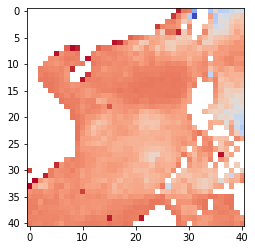

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

data = np.array(rotated_Shallow_mean)
data = np.where(data<-100, np.nan, data)

plt.imshow(data, cmap='coolwarm_r', interpolation='nearest')

plt.show()

In [37]:
def rotate_90_degrees(matrix):
    n = len(matrix)
    result = [[0] * n for _ in range(n)]
    
    for i in range(n):
        for j in range(n):
            result[n-j-1][i] = matrix[i][j]
    
    return result
rotated_Shallow_mean = rotate_90_degrees(Shallow_mean)

In [ ]:
import matplotlib.pyplot as plt

data1 = average_array5.flatten()
data2 = np.array(rotated_Shallow_mean).flatten()


plt.scatter(data1, data2)

p = np.poly1d(np.polyfit(data1, data2, 1))
plt.plot(data1, p(data1), color='r', label='Trend line')

plt.title('Scatter Plot of Two Arrays')
plt.xlabel('Array 1')
plt.ylabel('Array 2')

plt.show()

In [50]:
datan = [(1, 2), (4, 5), (7, 8)]
np.array(datan).shape

(3, 2)

In [11]:
import numpy as np
import scipy.stats as stats

def corr_sig(x, y, alpha=0.05):
    # calculating pearson correlation
    if len(x) != len(y):
        raise ValueError('x and y must have the same length')

    # Pearson correlation r
    Sxy = np.cov(x, y)[0, 1]
    r = Sxy / (np.std(x) * np.std(y))
    n = len(x)
    # Effective degree of freedom vt
    lags = 1
    r_lagx = np.correlate(x, x, mode='full')[len(x)-1]
    r_lagy = np.correlate(y, y, mode='full')[len(y)-1]
    vtx = n * (1 - r_lagx ** 2) / (1 + r_lagx ** 2)
    vty = n * (1 - r_lagy ** 2) / (1 + r_lagy ** 2)
    vt = (vtx + vty) / 2
    tt = int(np.floor(vt))

    # Two-tailed T-test
    t_r = np.sqrt(n - 2) * np.abs(r) / np.sqrt(1 - r**2)
    t_ref = stats.t.ppf(1 - alpha/2, tt)
    if t_r > t_ref:
        h = 1
    else:
        h = 0
    
    return r, h

# Example usage
x = [2, 3, 4, 5, 6]
y = [2, 3, 4, 5, 6]
result = corr_sig(x, y)
print("Pearson Correlation:", result)
if result[1]:
    print("Correlation is statistically significant at alpha = 0.05 level")
else:
    print("Correlation is not statistically significant at alpha = 0.05 level")

Pearson Correlation: (1.2499999999999998, 0)
Correlation is not statistically significant at alpha = 0.05 level


C:\Users\mymylove\AppData\Local\Temp/ipykernel_60328/4208682373.py:23: RuntimeWarning: invalid value encountered in sqrt
  t_r = np.sqrt(n - 2) * np.abs(r) / np.sqrt(1 - r**2)
